# Příklad o limonádě (nebo čemkoli prodejném)
* Rozhodneš se míchat limonádu a prodávat ji na ulici.
* V podnikatelství se často zmiňuje poptávka.
* Začněme nejjednodušším případem, kdy křivka poptávky vypadá následovně:

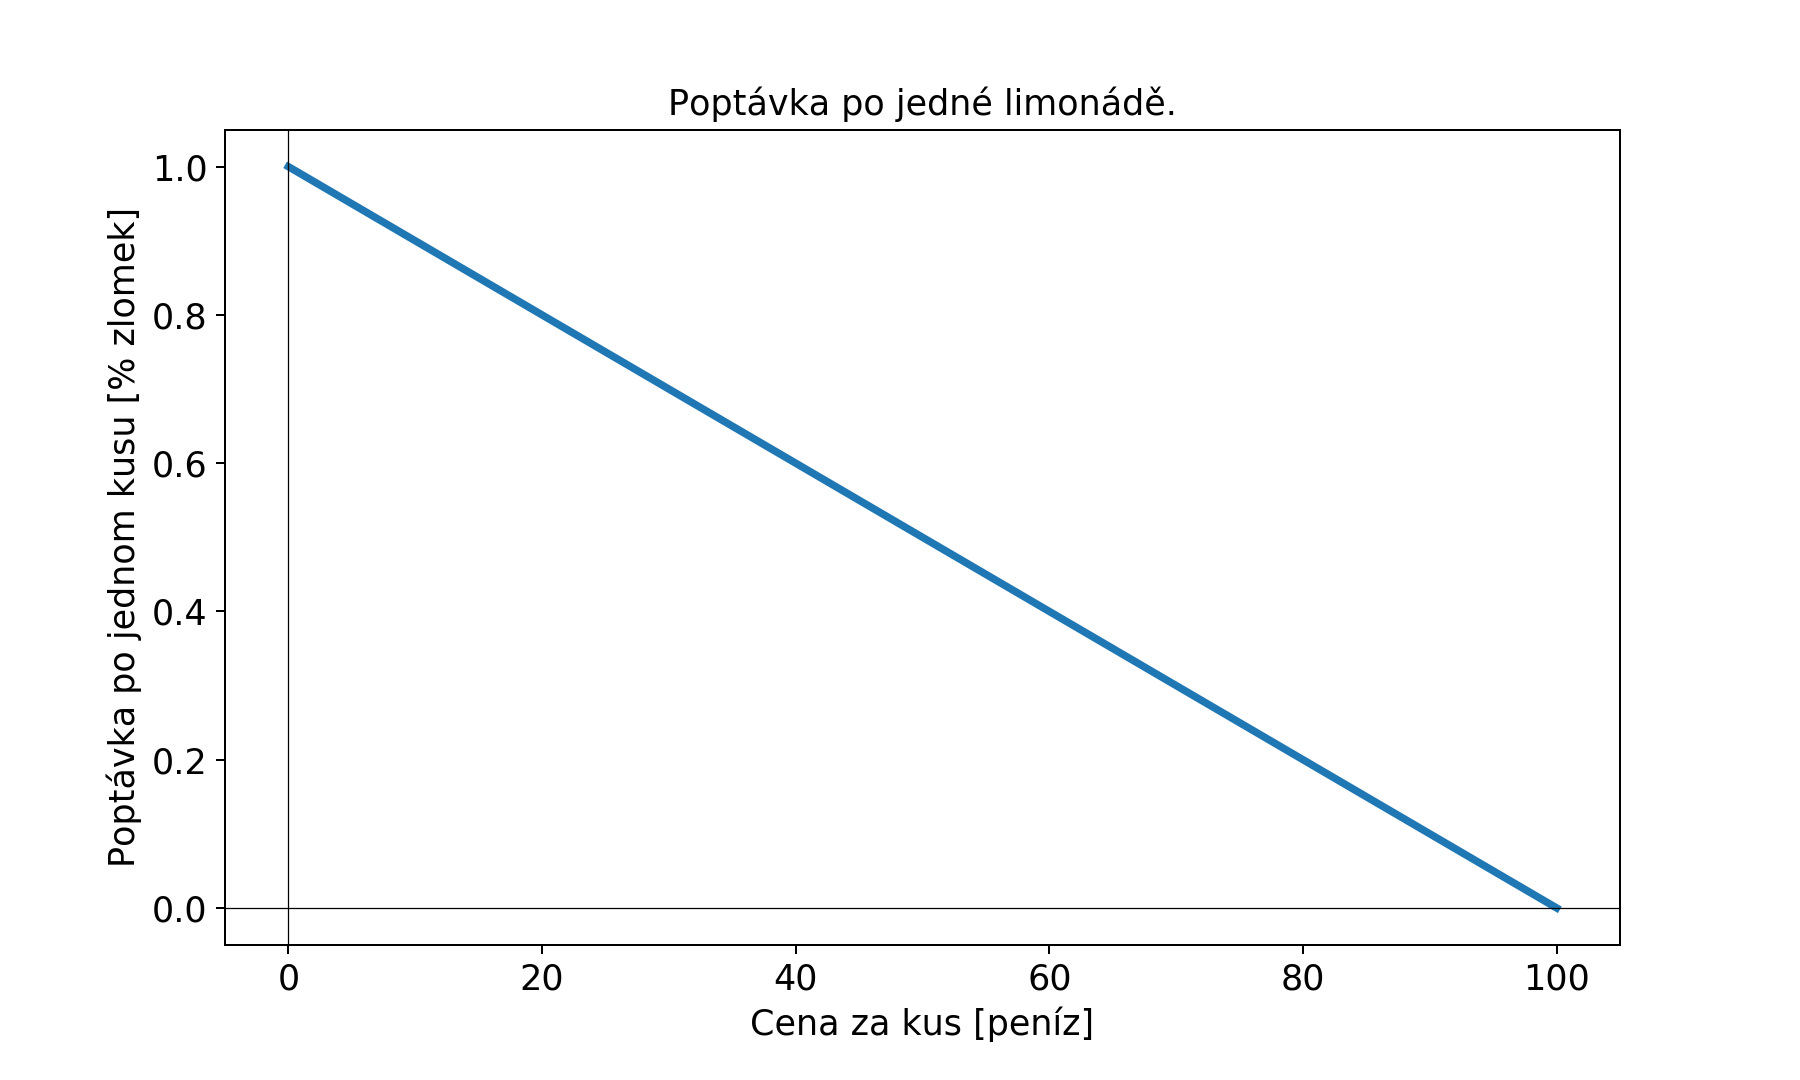

In [2]:
from IPython import display
from base64 import b64decode

image01 =  'iVBORw0KGgoAAAANSUhEUgAABwgAAAQ4CAYAAAAdAYi2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAbrgAAG64BjF1z+AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3QVdf7/8ddNrwQSAskCIRCKVAGBBelFiqKoKEsXpNhQRLHCrnwFFBXbFqTJuossFkRXqvTQROk1ICAg1dBJID3z+4NfZu9NvRdyc4F5Ps7JOTP3fj6f+57JzMC5r3xmbIZhGAIAAAAAAAAAAABgCV6eLgAAAAAAAAAAAABAySEgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACwEAJCAAAAAAAAAAAAwEIICAEAAAAAAAAAAAALISAEAAAAAAAAAAAALISAEAAAAAAAAAAAALAQAkIAAAAAAAAAAADAQggIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAsBACQgAAAAAAAAAAAMBCCAgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACwEAJCAAAAAAAAAAAAwEIICAEAAAAAAAAAAAALISAEAAAAAAAAAAAALISAEAAAAAAAAAAAALAQAkIAAAAAAAAAAADAQggIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAsBACQgAAAAAAAAAAAMBCCAgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACwEAJCAAAAAAAAAAAAwEIICAEAAAAAAAAAAAALISAEAAAAAAAAAAAALISAEAAAAAAAAAAAALAQAkIAAAAAAAAAAADAQggIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAsBACQgAAAAAAAAAAAMBCCAgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACwEAJCAAAAAAAAAAAAwEIICAEAAAAAAAAAAAALISAEAAAAAAAAAAAALISAEAAAAAAAAAAAALAQAkIAAAAAAAAAAADAQggIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAsBACQgAAAAAAAAAAAMBCCAgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACwEAJCAAAAAAAAAAAAwEIICAEAAAAAAAAAAAALISAEAAAAAAAAAAAALISAEAAAAAAAAAAAALAQAkIAAAAAAAAAAADAQggIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAsBACQgAAAAAAAAAAAMBCCAgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACwEAJCAAAAAAAAAAAAwEIICAEAAAAAAAAAAAALISAEAAAAAAAAAAAALISAEAAAAAAAAAAAALAQAkIAAAAAAAAAAADAQggIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAsBACQgAAAAAAAAAAAMBCCAgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACwEAJCAAAAAAAAAAAAwEIICAEAAAAAAAAAAAALISAEAAAAAAAAAAAALISAEAAAAAAAAAAAALAQAkIAAAAAAAAAAADAQggIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAshIAQAAAAAAAAAAAAsBACQgAAAAAAAAAAAMBCCAgBAAAAAAAAAAAAC/HxdAEAAAAAbtyZM2c0efJkGYYhm82mJ554QlFRUZ4uC7CUhIQEffnll5IkX19fvfDCCwoMDPRwVSgphmHogw8+UFJSkiSpS5cuatasmYerkj799FMdO3ZMDRs2VPfu3fO8P3/+fG3ZskUVKlTQ0KFDPVAhAAAAPIGAEAAAALjFGYahAQMGaMmSJZKkF198kXAQKGFXr15Vjx49lJCQIEmaPn064aDFTJw4Ua+//rok6e6779Zrr73m4YquiYqK0pAhQ+Tv76+NGzeqQYMG5nu7du1Sz549lZqaqu+++86DVQIAAKCkcYtRAAAA4BY3adIkMxx88MEH9e6773qkjuXLl8tms8lms6latWoeqQHOa9mypfn7+vzzzz1dTqEyMzPNWm02m44fP+7pkvJ49tlnzXDw5Zdf1pAhQ4p1fGd+XwcPHjTb+Pjw98Al6ccff9Rf/vIXSVLVqlX13//+V/7+/sX+OddzLtx3333q3bu30tLS1KtXL125ckWSlJKSot69eys1NVWPPPJIvrMLAQAAcPsiIAQAAECJGThwoMMXm7l//Pz8FBkZqUaNGunJJ5/UsmXLZBiGp8u+qf38888aPXq0JOmuu+7S7Nmz5eXFf/OBkjRnzhzNnDlTkvTwww9r4sSJHq4IJenixYvq3bu3MjMzVaZMGS1atEhly5b1dFkOPv74Y0VERGj//v169tlnJUkjR47Unj17VKZMGf3tb3/zcIUAAAAoaXxzAAAAgJtGRkaGzp49q23btmnq1Knq1KmTGjdurH379nm6tGJR3LOgLl26pF69eikjI0OVKlXS/PnzFRQUVEzVAnDGoUOH9OSTT0qSmjRpos8//1w2m83DVaEkDR48WEePHpWvr6+++eYb1axZ09Ml5REZGamPPvpIkvTPf/5TQ4YM0dSpUyVdm4XObakBAACsh3uOAAAAwCMCAgLUpk0bh9fS09N1/PhxHThwwHxt69atat68uTZs2KBatWqVdJk3tWHDhunw4cMKDQ3VggULFB0d7emSAEtJT09Xr169dPnyZVWuXFnz58/nuYMWM3nyZM2bN0+SNG3aNLVr187DFRWsX79+mj17tpYsWaJPP/1UktS+fXs9/vjjHq4MAAAAnkBACAAAAI8oX768+dy83A4cOKDnn39eixYtknTt9m29evXS9u3bmZnz/02bNk1fffWVvL299eWXX6p+/fqeLgm3mHXr1nm6hFveq6++qs2bN6tUqVJasGCBypcv79F6qlWrxm2ZS9DOnTv14osvSpJef/11DRw40LMFOWHq1KmqU6eOkpOTFRgYqGnTpnm6JAAAAHgItxgFAADATad69eqaP3++OnfubL62c+dOzZ8/34NV3VyGDRsmwzCUmZmprl27erocwJI++OADGYahS5cuqW7dup4uByWsfv36SklJkWEYmjBhgqfLcUpMTIySkpJkGIauXr2quLg4T5cEAAAADyEgBAAAwE3Jy8tLkyZNcnht8eLFHqoGAAAAAADg9kFACAAAgJtW3bp1VbFiRXN9586dhba/dOmS/vrXv6pTp06qVKmSAgICVKZMGdWuXVtPPfWU4uPjnfrcGTNmyGazyWazqWPHjubrGzZs0KBBg1SzZk2FhIQoPDxcTZo00YQJE3Tu3Lkix/P19XV4vVKlSubn2P8MGTIk33H27dunjz/+WI888ohq1aqlsLAw+fr6KiIiQvXq1dMTTzyhlStXFrptWVlZio6ONj/rk08+cWqfSFJqaqrCwsLMvnPmzHG6b37mzZungIAAc7wHH3xQqampedolJibqX//6lwYNGqTGjRsrIiJCvr6+CgsLU1xcnHr16qVZs2YpMzPzhurJT79+/cz6xo8fL+naPvz666/VrVs3xcbGKiAgQNHR0brnnns0c+ZMl+vIysrSF198oV69eikuLk4hISEKCQlRXFycevbsqf/85z/Kysoq9m1r2bKluW2ff/65U30uXryov//977rvvvtUpUoVBQUFqVSpUqpZs6aGDBlS5PGXn127dmn48OGqWbOmgoODFRERoYYNG+rPf/6zfvvtN5fGyu/3JUlLly5Vz549FRcXp8DAQEVERKh58+aaOHGirly54nLNBw8e1JtvvqkWLVqoQoUK8vf3V9myZdWoUSO98sor2r9/v8tjFoeDBw+a2+/jU/ATRfLbT4ZhaN68eXrggQcUGxsrf39/RUREqEuXLgXO3t6zZ4+eeuop1axZU4GBgQoNDVWDBg00btw4l/dramqqZsyYoe7duys2NlZBQUEKCwtTjRo19Nhjjzk9g3z58uXmtlWrVs18/ciRI3r99dd15513qkyZMgoODlb16tU1bNgw7dmzx+k63Xk9Ks5zIbft27fr1VdfVZMmTRQVFSU/Pz+VL19ezZo109ixY3XixIkbGh8AAAC3IAMAAAAoIY899pghyZBkVK5c2ak+zZs3N/vUrFmzwHb/+c9/jMjISLNtQT/dunUzzpw5U+hnTp8+3WzfoUMHIyMjwxg5cmSh45YvX9744YcfihzPmZ/BgwfnGePOO+90un+HDh0K3cbnn3/ebNuiRYtC94W9r776yuwXEhJiXLlyxeH9ZcuWme/HxcUVOta0adMMb29vs/3AgQONzMzMPO2GDx/u0K6wn6pVqxpbtmxxenuc0bdvX3P8cePGGYmJiUb79u0LreOuu+4yfv31V6fG37p1q1GvXr0it61OnTrG5s2bi3XbWrRoYY4/a9asIttPmzbNiIiIKLLW++67zzh//rxTNYwbN87w8fEpcKyQkBDjq6++MjIyMhxeP3bsWL7j5f59Xb582fjTn/5UaL0xMTHG/v37nao3NTXVGDFihOHr61vomD4+PsYrr7xiZGVlOTWuM5z5fR04cMBs4+3tXeBYuffTuXPnjC5duhS6TSNHjnQY46233ir03IyLizN+++03p7Zt2bJlRmxsbJHH1t13320cPHiwyLFyX4c+++wzIygoqMBxvb29jb///e9F1unO61Fxnws5Lly4YPTr18+w2WyF1hsUFGR8+OGHTtcLAACAW1/Bf1IIAAAA3ATS09PNZT8/v3zb/O1vf9OIESNkGIb5WoUKFRQXF6crV65o9+7dSktLkyQtWLBArVq10qpVqxQVFeVUDa+88oo+/PBDSVJISIhq164tX19f7du3z5w5+Pvvv+uBBx7QokWL1L59e4f+lSpVUufOnWUYhpYuXWq+3rZtW/n7++f5vPyeZbZjxw5z2cfHR9WqVVPZsmXl5+enxMRE7du3z5yxsmLFCrVq1UqbN29WcHBwnrH69eunjz76SNK1WZFHjhxRbGxskfth9uzZ5vJDDz2koKCgIvvkZ+LEiXrttdfM9RdffFHvvfeebDZbnra7du0yZ8/ZbDZVrlxZ0dHRCgoK0uXLl7Vv3z4lJSVJkn799Ve1atVKGzduVL169a6rtsJkZmbqgQce0MaNGyVJ5cuXV40aNZSSkqLdu3ebsx+3bNmi9u3ba926dapQoUKB423YsEFdu3bV5cuXzdfCwsJUq1YteXl5KSEhQRcuXJB0baZWu3bttHDhQrVq1arYt60oo0aN0vvvv+/wWmxsrGJiYpSVlaWEhASdP39ekrRw4UK1bt1aa9euVenSpQsc889//rPDLD9JqlKliipXrqzz589r9+7dSk5O1p/+9CctWLDA5ZqzsrL00EMPacWKFZKkqKgoVatWTYZhaNeuXeZ+/+2339SlSxft3r270GM6KSlJDzzwgFavXm2+5uXlpVq1aqlcuXJKTk7Wzp07lZaWpszMTL3zzjs6ceKEZs2a5XLtJSkjI0MPPPCA1q9fL+na7zU2NlZJSUnasWOHeV358MMPFRMTo+eff14TJkzQmDFjJEmhoaGqU6eO/P39tXv3bvOaeOjQIXXv3l2bNm2St7d3gZ8/b9489e7d2+FaHxkZqZo1ayo9PV179+5VcnKypGvnTKtWrbRixQrVqlXLqe377LPPNGjQIEmSv7+/6tatq1KlSuno0aP69ddfJV07VoYPH66qVasW+kxX++uRJPN6FBwcrEuXLikhIcGcOenK9chd58KpU6fUqVMn7d6923zNx8dHderUUUREhM6fP29u09WrVzVy5EidPXs2Ty0AAAC4TXk4oAQAAICFuDqDMCsrywgLCzP7dOjQIU+bDRs2OMzoqFq1qrF06VIjOzvbbHPhwgVj1KhRDjMoOnXqVODn2s/4i4iIMGw2m+Hr62u8/fbbDrPmMjIyjJkzZxqhoaFm+6ioKOPixYv5juvqzA97QUFBxrBhw4zly5cbKSkped6/ePGi8c477xiBgYHm+M8++2yB49WqVctsN378+CI//9y5c4afn5/ZJ7/ZkkXNIMzOzs4zE/Ott94q9HM7duxo/OlPfzK++eYb49KlS3nez8zMNL777jsjLi7OHLN+/foOv/8bYT/TqmzZsoYko1y5csY333zjMDvs4sWLxssvv+ywbV26dClw3PPnzxsVKlQw2wYHBxuffPKJkZqaarZJT083ZsyY4XB8RUdHG2fPni2WbXN2BuHkyZMdtqtPnz55ZtxlZWUZX331lbmPJBk9e/YscMxVq1Y5jFmnTh3jxx9/dGhz/Phxo0ePHg77vqhzx/73lTPbsVatWsby5csdjom0tDRj7NixDmMWdR7Yz0T09fU1xo4da5w7d86hTXJysjFu3DiHa9LkyZMLHddZ7ppBmLOf7rrrLuPnn392aHf8+HGjZcuWDm0XL15seHl5GcHBwcaUKVOMtLQ0s31GRoYxbtw4h/36r3/9q8A6Dh06ZISEhJhtIyMjjS+//NJhNvGVK1eMiRMnOszarFevnsO5Ys/+OhQSEmL4+/sbfn5+xjvvvGMkJyc7tI2PjzeioqLM9tWrVy/02tGuXTvj/vvvN+bMmZPvLNmMjAzjq6++MipVquT09chd50JmZqbDMRMYGGi8++67xuXLlx3aJSYmGkOHDnUYc+HChQXWCwAAgNsHASEAAABKjKsB4cKFCx2+tHz99dfztLG/9WbFihWNEydOFDje22+/7TDeV199lW+7/G4J+s9//rPAcVetWuVwa7hRo0bl2+5GAkJnQ6EffvjBDEKDgoKMCxcu5Ntu/PjxZh21atUqctwpU6Y4hKD53Q60sIAwIyPDGDBggPm+l5eXMX369CI/N/cX+gU5c+aMUbly5UIDzOthH6TkBA47d+4ssH3ucGTBggX5thsxYoTZxsfHx1ixYkWBY8bHxzuEI08//fQNb5dhOBc4HTt2zCF0LipE27t3r0OguXHjxnzb1a1b1+FYKej4zs7ONh599NE856MzAWHOsV3Y7U6HDRtW4DFrb+7cuWY7Pz+/Qn9fhmEYs2bNMtuHh4fnuR3v9XBXQCjJaNCggZGUlJRv2zNnzjj8oYafn5/h7e1trF69usDxe/XqZbbP7w87cnTv3t1sV6pUKWPXrl0Ftp0zZ45Dze+++26+7eyvQ5IMm81mLFq0qMBx169f79B+7dq1BbZ19jp87Ngxo3z58k5dj9x1LkyaNMlsExQUVOC5mGPUqFEO501x/ZEFAAAAbl4EhAAAACgxrgSEp0+fNqpWrerwRWjuZ7CtXbvW4f1vv/220DGzs7ONxo0bm+1btWqVb7vcAWFhsw1zPPPMM2b7iIiIfGe33EhA6Ipu3boVGYIePnzYYUbl1q1bCx2zVatWZtvczyLLUVBAePXqVYea/P39jblz517/BhbAPsQsrhAtd5BS1IzHrKwso379+mb7bt265WmTnJxslCpVymwzYsSIIut44YUXHELK/GZTusqZwOmll14y27Rp08apcd966y2zz4ABA/K8n/u8LSy8MYy8AZUrAeG6desKHXv//v0O7U+fPp1vu6ZNm5pt3njjjULHzNGpUyezz8yZM53qUxh3BoS5Zw7m9vjjjzu0L+r8io+Pdwin8nsW45EjRwwvLy+znTPPv3v44Ycd/g3Jb9zcAeGQIUOKHNf+WbcTJ04ssr0z7AO6gvaXu86F9PR0hxnKH3zwQZH1pqenO8x8XLlypXMbCgAAgFuWlwAAAICbREZGhg4fPqzJkyerUaNG5vOhJOmRRx7RXXfd5dD+22+/NZdjY2PVvXv3Qse32WwaMWKEub527VrzeVmFefbZZ11qc+7cOa1Zs6bIPu7SunVrc3nTpk35tomNjdXdd99trn/++ecFjnf06FGtW7fOXO/bt6/TtVy8eFGdOnUyn5sVEhKihQsXqkePHk6P4axmzZqZywVt943w9fXVE088UWgbLy8vPf300+b6kiVLlJKS4tBm5cqVDs8dfO6554r87BEjRpjPaExOTtayZctcKf262T8/b+TIkU71sT8+cp7/Z8/+vI2Liyv0mW+SVLZsWfXu3dupz7ZXp04dtWjRotA2NWrUUGRkpLmekJCQp83+/fv1888/S7r2/Lbhw4c79fl9+vQxl/PbDzeL+vXrq0mTJoW2adq0qcP6kCFDCm3fpEkTeXld+7rh6tWrOnr0aJ4233//vbKzsyVJQUFBRY4pOR6DR48e1bZt24rsU9Q5K0ktW7Y0l/M7Bq6HM9dhd50LK1eu1IkTJyRJwcHBevLJJ4vs4+vre8scswAAACgePp4uAAAAANZ09OhRM/AoSqNGjfTpp5/mef2nn34yl7t27erUePfdd1+eMe69994C23t7e6tjx45FjluzZk1VqVJFhw8flnTtC+F77rmnyH7XIzExUdu2bdPBgwd16dIlpaSkyDAM8/3t27eby8ePHy9wnH79+mn9+vWSpC+++ELvvfee+aW+vf/85z/m+HfccUeeoLYgp0+fVufOnbVz505J177cXrx4sRo3buxU/9y2bNmi9evXa8+ePbpw4YKSk5PNgEG6FkTkKGy7r1fTpk0VHh5eZDv7L/kzMzO1bds2hzDW/ritVauWqlatWuSYMTExql+/vnbs2GGO4Y6Q1d7Bgwd1+vRpc71du3ZO9YuJiVFISIiSk5N14sQJJSYmqly5cub7OWGbJHXp0sWpMbt27aopU6Y4Wfk19vu8MBUrVtSZM2ckSRcuXMjz/tq1a83lO++8U2XLlnVq3Lp165rLW7dudaqPJ9gH6wWJjo42lwMDA3XnnXcW2j4wMFBhYWHm/rx48WKeNvbnQZs2bRQSElJkHS1atFDp0qXN8X766adCr0cBAQFq2LBhkeNWrFjRXM7vGMjPlStXtH37du3duzff65H9OAVdj9x1Ltgfs61bt1ZgYKBTYzdo0MBcvpmPWQAAABQPAkIAAADctEJDQ/XUU0/p//7v/xQQEJDn/YMHD5rL9erVc2rMMmXKqGLFiuYXtvZj5KdatWr5fnZ+6tatawaEBw4ccKqPK1asWKEJEyYoPj7e4Yvowly6dKnA93r27KkRI0YoPT1dJ0+e1KpVq9ShQ4c87WbPnm0u9+vXz+nPbdGihTkLtFKlSlq6dKnuuOMOp/rbW7x4sUaNGqW9e/c63aew7b5e9oFPYWJiYlSqVClzluCBAwccwqrrOW5z2uYEhEUdt8Vh165d5rKPj4969uzpdN+MjAxz+cyZMw4BoX3tzu5TZ9vZi4qKcqpdUFCQuWwfMuew3w/Hjh1zOsixHysngLwZlS9fvsg29vuobNmy+f4hQX59ckKy/Pbr9ZwHNptNdevWNWc0F3UeREZGytvb26lac+RXq72DBw/qjTfe0LfffptndnBBCroeuetcsD9mz507p/Hjxzs1tv2/WzfzMQsAAIDiQUAIAAAAjwgICFCbNm0cXvP19VVYWJgqVqyopk2b6p577lFoaGiBY9jPSomIiHD6s8uWLWsGhEXNFnFlXPu2+c2YuRGvvvqq3nnnHZf7paWlFfheeHi4unbtqv/+97+SrgWBuQPCHTt2aM+ePZKufTnv7O1Fz549q7Nnz5rrY8eOva5w8L333tPLL7/scr/Ctvt6uXIshIeHmwFh7mPhRo7bHM7OcroR9rffzczM1A8//HBd4+QOR+xrd3b7XdlPOfz8/FzuYz8TN4f9fkhMTLyu/eCOwLq4uLqfimu/lsR5UFy15vjuu+/Uu3dvpaamujRmQdcjd50L9sfszz//7DBT0Vk38zELAACA4kFACAAAAI8oX768lixZckNj2M9ScuWLYPu2RQVJrozr7+/v9Liu+PTTTx3CwWbNmmnAgAFq0qSJYmJiFBoaqoCAAPMWqzNmzNDQoUOdGrtv375mQPjNN99o8uTJDjMm7Z9N2KJFC8XGxjo1blRUlKKjo81nhD3zzDOqWLGiOnXq5FR/SVq/fr1DOFi5cmUNHTpUrVq1UpUqVRQeHq7AwEBzNtPBgwdVvXp1p8d3VXEdC/br7jpui8OVK1eKZRz72a6GYSg9Pd1cd3b77fdnSSuO/eDsjF8ruVXOgxwJCQnq2bOn+e/OjV6P3HkucMwCAADAGQSEAAAAuGWFhoaasxySkpKc7mfftnTp0k63dWXcUqVKOd2vMIZh6C9/+Yu5/txzz+njjz92uo6i3H///QoLC9OlS5d0+fJlzZ8/X48++qika18Qf/HFF2ZbZ2cPSlJwcLCWL1+uDh06aPv27UpNTVX37t31/fffO/1sxokTJ5rLzZs319KlSwt9Tpkr2309iutYCAsLu+Exizpui4N9nRUrVtSxY8dueEybzabQ0FBzdqWz2+/u321h7PdDv379NGvWLI/Vcju5Vc6DHG+++aYZDhbH9cid54L9vh0zZozGjRvn1NgAAACwlqIfHAAAAADcpCIjI83lnGfdFSU7O1tHjx7Nd4z85DxT0Bn2Ndg/c+1GbN26VSdPnpQkhYSEOIRmBcm5faozAgIC1KNHD3Pd/nmD8fHx5lh+fn4uPYNOunabzeXLl+vOO++UJDMkXLFiRZF9s7KyHNq9++67hX4ZL7m23dfD2WMhJSVFp0+fNtdzHwvXc9xK0qFDh/Idw13sn0138uTJIp/Ndj3jOrtPXdlPxc2+Xnc8W9SqbpXzQLr278aiRYvM9eK6HrnrXOCYBQAAgDMICAEAAHDLatSokbm8ceNGp/rs3LnTIeiwHyM/58+fd/hCuiCpqanatWtXoePm3HouR2HPusph/2Vw3bp1FRgYWGSfDRs2FNnGXr9+/czlxYsX6/z585Icby/atWtXhYeHuzSudO15WStWrDBDwpSUFN1///1FhoRnz55VSkqKud6kSZMiP8vV7XbVpk2bnGq3efNmh9vz5T4W7Ne3bt3qcJvBgmRmZmrLli0FjukOf/zjH83b1nJucQIAACAASURBVGZnZ2vVqlXFMm7Dhg3NZWefjXY9z1ArLs2aNTOXt2zZUuzPF7Wq67l+nzt3TgcPHsx3DHc6d+6cOdNPKr7rkbvOBftjdtWqVdwuFAAAAPkiIAQAAMAtq3Xr1ubyihUrlJiYWGQf+9CrTJkyqlu3bpF9vvzyyyLbfP/99w7PfWrVqlWeNl5eXg7P97MPwAqSmppqLueENYXZt2+f01+252jbtq0qVqwoSUpPT9fXX3+ttLQ0ffPNN2Yb+xDRVREREVq+fLnq168v6X8hYWGBk/3zJZ2RmZnp8Lt1h2PHjjn1pf+cOXPM5UqVKuV5bqP9cXv58mUtXLiwyDGXLFmic+fO5TuGu4SHhzsEIZMnTy6Wce1rX7ZsmRlIF8Z+n5a0tm3bms99y8zM1PTp0z1Wy+3E/jjYt2+f+bzSwsyZM8cMu7y9vXX33Xe7rT579tdhZzh7PXLXudC5c2dzOTEx0eFaDgAAAOQgIAQAAMAtq0+fPuaMuoyMDI0ePbrQ9keOHHEIOQYNGiRvb+8iP+f99993CGdyS09P19ixY831li1bKi4uLt+2UVFR5rL9TJiC2N8qbseOHYU+f8owDD377LNFjpmbzWZT7969zfXZs2drwYIF5vMdw8LC1K1bN5fHtVe2bFmtWLFC9erVk3QtJOzWrVuBIWFkZKR8fP73yPR169YVOv7EiRPdfotRSRo9enShMz8PHjyomTNnmuuPPfZYnjZ16tRR06ZNzfU///nPhc4izH1sN2rUyGHmkTuNHDnSXF60aJFTYXlRevXqZQZuaWlpevPNNwttv2DBAv344483/LnXq0yZMho4cKC5PmHCBP3yyy8eq+d20blzZ1WoUMFcf+WVVwo9ty5duqQJEyaY6927dy+xW4yWLVvWYQZ4cV2P3HUu1K5d2yEkHDVqlM6cOVNkPwAAAFgLASEAAABuWWXKlNFTTz1lrs+YMUOTJk3Kt+3JkyfVrVs3c9ZeaGioRowY4dTnnD9/Xg8++GC+txZMS0vTgAEDlJCQYL722muvFTiW/S3xJk+eXOTtJZs1ayZfX19J0tWrVzVy5Mh8v0RPS0vTkCFDtHz58iK3Jz/9+/c3l9etW6d3333XXO/Ro4fDzMfrlRMS5szavHr1qrp166b4+Pg8bf39/R1ukzdq1CgzsMxt6tSpeuONN264PmesXr1azz//vLKysvK8d/LkSXXv3l1paWmSrgWrTz/9dL7jjBkzxlzes2eP+vbtm++M0tTUVA0YMEA7d+7Mt6+79ezZU82bNzfXH3vsMc2YMaPI2+MePnxYo0aN0jvvvJPnvYiICA0bNsxc/+tf/6oZM2bkO87WrVs1YMCA66y++IwZM0YRERGSrgVVHTp0cCqo2bhxox599NFiuz3r7cTHx0evvPKKub5s2bICz62LFy/qwQcfNJ/t6e3trVdffbXEag0MDHSYTVtc1yN3ngsTJ040r9u//fab2rVr5/DvVH6ys7O1bNkyderUqcBba48ZM0Y2m838KYk/zAAAAIB7+BTdBAAAALh5jR8/XkuWLNHevXslSS+99JLmz5+v/v37q1q1arp69arWrl2rKVOmOAR8H330kWJiYoocv0mTJjp37pzWrVunOnXq6KmnnlKTJk3k4+OjXbt2aerUqdq3b5/Zvk+fPrr33nsLHK9Pnz6aN2+eJGnhwoWKjo5WgwYNFBoaara555579Mwzz0iSSpUqpYEDB5q3Nfz000+1d+9eDRkyxNy+bdu26dNPP9WhQ4fk6+urvn376rPPPnN+J0qqV6+e6tWrp127dskwDIfnXN3I7UVzi4yM1MqVK9W+fXvt3r1bV69e1X333adFixbluW3m888/b87U2b59u+rXr6/hw4frrrvukiQdOHBAs2fP1tq1ayVJw4YN07Rp04qt1tweeughLVy4UH/961+1bt06DRkyRHfccYdSU1O1bt06TZkyxeEWge+9956io6PzHev+++/XoEGD9M9//lOSNHfuXG3btk1PPPGEGjRoIJvNpp07d2rq1KkOs9X69++vhx56yG3bmJuXl5fmzp2rpk2b6sSJE0pLS9PQoUP18ccfq2fPnmrQoIHKlCmjlJQUJSYmavv27YqPjzef11jQrN4JEybo+++/19GjR2UYhoYOHap58+apd+/eiomJ0YULF/TDDz9o5syZSk9PV69evfTFF1+U2HbnVrFiRX3xxRe69957lZGRoePHj+vuu+9Wp06d1K1bN1WvXl0hISFKSkrS8ePHtWXLFv3www86cuSIJOmJJ57wWO03s+HDh+u7777TypUrJV0LyNasWaPBgwerdu3aysjI0KZNm/TJJ5/o5MmTZr/XX3/dqecAFqfnnntOffv2lVS81yN3nQsNGjTQlClTNGjQIBmGoT179qhevXrq3r27OnfurCpVqigwMFCXLl3SkSNHtHnzZi1evFi///67JOeekQsAAIBbnAEAAACUkMcee8yQZEgyKleuXGzjnjp1yqhfv745dmE/NpvN+Oijjwodb/r06Wb7Dh06GJs2bTJKly5d5NgdOnQwUlJSiqy3V69ehY4zePBgh/YXL140ateuXeTne3t7G1OnTs1Tv7PeeeedPGNWrFjRyMrKcqr/smXLzH5xcXGFtv3999+NOnXqmO2Dg4ONNWvW5Gk3ePBgp36v/fv3N3755ReHfVEc+vbta445btw4Y+rUqYaXl1eR9YwePbrIsTMyMow+ffo4tX2SjJ49exrp6enFsl2GYRgtWrQwx541a1ahbY8fP240btzY6Vqd2Q+//PKLERUVVeQYDRs2NM6fP+/w2rFjx/IdM/fvq7j3w5o1a4zIyEiX98OyZcucquVG6zxw4IBT54Cr+8mVcztHhQoVzD5r164tsF1SUpLRvn17p/flCy+8YGRnZxdrrc5eM+33W3Fej9xxLuSYO3euERwc7PIxe+DAgXzHGz16tEufDwAAgJsXtxgFAADALS8qKkobN27UuHHjzNsA5maz2dS6dWtt2LDB6VuL5mjcuLG2bNmi9u3by2az5Xk/NDRUb775phYvXuzUrTjnzJmjuXPnqkePHqpSpYqCg4MLbR8WFqb169erf//+BT4zsWHDhlq1apXD7epc1adPH4fnbBX0WnEoV66cVq5cqdq1a0uSrly5onvvvTfPs72mT5+uiRMnKiwsLN9xKlasqE8++UT//ve/8/3dFLdhw4Zp8eLFqlmzZr7vx8TEaO7cuRo/fnyRY/n4+Gj27NmaM2eOatSoUWC7atWq6fPPP9cXX3xh3m62uBW17ypUqKAff/xR06dP1x133FFo24CAAN1zzz2aMWOGwy0kc6tevbq2bdumnj175nuMBQYG6qmnntL69esdZth6UqtWrbR//36NHj26yOffhYeHq1evXlq4cKHatWtXQhXeekJCQrR06VL94x//cHgmYW4NGjTQokWL9P7775fIuZ6ff//73xo/fnyBx+P1Xo/ceS706NFD+/fv1/Dhw1WqVKlC2/7hD3/Q4MGDFR8fr2rVqrn0OQAAALj12AyD+0YAAADg9pGVlaWNGzcqISFBZ86cUWBgoKKjo9W6desCb/eY24wZMzR06FBJUocOHRye6/frr79q48aNOnHihPz8/FS1alV17NhRgYGBbtme3E6ePKnVq1fr+PHj8vLyUnR0tBo1aqRatWqVyOd7SnJysuLj4/XLL78oLS1N5cuXV40aNdS8eXO3BJg5+vXrp9mzZ0uSxo0b5/D8v59//ll79uzR77//rtKlS6tOnTpq2bLldYcXe/fu1ebNm81b/JUrV0533XWX+czG4vbHP/7RvJVsTmDtrKNHj2rjxo1KTEzUpUuXFBQUpMjISNWsWVP169d3+ZmVp06d0sqVK3XixAkFBAQoJiZG7dq1KzAYvhkYhqHt27dr165dOnv2rFJSUhQSEqIKFSqoVq1aqlWrlluPzduRYRjaunWrduzYoTNnzsjHx0dRUVFq3ry5qlat6unyTElJSYqPj9eBAweK/XrkznMhKytLmzZtUkJCgs6ePauMjAyFhoaqUqVKqlOnjqpXr37DnwEAAIBbBwEhAAAAkEthASGspbCA8FZXo0YNHThwQJK0bNkydezY0cMVAQAAAABKCn/OCAAAAAAWk5ycrCNHjpjrzBwCAAAAAGshIAQAAAAAC8nOztbYsWOVkZEhSapcubIqV67s4aoAAAAAACXJx9MFAAAAAADc74033tC6deuUkJCgU6dOma8/+eSTHqwKAAAAAOAJBIQAAAAAYAFbtmzRypUrHV7r2LGjXnjhBQ9VBAAAAADwFAJCAAAAALAILy8vlS5dWnXr1lWfPn30+OOPy9fX19NlAQAAAABKmM0wDMPTRQAAAAAAAAAAAAAoGV6eLgAAAAAAAAAAAABAySEgBAAAAAAAAAAAACyEgBAAAAAAAAAAAACwEAJCAAAAAAAAAAAAwEIICAEAAAAAAAAAAAALISAEAAAAAAAAAAAALMTH0wUAVmaz2TxdAgAAAAAAAADASYZheLoEoFgwgxAAAAAAAAAAAACwEGYQAjcBK/7VyZEjR1SlShUdPnxYsbGxni4HAAAAAAAAAArE3eBwu2EGIQAAAAAAAAAAAGAhBIQAAAAAAAAAAACAhRAQAgAAAAAAAAAAABZCQAgAAAAAAAAAAABYCAEhAAAAAAAAAAAAYCEEhAAAAAAAAAAAAICFEBACAAAAAAAAAAAAFkJACAAAAAAAAAAAAFgIASEAAAAAAAAAAABgIQSEAAAAAAAAAAAAgIUQEAIAAAAAAAAAAAAWQkAIAAAAAAAAAAAAWAgBIQAAAAAAAAAAAGAhBIQAAAAAAAAAAACAhRAQAgAAAAAAAAAAABZCQAgAAAAAAAAAAABYCAEhAAAAAAAAAAAAYCEEhAAAAAAAAAAAAICFEBACAAAAAAAAAAAAFkJACAAAAAAAAAAAAFgIASEAAAAAAAAAAABgIQSEAAAAAAAAAAAAgIUQEAIAAAAAAAAAAAAWQkAIjzhz5owWL16sN998Uw888ICio6Nls9nMn88++6xE6rh8+bKmTp2qDh06KCYmRgEBAfrDH/6gli1b6v3331diYmKJ1AEAAAAAAAAAAFBSfDxdAKzl9OnTatasmY4ePerpUhQfH6/+/fvr2LFjDq+fOnVKp06d0vr16/XWW29p2rRp6tGjh4eqBAAAAAAAAAAAKF7MIESJSk1NvSnCwTVr1qhTp04O4WBsbKzatGmj6tWrm6+dP39ejz76qL788ktPlAkAAAAAAAAAAFDsCAjhMZGRkerSpYvGjBmj7777rsQ+98yZM3r44YeVnp4uSYqKitKyZct0+PBhrV69Wr/88os2bdqkGjVqSJIMw9DAgQOVkJBQYjUCAAAAAAAAAAC4C7cYRYkKDw/X119/rSZNmqhy5coeqeGtt97SuXPnJEn+/v5asWKFateu7dCmcePGWrNmjerWrauzZ88qNTVVo0eP1rx58zxRMgAAAAAAAAAAQLFhBiFKVKlSpfTII494LBy8dOmSPvnkE3N95MiRecLBHOXLl9e4cePM9W+//Vb79+93e40AAAAAAAAAAADuREAIS1m4cKHS0tIkSTabTcOGDSu0fb9+/RQcHGyuM4OweKSkZ2nvycueLgMAAAAAAAAAAEsiIISlLFiwwFyuWbOmqlSpUmj7kJAQtWzZMt/+uH6fxB/SsFmbJUlnk9I8XA0AAAAAAAAAANZCQAhL2bFjh7ncvHlzp/rYt9u5c6cMwyj2uqzk2PmrmhJ/yFzvPX2jpsYfUnpmtgerAgAAAAAAAADAOggIYRmZmZk6ePCguR4XF+dUP/t2ycnJOn78eLHXZiUTFiY4hIEpGVl6e/E+dflojVbtS/RgZQAAAAAAAAAAWAMBISzj5MmTSk9PN9djYmKc6pe73ZEjR4qzLEtZf/Csluw5ne97v569okGfbdLjn23S4bNXSrgyAAAAAAAAAACsg4AQlnH58mWH9bCwMKf6lSpVymE9KSnJ6c+02WyF/lhJRla2/m/+niLbrdyXqE4fxuvtxQlKTsssgcoAAAAAAAAAALAWAkJYxpUrjrPSAgICnOoXGBjosJ6cnFxsNVnJ5xuP6pffndt3GVmGpsb/qnaTVuubLceVnc1zHwEAAAAAAAAAKC4EhLCMjIwMh3UfHx+n+uVuZ3+b0qIYhlHoj5W0ql5WraqXdanPmaQ0vfj1DvWYskE7jl10U2UAAAAAAAAAAFgLASEsIygoyGE9NTXVqX6524WEhBRbTVZSrVyo/v14U03rf5diwoOK7mBn228X1f0f6/Xy3B06k5TmpgoBAAAAAAAAALAGAkJYRu5gLyUlxal+V69eLXQcOM9ms6lTnSgtHdlaw1pXdbn/V5uPq/2k1Zqx9lelZ2a7oUIAAAAAAAAAAG5/BISwjLJlHW9veerUKaf6nT592mE9IiKi2GqyqgBfbw1oHitJuqd2eZf6JqVlavzCBHX9eI3ifznjhuoAAAAAAAAAALi9ERDCMsLDwx1Cwt9++82pfseOHTOXbTabatSoUey1Wdkb99fR1082V50/lHKp36EzV/TYzJ815F+bdfTcFTdVBwAAAAAAAADA7YeAEJZSu3Ztc3n79u1O9dm2bZu5HBMTo+Dg4GKvy+qaxIbr++Et9dZD9VQmyNelvssTftc9H6zRu0v26UpappsqBAAAAAAAAADg9kFACEtp3bq1ufzTTz8pM7PoQGnt2rX59kfx8vayqc8fY7R6VDsNvDtW3l42p/umZ2Vr8upDav/+an237YQMw3BjpQAAAAAAAAAA3NoICGEp3bt3N5cvX76s+fPnF9p+y5Yt2r9/v7n+4IMPuq02XBMW5KuxD9TRoudaqUU11573+PvlND3/5XY9OuVH7T5xyU0VAgAAAAAAAABwayMghKU0btxY9erVM9fffvttZWVlFdh+woQJ5nL58uXVtWtXt9aH/6kZFarPB/9RU/o1UsUygS713Xz0gu7/+zq9Nm+nziWnualCAAAAAAAAAABuTQSEuC3ExsbKZrPJZrOpbdu2hbYdP368ubxp0ya99NJL+d6S8sMPP9S3335rro8ePVqBga4FVbgxNptNXepGa/kLbTSyYw0F+Dp/yTIMac7Px9R20mrNXHdYGVnZbqwUAAAAAAAAAIBbh83gYV0oYUOHDtWsWbPyvJ6W9r+ZXj4+PvL29s7TZv/+/apcuXKe12NjY3X06FFJUps2bbR69epCa+jTp4/mzJljrrdq1UqDBw9W5cqVderUKc2ePVsLFy4032/Tpo2WLVsmX1/fIrfPFTbbtefsWfE0PHLkiKpUqaLDhw8rNjbWqT4nLqborUUJWrjzlMufV71ciN64v45aVi/rcl8AAAAAAAAA1mbl73Jxe/LxdAGwnoyMDIcwMD+ZmZnKzMzM83pxXXxnzpyps2fPatmyZZKktWvXau3atfm2bdiwoebNm1fs4SBcV6F0oP7Rp5H6Nzunsd/v0b7TSU73PZCYrH6f/qTOdcprzH21VSk8yI2VAgAAAAAAAABw8+IWo7CkgIAALVmyRO+//76io6PzbVOmTBm9/vrr2rhxo8LDw0u4QhSmWdUILXi2pcY9WFelg1wLbn/Y87s6fBCvD5bu19X0vCE0AAAAAAAAAAC3O24xCsvLysrSunXrdODAAZ05c0bh4eGqUqWK2rZtKz8/P7d+tpWnpV/PLUbzc+FKuj5Y9otm/3RU2S7uxuiwAL1+by11qx9t/i4AAAAAAAAAIDcrf5eL2xMBIeBBVv5HpbgCwhwJpy5r7Pd79NPh8y73bVolXGPvr6Pafyh1w3UAAAAAAAAAuP1Y+btc3J64xSiA20Kt6FL6Ylgz/b1PQ/0hLMClvj8fPq9uf1urMd/t0oUr6W6qEAAAAAAAAACAmwMBIYDbhs1mU7f6f9CKF9vqufbV5Ofj/CUu25A+3/ib2k5arX//eESZWdnuKxQAAAAAAAAAAA8iIARw2wn089YLnWpqxQtt1KVOlEt9L6Vk6C//3aNuf1unHw+dc1OFAAAAAAAAAAB4DgEhgNtWpfAgTel/l2YP+aNqlA9xqe++00nqPX2jnpm9VScupripQgAAAAAAAAAASh4BIYDbXotqZbXwuVZ64/7aKhXg41LfhbtOqcP7q/Xx8gNKzchyU4UAAAAAAAAAAJQcAkIAluDr7aVBLapo1ai26t00Rjab831TM7L14fJf1OH9eC3edUqGYbivUAAAAAAAAAAA3IyAEIClRIT46+2H62n+8JZqXLmMS31PXEzRU7O3qu+Mn7T/dJKbKgQAAAAAAAAAwL0ICAFYUt0KYfr6yeb6uFcDRZUKcKnvhkPndO9f12rs93t06WqGmyoEAAAAAAAAAMA9CAgBWJbNZlP3BhW04sU2eqZdnPy8nb8kZmUb+mzDEbWdtEr/+ek3ZWVz21EAAAAAAAAAwK2BgBCA5QX7++ilzndo2QutdU/t8i71vXA1Q69/u0sP/H2dNh0576YKAQAAAAAAAAAoPgSEAPD/VY4I1vQBjfXvx5sqLjLYpb57Tl7Wo1N+1HNztunUpRQ3VQgAAAAAAAAAwI0jIASAXFrXiNSS51trzH21FOrv41Lf73ecVPtJ8fr7ygNKzchyU4UAAAAAAAAAAFw/AkIAyIevt5eGtKqqlaPa6k+NK8lmc75vSkaWJi39Rfd8GK8f9pyWYfB8QgAAAAAAAADAzYOAEAAKERnqr3ceqa/vnm6hhjGlXep77HyKnpi1RQNm/qyDiUluqhAAAAAAAAAAANcQEAKAE+6sVFrfPHm3Puh5pyJD/V3qu/bAWXX5aK3enL9Xl1Iy3FQhAAAAAAAAAADOISAEACd5edn0cKOKWjWqrZ5sEydfb+fvO5qZbWjm+sNqP2m1vtz0m7Kzue0oAAAAAAAAAMAzCAgBwEUh/j56tesdWjqyjdrfUc6lvueupOuVb3ap+z/Wa8vR826qEAAAAAAAAACAghEQAsB1qlI2WDMHNtE/BzZRlbLBLvXddeKSenzyo0Z+uV2/X051U4UAAAAAAAAAAORFQAgAN6jdHeX0w/Ot9VrXOxTs5+1S32+3nVC7Sav1yepDSsvMclOFAAAAAAAAAAD8DwEhABQDPx8vPdEmTqtGtVWPRhVd6ns1PUvvLNmnzh+u0YqE32UYPJ8QAAAAAAAAAOA+BIQAUIzKlQrQ+z3v1LdP3607K4a51PfIuasa/K/NGvTZJh06k+ymCgEAAAAAAAAAVkdACABu0DCmjL59uoXefaS+yob4udR39f4z6vzhGr21KEFJqRluqhAAAAAAAAAAYFUEhADgJl5eNvVsXEkrR7XV0FZV5ONlc7pvZrahaWt+VbtJ8fp68zFlZ3PbUQAAAAAAAABA8SAgBAA3KxXgq9H31daS51urdY1Il/qeTU7TS3N36qFPNmj7sYtuqhAAAAAAAAAAYCUEhABQQqqVC9G/BjXRjAGNVTkiyKW+O45d1IP/WK9RX+9QYlKqmyoEAAAAAAAAAFgBASEAlCCbzaaOtctr6cjWerlLTQX5ebvUf+6W42o/KV7T1/yq9MxsN1UJAAAAAAAAALidERACgAf4+3jr6bbVtPLFtnqoYQWX+ianZWrCogR1+XiNVu9PdFOFAAAAAAAAAIDblc0wDMPTRcA5iYmeDQLKlSvn0c+/HdlsNkmSFU/DI0eOqEqVKjp8+LBiY2M9XY7HbT5yXmPn79HuE5dd7tuxVjmNua+2YssGu6EyAAAAAAAAAFb+Lhe3JwLCW4iXl5d5ESppNptNmZmZ/4+9+46OqlrfOP6cSQ8JoQcIJaEFEhFMaCKhqxTBjh3rtSE2uHr1qojotYEdQa8dFEWx0ASlBWmht1ADCSUFQgmkkDYzvz/4MVdUMAOZTHLO97MWa81MznvOkwWZE/Y7e2+vXNvMrHxToUH4Z3aHU9+u3qfX5m7Xkfxit2r9fWy6OyFKD/VqoWoBvh5KCAAAAAAAAFiTlcdyYU40CKsQm817K8IahiG73e6165uVlW8qNAjP7NiJEr09b6c+X54mu8O9fxv1QgP01IDWuqp9hNc+UAAAAAAAAACYjZXHcmFO7EFYxTDgD5hfWJCfnhsUozmPJKhbizpu1R7MLdJj32zQtROWaeP+HA8lBAAAAAAAAABUZcwgrEJOLTF66aWX6qeffvL49ZxOp6688kr9+uuvzCD0ECt/6oQZhGXjdDo1N/mAXpy1RfuPnnCr1jCkIfGN9c9+0aoTEuChhAAAAAAAAID5WXksF+bERlVVkM1mU0BAxQz2e3NZUwAnf/Hod0F99Yyuq/8u3q3xi1JUWOIoU63TKX2zep9mb87Uo31baejFTeXnw880AAAAAAAAAFgdI8UAUAUE+vloeJ+WWjCipwa1a+hWbW5hqcbM3KL+b/+m33ZmeyghAAAAAAAAAKCqoEFYxTB9GbC2hjWC9O5NF+mbe7uoTYPqbtWmHMzTbR+v1L1frNbewwUeSggAAAAAAAAAqOzYg7AKOXDggCQpICBANWrUqJBr5uTkqKioSJIUHh5eIde0EiuvW80ehOfP7nBqysq9GvvLduUUlLhV6+9r070JzfRgr+YK9me1aQAAAAAAAOBsrDyWC3OiQQh4kZVvKjQIy09OQbHe+HWHJq/YI4eb/5TqVw/UUwNaa3C7hq5/jwAAAAAAAABOZ+WxXJgTS4wCQBVXI9hfL1x5gWY9nKAuzWq5VZt1vFCPfL1eQz5YruSMYx5KCAAAAAAAAACoTGgQ4k8OHTrk7QgAzkGbBtU15R9d9P4tcYqoEeRW7aq0oxr07hL9+4dNOpJf7KGEAAAAAAAAAIDKgAahSYwbN65cznPw4EH16tWrXM4FoOIZhqEBbRto3uM99EiflgrwLfvbvMMpfZm0Vz1fX6jPlqaq1O7wYFIAAAAAt6fbHgAAIABJREFUAAAAgLewB6FJ2Gw2ffrpp7r99tvP+RynmoPbtm2T3W4vx3Q4EyuvW80ehBVj/9EC/Wf2Vs3elOV2bXR4qEYNilHXFnU8kAwAAAAAAACoOqw8lgtzYgahifzjH//Q9OnTz6n2wIED6tWrl7Zu3VrOqQB4U6OawXr/lnh99Y/Oig4Pdat2+4Fc3fxRkh78co32Hy3wUEIAAAAAAAAAQEWjQWgipaWluvHGG7V48WK36rKyslwzByUpJCTEE/EAeFHX5nU06+FuGj04VmFBfm7Vzt6UpT7jEvXmrzt0opjZxQAAAAAAAABQ1dEgNIlHH31UklRYWKjBgwdr/fr1ZarLzMxU7969tW3bNjmdToWGhmr27NmejArAS3x9bLq9a6QWjuypWzo30f+vilAmRaUOvT1/p/q+kahZGzNZSgEAAAAAAAAAqjD2IDSR22+/XZMmTZIk1atXT0uWLFGLFi3OePyp5uD27dslSdWrV9fs2bPVtWvXCskLa69bzR6E3peccUyjp2/RyrQjbtd2aVZLzw+OVev61T2QDAAAAAAAAKhcrDyWC3OiQWgidrtdV111lWbNmiVJioyM1NKlS9WgQYM/HZuRkaHevXtrx44dkk42B3/++WddfPHFFZrZ6qx8U6FBWDk4nU7N2Jipl2dvVeaxQrdqbYZ0a5emevzSVqoR7O+hhAAAAAAAAID3WXksF+bEEqMm4uPjo2+//VaXXHKJpJMNmMsuu0xHjx497bj09HT16tXrtObgnDlzaA4CFmQYhga3a6j5I3poeO8W8vct+23B4ZS+WL5HPccu0qQVe2R38MsRAAAAAAAAAFQFNAhNJjAwUDNnzlTbtm0lSVu2bNHAgQNVUFAg6X/NwZ07d0qSwsLCNHfuXHXp0sVrmQF4X7C/r0ZcFq15j/XQ5bHhbtXmFJTo2R8364p3lyhp92EPJQQAAAAAAAAAlBcahCZ0qukXFRUlSUpKStK1116r3bt3q0ePHkpJSXEdN2fOHHXu3NmbcQFUIk1qB+uD2zpo0t2d1KJeiFu1WzOP64YPV+ihr9YqI+eEhxICAAAAAAAAAM4XexCa2K5du5SQkKADBw5Ikvz9/VVUVCRJqlGjhubMmaNOnTp5M6LlWXndavYgrPxK7A5NWr5Hb87bodzCUrdqA/1serBnC93bvZkC/Xw8lBAAAAAAAACoGFYey4U5MYPQxJo3b66ff/5Z1atXlyRXc/DUDEOagwDOxs/Hpru6RWnhyJ66sWNj/f/vQGVSWOLQG7/uUN83EjVncxa/OAEAAAAAAABAJUKD0OTatWunGTNmKCAgQIZhqGbNmpo3b546duzo7WgAqog6IQF65doLNX1YN8U1qeFW7f6jJ3T/5DW69eMk7TiQ66GEAAAAAAAAAAB3sMRoFfLggw+ec+3SpUu1efNmde3aVW3btj3rsYZhaPz48ed8LZSdlaels8Ro1eR0OvXj+nS9PHubDuYWuVXrYzM09OKmerRvK4UF+XkoIQAAAAAAAFD+rDyWC3OiQViF2Gw215uQp9nt9gq5jtVZ+aZCg7Bqyysq1XsLUvTJklQV2x1u1daq5q9/Xh6tIR0ay8dWMe9pAAAAAAAAwPmw8lguzIkGYRVis1XMirCGYdAgrCBWvqnQIDSH1EP5enHmFs3fdtDt2tiG1TV6cKw6RNbyQDIAAAAAAACg/Fh5LBfm5OvtACi7J5980tsRAOA0UXWq6eM7OmrR9oN6YeYW7c7OL3NtcsZxXTdxua5q31D/6t9G9cMCPZgUAAAAAAAAAHAKMwgBL7Lyp06YQWg+xaUOfb4sTW/P36m8olK3aoP9fTSsVwvd3S1KgX4+HkoIAAAAAAAAnBsrj+XCnCpmzUoAgOn5+9r0j+7NtGBkD10f38it2oJiu16fu12Xv7VYv245wC9aAAAAAAAAAOBBNAgBAOWqXmigXr++nX4cdonaN67hVu2ewwX6xxerdfunq5RyMM9DCQEAAAAAAADA2mgQAgA8on3jGvr+ga4ae3071QkJcKt28Y5s9XtrsV6cuUXHC0s8lBAAAAAAAAAArIk9CE1u7969Wrt2rbKzs3Xs2DE5HA498cQT3o6F/2fldavZg9BacgtL9N6CFH2yNFUldvf+vdcJ8dcTl7fWdfGNZLMZHkoIAAAAAAAAnJmVx3JhTjQITejEiROaOHGi3n//fe3evftPX7fb7X96bejQodq/f78Mw9DkyZPVoEGDiohqeVa+qdAgtKbd2Xl6YeYWLdqe7XZtu0ZhGjU4VnFNanogGQAAAAAAAHBmVh7LhTmxxKjJbNiwQXFxcRo5cqR2794tp9N52p8ziYuL06JFi7Ro0SJNmjSpAhMDsJJmdUP02Z2d9MkdHRRZO9it2g37j+ma95fp8anrdfB4oYcSAgAAAAAAAID5MYPQRJKTk9W9e3fl5OS4moGNGzdWbGys1q1bpwMHDsgwjL+cQZiTk6Pw8HCVlpYqPj5eK1eurOj4lmTlT50wgxBFpXZ9ujRN787fqfziP78vnU01fx8N79NSd14SqQBfHw8lBAAAAAAAAE6y8lguzIkZhCbhcDh044036ujRo3I6nbrgggu0ePFi7dmzR7Nnz1b79u3PWl+jRg316tVLTqdT69atU05OTgUlB2BVAb4+ur9Hcy0Y2VPXXBThVm1+sV2v/LxN/d76TQu3HfRQQgAAAAAAAAAwJxqEJjFlyhQlJyfLMAy1b99ey5cvV7du3dw6R9euXSWdbDZu3LjREzEB4E/CqwfqjRvaa9oDXdU2Isyt2tRD+brzs1W689OV2p2d56GEAAAAAAAAAGAuNAhN4vvvv3c9njhxoqpVq+b2OWJjY12PU1JSyiUXAJRVfNOa+mnYJXr12raqXc3frdqF27N1+VuL9fLPW5VXVOqhhAAAAAAAAABgDjQITWLNmjWSpCZNmqhTp07ndI5atWq5Hh89erRccgGAO2w2Qzd0bKIFI3vq7m5R8rUZZa4tsTv1QeJu9Rq7SNPW7JfDwXrwAAAAAAAAAPBXaBCaxMGDB2UYhpo1a3bO5/Dx8XE9LikpKY9YAHBOwoL89OwVMZrzaIISWtZxqzY7t0gjvt2gayYs04Z97KcKAAAAAAAAAH9Eg9Ak/P1PLsdXVFR0zufIzs52Pa5Zs+Z5ZwKA89WiXqi+uKuTPrwtXo1rBblVu35fjq4cv1RPfLdB2bnn/t4IAAAAAAAAAGZDg9AkwsPD5XQ6tXPnznM+x/Lly12PIyIiyiMWAJw3wzB0WWx9/fpYD/3z8mgF+fn8fdHvTF29X73HLtJHv+1Wid3hoZQAAAAAAAAAUHXQIDSJjh07SpIOHTqkpUuXul1fVFSkr776SpJks9nUrVu3cs0HAOcr0M9Hw3q10IKRPTS4XUO3anOLSvXirK3q99ZiLd6R/fcFAAAAAAAAAGBiNAhNYtCgQa7HTzzxhOx2u1v1Tz75pLKysmQYhhISElSjRo3yjggA5aJBWJDeuekiTb3vYsU0qO5W7a7sfA39ZKXu+Xy19hzO91BCAAAAAAAAAKjcaBCaxHXXXafo6GhJ0ooVK3Tdddfp+PHjf1tXVFSkRx99VO+++67rtaefftpjOQGgvHSKqqUZw7vppasvUM1gP7dq5209oEvfWKzX525TflGphxICAAAAAAAAQOVEg9AkfHx89MEHH8jP7+Qg+fTp09WiRQv961//0i+//KK8vDzXsfv379eCBQv073//W82aNdO7774rp9MpwzB06623qm/fvt76NgDALT42Q7d0bqpFI3vpjq6R8rEZZa4ttjs0fuEu9R63SD+tT5fT6fRgUgAAAAAAAACoPAwnI6KmMnXqVA0dOlQlJSWupt8pp/6q//iaYRhyOp3q3bu3Zs+eLX9//wrPbVWn/i6s+GOYlpamqKgopaamKjIy0ttxYBLbs3I1ekaylu067HZth6Y19fzgWF0QEeaBZAAAAAAAAKjKrDyWC3NiBqHJDBkyRMuWLVPr1q0lnXyz+n1j8FQz8NTXpJOzD0eMGKG5c+fSHARQpUXXD9WX93TWhFviFFEjyK3a1XuOatB7S/TU95t0OK/IQwkBAAAAAAAAwPuYQWhi06dP1+TJk7VkyRJlZWX96esxMTHq16+fhg8frqZNm3ohIaz8qRNmEMLTCkvs+iBxtyYkpqiwxOFWbfVAXz1+aSvd2qWpfH34LA0AAAAAAIDVWXksF+ZEg9AiDh06pMOHDys/P19hYWGqV6+eQkNDvR3L8qx8U6FBiIqSnnNC/5m9VbM2Zrpd2yo8RKMGxeqSFnU8kAwAAAAAAABVhZXHcmFONAgBL7LyTYUGISra8l2HNXpGsrZl5bpd2y+2vv49sI0a1wr2QDIAAAAAAABUdlYey4U5sW4aAMASLm5eWzOHd9OYK2MVFuTnVu2c5Cz1fSNRb/yyXSeK7R5KCAAAAAAAAAAVgwYhAMAyfH1suu3iSC0a2VO3dWkqm1H22qJSh95ZkKI+4xZpxoYMPi0GAAAAAAAAoMqiQQgAsJya1fw15qoLNHN4gjpF1XKrNuNYoYZPWacbPlyhLRnHPZQQAAAAAAAAADyHPQhNqLCwUNOnT9eSJUu0detW5eTkqKCgoMyzXQzDUHJysodTQrL2utXsQYjKwul0aubGTL08e6syjhW6VWszpJs7N9GIS6NVs5q/hxICAAAAAADA26w8lgtzokFoMu+9956ee+45HTt27JzqnU6nDMOQ3c4eWxXByjcVGoSobE4U2zUhcZcmJu5ScanDrdqwID+NuKyVbu7URL4+TM4HAAAAAAAwGyuP5cKcaBCayPDhw/X++++f9xsUDcKKY+WbCg1CVFb7jhTopVlbNSc5y+3a1vVDNWpQrC5uXtsDyQAAAAAAAOAtVh7LhTnRIDSJWbNmadCgQTIMQ06nUyEhIbr66qvVuXNnNWjQQMHBwW6d7/LLL/dQUvyelW8qNAhR2S1NOaTRM5K140Ce27UD2zbQ0wPbKKJGkAeSAQAAAAAAoKJZeSwX5kSD0CQGDRqkWbNmyTAMdenSRT/88IPq1avn7Vj4G1a+qdAgRFVQYndo8oo9evPXHTpeWOpWbaCfTQ/0aKH7ejRToJ+PhxICAAAAAACgIlh5LBfmRIPQJOrXr6+DBw/K19dXqampioiI8HYklIGVbyo0CFGVHM4r0thfdujrVXvl7o9rRI0gPTOwjfpdUN/1Mw8AAAAAAICqxcpjuTAnm7cDoHwcOXJEhmGoffv2NAcBoJzVDgnQy9e01YyHuqlD05pu1abnnNADX67VLR8laXtWrocSAgAAAAAAAEDZ0SA0iVq1akmSQkNDvZwEAMzrgogwfXv/xXr7xvYKrx7gVu2yXYc14J3f9Pz0ZB0rKPFQQgAAAAAAAAD4ezQITSI+Pl5Op1NpaWnejgIApmYYhq5sH6EFI3pqWK/m8vcp+63U7nDqs2Vp6jl2ob5M2iO7gyUpAAAAAAAAAFQ8GoQmceutt0o6ua/bunXrvJwGAMyvWoCv/nl5a/36eHddGhPuVu3RghL9+4fNGvzeEq1KO+KhhAAAAAAAAADw1wwnO2qagtPpVPfu3bV06VJ17txZCxYsUFBQkLdj4W9YeWPbtLQ0RUVFKTU1VZGRkd6OA5y3xB3ZGj0jWbuz892uHdyuoZ4a0FoNwnjfBgAAAAAAqIysPJYLc2IGoUkYhqHvv/9esbGxSkpKUs+ePbVx40ZvxwIAy+jRqq7mPNJdzwxso9AAX7dqp2/IUO+xiRq/MEWFJXYPJQQAAAAAAACAk5hBaDL5+fl65JFH9Omnn0qS4uLi1KVLF4WHh8vf37/M53niiSc8FRG/Y+VPnTCDEGaWnVuk1+du09TV+92ubVIrWM8MbKNLY8Jd7xEAAAAAAADwLiuP5cKcaBCaTEZGhv7zn//ov//9r0pKSs55cNluZwZLRbDyTYUGIaxgw74cPT8jWev25rhdm9CyjkYNilGLeqEeSAYAAAAAAAB3WHksF+ZEg9BEkpKSNGDAAOXk/G8g+lz+eg3DoEFYQax8U6FBCKtwOJz6YV26XpmzTdm5RW7V+toM3d41Uo/0banqgX4eSggAAAAAAIC/Y+WxXJiTe5skodLau3evLrvsMuXm5rpeCwoKUmxsrBo0aKDg4GAvpgMA67LZDF0b30iXxYbrvYUp+mRJqkrsZftFstTh1MdLUvXjunQ90S9a18c3ls3GsqMAAAAAAAAAzg8zCE1i2LBhmjBhggzDUHBwsMaOHauhQ4cqKCjI29FwFlb+1AkzCGFVu7Pz9OKsrVqw7aDbtRc2CtOoQbGKb1rTA8kAAAAAAABwJlYey4U50SA0iebNmys1NVWGYWj69OkaOHCgtyOhDKx8U6FBCKtbsO2AxszcqtRD+W7XXnNRhJ7s31rh1QM9kAwAAAAAAAB/ZOWxXJgTDUKTCAwMVElJiSIjI7Vr1y5vx0EZWfmmQoMQkIpLHfp0aaremb9T+cXu7f1azd9HD/Vuqbu6RSrA18dDCQEAAAAAACBZeywX5mTzdgCUj+rVq0uSoqKivJwEAFBW/r423dejuRaO7Klr4xq5VZtfbNerc7bp8jcXa8G2Ax5KCAAAAAAAAMCMaBCaRGRkpJxOp44dO+btKAAAN9WrHqhxQ9rp+we7ql2jMLdq0w4X6K7PVuuOT1dqV3aehxICAAAAAAAAMBMahCZx9dVXS5I2bdqk48ePezkNAOBcxDWpqR8evESvXXeh6oT4u1W7aHu2+r21WP+ZvVW5hSUeSggAAAAAAADADGgQmsQ999yjOnXqqKSkRC+++KK34wAAzpHNZmhIh8ZaMLKn7ukWJV+bUebaErtTHy7erV5jE/Xdmv1yOFgTHwAAAAAAAMCf0SA0ibp162rKlCny8/PTuHHjNHbsWG9HAgCch+qBfnrmihjNebS7ureq61btobwijfx2g66ZsEzr9+V4KCEAAAAAAACAqspwOp1MLzCBgwcPSpJWrVqlO+64Q0eOHFG7du109913q0uXLgoPD5e/f9mXq6tXr56nouJ3DOPkzCAr/himpaUpKipKqampioyM9HYcoFJzOp2av/Wgxszaoj2HC9yuvz6+kf7ZL1r1QgM9kA4AAAAAAMD8rDyWC3OiQWgSNpvN9QYl/e9N6vevlZVhGCotLS23bDgzK99UaBAC7isqtevjJal6b0GKCortbtWGBPjqkT4tdXvXSPn7soAAAAAAAACAO6w8lgtzYoTQZH7fGPz9G5a7fwAAlU+Ar48e7NlCC0b01NUXRbhVm1dUqpdmb1W/txdr0faDHkoIAAAAAAAAoCqgQWgipxp7NPsAwNzqhwXqzRva67v7L9YFEdXdqt2dna87Pl2lez5fpbRD+R5KCAAAAAAAAKAyY4lRkygqKirX8wUEBJTr+fDXrDwtnSVGgfJhdzj17ep9em3udh3JL3ar1t/HprsTovRQrxaqFuDroYQAAAAAAABVn5XHcmFONAgBL7LyTYUGIVC+jhWU6K35O/TF8j2yO9x7TwmvHqB/9W+tq9pHnNPetQAAAAAAAGZn5bFcmBNLjAIAYAJhwX4aNShWPz+SoEta1Har9sDxIj32zQZdN3G5Nu0/5qGEAAAAAAAAACoLGoQAAJhIq/BQTb67sybeGq9GNYPcql2z56gGj1+if03bqEN55bt0NQAAAAAAAIDKgwYhAAAmYxiG+l1QX/Me76ERl7ZSoF/Zb/dOp/T1qn3qNXaRPl6SqhK7w4NJAQAAAAAAAHgDexCa2J49ezR9+nQlJSUpJSVFR48eVVFRkWrUqKG6desqLi5O3bt3V//+/WWz0Sv2BiuvW80ehEDFycg5oZd/3qYZGzLcrm1RL0SjBsUooWVdDyQDAAAAAACoGqw8lgtzokFoQmlpaXrsscc0c+ZMORynz/xwOp2uN7JTGjZsqKeeekoPPvhgRcaErH1ToUEIVLyk3Yc1anqytmXlul17WUy4nhkYoya1gz2QDAAAAAAAoHKz8lguzIkGocn8+OOPuv3225WXl+dqBpblr9gwDPXp00c//vijgoMZ/K0oVr6p0CAEvKPU7tCUVfs07pftyikocavW39emexOa6cFezRXs7+uhhAAAAAAAAJWPlcdyYU40CE1k/vz5GjhwoIqLi12NwWrVqqlnz55q27at6tSpI39/f+Xm5mrXrl1KSkpScnKyq94wDPXu3Vtz585lydEKYuWbCg1CwLtyCor1xq87NHnFHjncfAtqEBaopwa00aALG/xpVjoAAAAAAIAZWXksF+ZEg9AkioqK1KZNG6WlpckwDIWGhur555/Xvffee9YZgevXr9eTTz6pX3/9VdLJN7nx48fr/vvv93jmlStX6rPPPlNiYqLS09Nlt9sVERGhzp0767bbblPfvn09dm273a7Zs2fru+++06pVq5SZmam8vDyFhISoQYMG6tChg6699lpdccUV8vHx8VgOK99UaBAClcPWzOMaPSNZK3Yfcbu2U2QtjRoco9iGYR5IBgAAAAAAUHlYeSwX5kSD0CQ++ugj3XvvvTIMQ/Xq1dP8+fMVExNT5vpHH31U77zzjiQpIiJC+/bt81RUFRQUaMSIEZo4ceJZj7vmmmv03//+V7Vq1SrX669fv15Dhw7Vpk2b/vbY2NhYff7554qPjy/XDKdY+aZCgxCoPJxOp2ZvytJLs7Yo41ihW7U2Q7qpUxONuCxatar5eyghAAAAAACAd1l5LBfmRIPQJK688krNmDFDhmHou+++09VXX+1WvcPhUMeOHbVu3ToZhqFVq1YpLi6u3HPa7XZdeeWVmjVrluu14OBgxcTEyNfXV1u2bNHx48ddX4uPj9fixYvLbV/ENWvWqHfv3qddIzAwULGxsapRo4aOHj2q5ORkFRUVub4eEhKiefPmqXPnzuWS4fesfFOhQQhUPieK7ZqYuEsTE3epqNThVm1YkJ8ev7SVbuncRL4+LFMNAAAAAADMxcpjuTAnRvBMYuPGjZKkevXqud0clCSbzaZ77rnnT+crb6NHjz6tOXjvvfdq//79WrVqlZYvX66MjAw988wzrq+vWbNGDzzwQLlcu7S0VEOHDnU1B319ffXSSy8pOztbq1ev1rx587RmzRplZ2frhRdecC0tmpeXp6FDh6qkpKRccgBAZRXk76PHLm2l+SN6aEDb+m7VHjtRolHTkzXwnSValnLIQwkBAAAAAAAAlAcahCZx4MABGYah6Ojocz5H69atXY+zs7PLI9ZpMjMzNW7cONfz2267TR988IFq1qzpeq1atWoaM2bMaU3CSZMmacOGDed9/fnz52vLli2u52PHjtXTTz+tkJCQ044LDQ3Vs88+q9dee8312o4dO1z7NAKA2TWqGaz3b4nXV//orOjwULdqtx/I1c0fJenBL9do/9ECDyUEAAAAAAAAcD5oEJqEv//JfZ8KC93bO+r3iouLXY99fX3PO9Mfvf322yooODlYHBwcrLfeeuuMxz777LNq3LixpJNTtl999dXzvv7ixYtdj8PCwjRs2LCzHj98+HCFhYW5ni9duvS8MwBAVdK1eR3NeribRg+OVViQn1u1szdlqc+4RL356w6dKLZ7KCEAAAAAAACAc0GD0CTCw8PldDqVnJysEydOnNM5Vq5c6Xpcv757S8uVxffff+96PGTIENWqVeuMx/r7++vOO+90PZ85c+ZpDcxz8ftZkW3atPnbJqifn5/HZ1UCQGXn62PT7V0jtXBkT93SuYn+f7n9Mikqdejt+TvV941EzdqYyRr9AAAAAAAAQCVBg9AkunbtKkkqKCjQu+++63b9sWPH9MEHH/zpfOVlx44d2rlzp+t5v379/ramf//+rse5ublKTEw8rwy/X0q0qKioTDW/n5H5+6VQAcBqalXz10tXt9XM4d3UKfLMH/D4K+k5JzTsq7W66b8rtC3ruIcSAgAAAAAAACgrGoQmcd1117keP/fcc/rmm2/KXJubm6urr75aGRkZMgxDF110kZo2bVqu+f64h+DFF1/8tzVxcXGupVP/6hzu6ty5s+vx5s2bdfjw4bMef+jQodP2LOzWrdt5XR8AzCC2YZi+ua+L3rnpItWvHuhW7YrdRzTg7d/03E+blVNwfrPCAQAAAAAAAJw7GoQmMXDgQHXt2lVOp1PFxcW6+eabdcMNN5x137wjR45o/Pjxat269Wmz8/7zn/+Ue76tW7e6Hvv7+7v2FzybPx73+3OciyuvvFIRERGSpJKSEj366KNnXO7O4XBo+PDhKikpkSTFxMRowIAB53V9ADALwzA0uF1DLRjZQ8N7t5C/b9l/nXA4pS+W71HPsYs0acUe2R0sOwoAAAAAAABUNBqEJvLFF1+ofv36MgxDTqdT3333nbp3766aNWsqISFBV111lYYMGaL+/fsrOjpa9erV08MPP6zMzEzXOR5//HFddtll5Z4tLS3N9bhRo0YyyriJVZMmTf7yHOciMDBQU6ZMUVhYmCRp8uTJ6tWrl2bNmqXDhw/Lbrfr0KFDmj59unr06KGvv/5aktS0aVNNmzZNPj4+53V9ADCbYH9fjbgsWvMe66HLY8Pdqs0pKNGzP27WFe8uUdLus8/oBgAAAAAAAFC+fL0dAOWnWbNmmj9/voYMGaLk5GRJktPp1LFjx7Rs2bI/He90Ol2NOpvNpqefflqjR4/2SLbjx/+359SpBl1ZVK9e3fU4Nzf3vHMkJCRo2bJluueee7R8+XIlJiaecW/DgIAAXX/99Xr99ddVv379c7peWRuhAFCVNakdrA9u66DfdmZr9IwtSjmYV+barZnHdcOHK3TFhQ309IA2algjyINJAQAAAAAAAEjMIDSdNm3aaM2aNXrttdcUGRnpet3pdP7pjyT5+Pjommuu0YoVKzzWHJSk/Px81+PAwLLvWRUU9L+B4ry8sg84n01MTIxbfJ45AAAgAElEQVR++ukn3XfffWc97qqrrtLw4cPPuTkIAFaT0LKufn4kQc9dEaPQQPc+gzRzY6Z6j1ukd+bvVGGJ3UMJAQAAAAAAAEiS4TzTJmyo8pxOpzZs2KCkpCSlpKQoJydHRUVFCgsLU926dRUXF6euXbuqVq1aHs/St29fzZ8/X9LJWXyLFy8uU91tt92myZMnS5KaN2+ulJSU88pht9v18ssv6+WXX1ZBQYGkk3sdXnDBBapRo4ZycnK0efNmFRcXu2puuukmffjhhwoJCTmva/+VUzMMrfhjmJaWpqioKKWmpp7WzAZgDofyijR27nZ9s3qf3H2La1QzSM8MjNHlseHMxAYAAAAAAJWClcdyYU4sMWpihmGoffv2at++vbejKDg42PW4sLCwzHW/P7Y8GnR33HGHq+EYEBCgMWPG6MEHH1S1atVcx+Tl5Wn8+PF67rnnVFxcrClTpigjI0Pz5s2Try8/MgBQFnVCAvTKtRfqls5NNWr6Zq3dm1Pm2v1HT+j+yWvUrUUdjRoUo5bhoR5MCgAAAAAAAFgPS4yiQvy+uXfixIky152a5ffHc5yLTz75xNUcNAxD33//vf75z3+e1hw8dZ0nn3xS3333neu1xMREvfXWW+d1fQCworaNwjTtga56Y0g71QsNcKt2Scoh9Xv7N42ekaxjJ0o8lBAAAAAAAACwHhqEqBB16tRxPc7MzCxzXVZWlutx7dq1zyvDK6+84no8ePBgDRgw4KzHDxo0SIMGDXI9f/vtt8/r+gBgVYZh6Jq4Rlowsqce6Nlc/j5l//XD7nDq06Vp6jV2kaas3Cu7g2U8AAAAAAAAgPNFgxAVIjo62vX48OHDp80MPJt9+/a5Hrdu3fqcr793717t3LnT9Xzw4MFlqrvyyitdj/fv36/U1NRzzgAAVhcS4Ksn+7XW3Me6q0/rem7VHskv1lPfb9KV45doddoRDyUEAAAAAAAArIEN1aqQlStXVti1OnXqVK7ni4mJOe35+vXr1bVr17PWpKenKzs72/W8TZs253z99PT00543bty4THV/PC4rK0tRUVHnnAMAIEXVqaaP7+iohdsPasyMLdp9KL/MtZvTj+u6ict1VfuG+lf/NqofFujBpAAAAAAAAIA50SCsQrp06SLDMDx+HcMwVFpaWq7n7NSpkwIDA1VYWChJWrJkyd82CH/77bfTnnfv3v2crx8QcPq+V2XdB/GPMx2Dg4PPOQMA4HS9ouvpkuZ19PmyNL09f6fyisp+7/lxfYZ+2XJAw3q10D0JUQrw9fFgUgAAAAAAAMBcWGK0CnI6nR7/U96qVaumPn36uJ5/+eWXf1vz+2Patm2rZs2anfP1GzZseNrz1atXl6luzZo1Zz0PAOD8+Pva9I/uzbRgZA9dF9/IrdqCYrten7tdl725WPO2HPDI/QsAAAAAAAAwI8PJaFqVUb9+/QqZQShJmZmZ5X7OadOm6brrrnM9nz59ugYNGvSXx65du1adOnWS3W6XJL3xxht67LHHzuv6rVq1cu1D2LBhQ+3YsUPVqlU74/G5ublq1aqVsrKyJJ1cJjU5Ofm8MvzRqb9PK/4YpqWlKSoqSqmpqYqMjPR2HACVxLq9R/X8jC3asC/H7doererquUExal43xAPJAAAAAACAlVl5LBfmRIMQFcbpdKpDhw5au3atJKlBgwZasGCBWrdufdpxGRkZ6tu3r7Zu3SpJioiIUEpKigID/3qfqd83TW+//XZ99tlnf3ncyy+/rKefftr1vH///vrmm28UGhr6p2OPHz+u66+/Xr/88ovrtXHjxunxxx8v2zdbRla+qdAgBHAmDodT09bu16tztutQXpFbtb42Q3deEqmH+7RUaKCfhxICAAAAAACrsfJYLsyJBiEq1Lp169StWzfX3n7Vq1fXgw8+qISEBPn4+GjVqlV67733dODAAUmSj4+PZsyYof79+5/xnGVtEBYUFCg+Pl7btm1zvdagQQPdfffd6tKli8LCwnT06FGtWLFCH3/8sSuDJF144YVauXLln/YyPF9WvqnQIATwd3ILS/TughR9ujRVJXb33ifrhAToiX7Rui6ukWy2ipl9DwAAAAAAzMvKY7kwJxqEqHAzZszQTTfdpPz8/LMe5+vrq/Hjx+vee+8963FlbRBK0t69e9W/f39t2bKlzHnbt2+vWbNmeWT/QSvfVGgQAiirXdl5emHGFiXuyHa7tl3jGnp+UIwualLTA8kAAAAAAIBVWHksF+Zk83YAWM+gQYO0bt069evXTzbbX/8T7Nq1q5YtW/a3zUF3NWnSRGvWrNFLL72kxo0bn/XYpk2b6rXXXlNSUpJHmoMAgLJpXjdEn93ZUR/f3kGRtYPdqt2wL0dXv79MI6Zu0MHjhR5KCAAAAAAAAFQtzCA0ialTp7oed+/eXfXr13f7HL/99psyMzMlSUOGDCm3bGeTkZGhJUuWKD09XXa7XREREerUqZOaN2/u8Ws7nU5t3bpVa9euVXZ2tvLz8xUSEqJ69eopLi5O0dHRp81O9AQrf+qEGYQAzkVRqV2fLEnTuwt2qqDY7lZtNX8fPdynpe68JEr+vnxGCgAAAAAAlJ2Vx3JhTjQITcJms7neoBo2bKiffvpJcXFxbp2jf//++uWXX2QYhkpLSz0RE39g5ZsKDUIA5+PA8UK9+vM2fb8u3e3aZnWq6dkrYtSrdT0PJAMAAAAAAGZk5bFcmBMfnzcZp9Op9PR0JSQknDar0J163uAAAJVdePVAvXFDe017oKvaRoS5Vbv7UL7u/GyV7vpslVIPnX0/XAAAAAAAAMCMaBCa1IkTJ3TTTTfp+eef93YUAAA8Jr5pTf007BK9em1b1a7m71btgm0HddmbiXr5563KK2LmPAAAAAAAAKyDBqHJxMfHq2PHjpJOzgYcM2aMhgwZohMnTng5GQAAnmGzGbqhYxMtGNlTd3eLkq+t7PvHltid+iBxt3qNXaRpa/bL4WAWPQAAAAAAAMyPBqHJ1K1bV4mJiRoyZIjrtWnTpikhIUEZGRleTAYAgGeFBfnp2Sti9PMjCUpoWcet2uzcIo34doOunbhMG/bleCghAAAAAAAAUDnQIDShwMBAff3113ruuedcr61du1YdO3bUqlWrvJgMAADPaxkeqi/u6qQPb4tX41pBbtWu25ujq95fqie+26Ds3CIPJQQAAAAAAAC8iwahiT3//POaMmWKAgMDZRiGMjMz1aNHD3311VfejgYAgEcZhqHLYuvr18d66J+XRyvIz6fMtU6nNHX1fvUeu0gf/bZbJXaHB5MCAAAAAAAAFY8GockNGTJEiYmJatCggQzDUGFhoW677Tb9+9//9nY0AAA8LtDPR8N6tdCCkT00uF1Dt2pzi0r14qyt6vfWYi3eke2hhAAAAAAAAEDFo0FoAR06dFBSUpLat28vSXI6nXrllVd0zTXXqKCgwMvpAADwvAZhQXrnpos09b6LFdOgulu1u7LzNfSTlfrHF6u19zD3TQAAAAAAAFR9NAgtIiIiQkuWLNG1117reu2nn37SJZdcov3793sxGQAAFadTVC3NGN5NL119gWoG+7lV++uWA+r7ZqJen7tN+UWlHkoIAAAAAAAAeB4NQgsJCgrSt99+q6efflpOp1OStGHDBnXs2FHLli3zcjoAACqGj83QLZ2batHIXrqja6R8bEaZa4tLHRq/cJf6jEvUT+vTXfdTAAAAAAAAoCqhQWhBL774oiZPnqyAgAAZhqEDBw6oT58+2rBhg7ejAQBQYcKC/fT84FjNfjhBXZvXdqs263ihHvl6vYZ8sFyb0495KCEAAAAAAADgGTQILermm2/WwoULFR4eLsMwVFRUpAMHDng7FgAAFS66fqi+vKezJtwSp4gaQW7Vrko7qkHvLdFT32/S4bwiDyUEAAAAAAAAyhcNQhNxd5mzzp07KykpSRdeeKGHEgEAUDUYhqH+bRto/ogeeqxvKwX6lf1XJKdTmrJyr3qNXaTPlqaq1O7wYFIAAAAAAADg/BlONs8xhaeeekqSFB0drTvuuMOt2oKCAt1yyy366aefJJ0cJLXb7eUdEX/BME7ue2XFH8O0tDRFRUUpNTVVkZGR3o4DAKdJzzmh/8zeqlkbM92ubRUeolGDYnVJizoeSAYAAAAAALzBymO5MCcahHApKvrf0mgBAQFeTGIdVr6p0CAEUBUs33VYo2cka1tWrtu1/WLr698D26hxrWAPJAMAAAAAABXJymO5MCcahIAXWfmmQoMQQFVRandoysq9GvvLDh07UeJWbYCvTff1aK4HejRXkL+PhxICAAAAAABPs/JYLsyJPQgBAADOwtfHptsujtSikT11a5cmshllry0qdeid+TvVZ9wizdyYwX8iAAAAAAAAUCnQIAQAACiDmtX89eJVbTVzeII6RdVyqzbjWKEe+mqdbvxwhbZmHvdQQgAAAAAAAKBsaBACAAC4IaZhdX1zbxe9d/NFahgW6FZtUuoRDXznNz3742YdzS/2UEIAAAAAAADg7GgQAgAAuMkwDF1xYUPNH9FTD/dpKX/fsv9K5XBKk1bsUa9xizRpeZpK7Q7PBQUAAAAAAAD+Ag1CAACAcxTk76PHL22l+Y/3UL/Y+m7V5hSU6NmfknXFu0u0YvdhDyUEAAAAAAAA/owGIQAAwHlqXCtYE2+L15f3dFar8BC3ardl5erGD1do2FdrlZ5zwkMJAQAAAAAAgP+hQQgAAFBOLmlRR7MeTtCoQTGqHujrVu2sjZnqM26R3p63U4Uldg8lBAAAAAAAAGgQAgAAlCs/H5vuvCRKC0f21E2dmsgwyl5bWOLQm/N2qM+4RP28KVNOp9NzQQEAAAAAAGBZNAgBAAA8oHZIgF6+pq1mPNRNHZrWdKs2PeeEHvhyrW75KEnbs3I9lBAAAAAAAABWRYMQAADAgy6ICNO391+st29sr/DqAW7VLtt1WAPe+U3PT0/WsYISDyUEAAAAAACA1dAgBAAA8DDDMHRl+wgtGNFTD/ZsLn+fsv8KZnc49dmyNPUcu1BfJe2V3cGyowAAAAAAADg/NAgBAAAqSLUAXz3Rr7V+fby7+rYJd6v2aEGJnv5hkwa/t0Sr0o54KCEAAAAAAACswHA6nXwM3UIyMjK0atUqZWRkqKioSDVq1FDr1q0VHx8vPz8/b8ezHMMwJElW/DFMS0tTVFSUUlNTFRkZ6e04AOAViTuyNXpGsnZn57tdO7hdQz01oLUahAV5IBkAAAAAAPg9K4/lwpxoEFrEihUr9NRTT2nx4sV/+fWaNWvq/vvv1zPPPKPAwMAKTmddVr6p0CAEgJOKSx36Ynma3p63U7lFpW7VBvn56KHeLXR3tygF+vl4JiAAAAAAALD0WC7MiQahBUycOFHDhw+Xw+E465uXYRhq27at5s+fr9q1a1dgQuuy8k2FBiEAnC47t0ivz92mqav3u13bpFawnhnYRpfGhLvuLQAAAAAAoPxYeSwX5kSD0ORWrlyprl27yuFwyGazqV+/furbt68iIiIkSenp6Zo3b57mzJkjh8MhwzA0YMAAzZgxw8vJrcHKNxUahADw1zbsy9Go6clavy/H7dqElnU0alCMWtQL9UAyAAAAAACsy8pjuTAnGoQmd/3112vatGmqX7++5s6dq7Zt2/7lcRs3blS/fv2UlZUlwzC0ceNGxcbGVnBa67HyTYUGIQCcmcPh1A/r0vXKnG3Kzi1yq9bXZuj2rpF6pG9LVQ9kf2EAAAAAAMqDlcdyYU42bweAexwOh1vH//bbbzIMQ2PGjDljc1CSLrzwQo0ePfq0OgAA4B02m6Fr4xtp4cieuq9HM/n5lH3Z0FKHUx8vSVXvsYs0ddU+ORz8xwUAAAAAAACno0FYxcTFxWnZsmVlPj4n5+TyZC1btvzbY6Ojo12Pjx075n44AABQrkICfPVU/zaa+2h39W5dz63aQ3nFemLaRl31/lKt2XPUQwkBAAAAAABQFdEgrGI2btyohIQE3XXXXTp06NDfHl+/fn1J0ooVK/722N83HsPDw889JAAAKFfN6obokzs66pM7OiiqTjW3ajfuP6ZrJyzT41PX6+DxQg8lBAAAAAAAQFVCg7CKiY6OltPp1Oeff67o6GhNmDDhrGseX3bZZXI6nRozZoymTZt2xuOmTp2qMWPGSDq5lnLfvn3LPTsAADg/vVuHa+6j3fVU/9aq5u/jVu33a9PVa+wiTUzcpaJSu4cSAgAAAAAAoCownOyoWaWUlpZq7Nixeumll5Sfny/DMBQXF6f3339fHTt2/NPxe/bs0QUXXKCCggJJUlRUlHr06KGGDRvKMAylp6dr4cKF2rNnj5xOpwzD0L333qsJEyZU9LdmSVbe2DYtLU1RUVFKTU1VZGSkt+MAQJVz8HihXp2zXdPW7ne7NrJ2sJ4bFKPerVkxAAAAAACAsrDyWC7MiQZhFbV//3498sgj+uGHHyRJNptNd999t15++WXVqlXrtGMXLlyoa6+9Vjk5Oa43sT869c9g8ODB+vbbb+Xn5+fZbwCSrH1ToUEIAOVj7d6jGj09WRv2u79/cK/ounr2ihg1qxvigWQAAAAAAJiHlcdyYU4sMVpFNWrUSNOmTdPPP/+sFi1ayOFw6KOPPlJ0dLQ++uij047t1auXtmzZomHDhql27dpyOp2n/TEMQ507d9bkyZP1448/0hwEAKAKiWtSUz88eIleu+5C1Qnxd6t24fZsXf7WYr08e6tyC0s8lBAAAAAAAACVDTMITaC4uFivvvqqXnnlFZ04cUKGYahTp056//33ddFFF/3p+N27dyszM1NFRUUKCwtTdHS0QkKYOeANVv7UCTMIAaD8HS8s0bvzd+rTpWkqdbh3b6kbGqAn+7XWNRdFyGb76xUHAAAAAACwKiuP5cKcaBCayJ49ezR8+HDNnDlThmHIZrPpvvvu00svvaSwsDBvx8NfsPJNhQYhAHhOysE8vTBzixbvyHa7tn3jGho9OFbtGtfwQDIAAAAAAKomK4/lwpxYYtREmjZtqunTp2v69OmKjIyU3W7XhAkT1KpVK33++efejgcAACpIi3oh+vzOjvpoaAc1qRXsVu36fTm6cvxS/fPbDcrOLfJQQgAAAAAAAHgTDUITuuKKK7RlyxY988wz8vf3V3Z2tu666y4lJCRo06ZN3o4HAAAqgGEY6hsTrl8e665/Xh6tYH8ft+q/XbNfvccu0n8X71ZxqcNDKQEAAAAAAOANLDFqcikpKXr44Yc1Z84cGYYhHx8fDRs2TC+88IJCQ0O9Hc/yrDwtnSVGAaBiZR0r1Cs/b9WP6zPcrm1Wt5qeuyJGPaPreSAZAAAAAACVn5XHcmFONAgt4ocfftBjjz2mvXv3yjAMhYeHa+zYsbr55pu9Hc3SrHxToUEIAN6xOu2Inp+RrM3px92u7dumnp4ZGKPIOtU8kAwAAAAAgMrLymO5MCcahFXY5s2b9fXXX2vNmjU6ePCgJKlu3bqKi4vTkCFD1L59+9OOP3HihF544QW9+eabKi4ulmEY6t69u8aPH6+YmBhvfAuWZ+WbCg1CAPAeu8Opqav36fW523Ukv9itWn8fm+5OiNJDvVqoWoCvhxICAAAAAFC5WHksF+ZEg7AKysvL0/33368pU6ac9bjrr79eH374oapXr37a69u3b9dDDz2k+fPnyzAM+fr66pFHHtGoUaNUrRozAiqSlW8qNAgBwPuOFZTorfk79MXyPbI73LsX1QsN0FMDWuuq9hGu+xkAAAAAAGZl5bFcmBMNwirGbrerV69eWrp06WlvREFBQZJOzhI8xTAMdenSRYmJifL1/fMn/KdOnaoRI0YoPT1dhmGoYcOGeuONN3T99dd7/huBJGvfVGgQAkDlseNArkbPSNbSlMNu18Y3rannB8WqbaMwDyQDAAAAAKBysPJYLszJ5u0AcM+ECRO0ZMkSSVLNmjX12muvKTMzU/n5+crPz1dWVpbGjh2rOnXqyOl0asWKFXr//ff/8lxDhgzRtm3bNGLECPn6+io9PV033nijLr30Uu3atasivy0AAOBFrcJDNfnuzpp4a7wa1Qxyq3bNnqMaPH6J/jVtow7lFXkoIQAAAAAAAMoTMwirmC5dumjlypXy8fFRUlKS4uLi/vK4DRs2qEOHDnI4HOrQoYOSkpLOet7k5GQNGzZMixcvlmEYGjVqlJ577jlPfAv4HSt/6oQZhABQORWW2PXfxbs1flGKCkscbtWGBvrq0b6tNPTipvLz4XNoAAAAAADzsPJYLsyJkZsqZuvWrTIMQ/Hx8WdsDkpSu3btFB8fL6fTqW3btv3teWNjY7Vo0SJNmjRJ4eHh5RkZAABUIYF+Phrep6Xmj+ipKy5s4FZtbmGpxszcov5v/6YlOw95KCEAAAAAAADOFw3CKsbhOPlJfh8fn7899tQxp2rK4pZbbtH27ds1cODAcwsIAABMIaJGkN67OU5f39tFreuHulWbcjBPt36cpPsmrda+IwUeSggAAAAAAIBzRYOwimnZsqWcTqdWr16tlJSUMx6XkpKi1atXyzAMtWjRwq1rhIaGKj4+/nyjAgAAE+jSrLZmDu+mMVddoBrBfm7Vzk0+oD5vJGrcL9tVUFzqoYQAAAAAAABwFw3CKuaGG26QJJWWlqp3796aNGmSiouLXV8vLi7WpEmT1LdvX5WUlEiShgwZ4pWsAADAHHx9bLqtS1MtGtlTQy9uKptR9triUofeXZCiPuMSNX1DBns1AAAAAAAAVAKGk1GaKqWoqEidOnXSpk2bXJuiGoah+vXrS5KysrJcA29Op1OxsbFatWqVAgMDvZYZZ2bljW3T0tIUFRWl1NRURUZGejsOAMANWzOPa/SMZK3YfcTt2k6RtTRqcIxiG4Z5IBn+j737Do+i3Ps//pndNBJCD0hP6CQGpCMCAUEEFSxHuoBYwHLEAsejPxs8etSjIioidhEeRT0WBKkqJNIEpAqEEkjooZeEkLa7vz982CMKkgmZbDLzfl1Xrms2me/sJ4TsbO7v3PcAAAAAAKzh5LFc2BMzCEuZ0NBQ/fjjj7rmmmvk8/nk8/nk9Xq1f/9+7d+/X16v1//5rl276vvvv6c5CAAAilTT6uU0/e72mjSopWpWKGOqdmXaMfWeuERPfPOrjp3OvXgBAAAAAAAAihwzCEuxxMREff7551q9erUOHz4sSYqKilLLli3Vt29fdevWLcAJcTFOvuqEGYQAYA9ncj16O2mH3k7aoZx8r6na8mWC9cg1jTS4XR0FubluDQAAAABQcjl5LBf2RIMQCCAnn1RoEAKAvew9nqXn5yRrzq/ppmsbV4vUM31i1aF+FQuSAQAAAABw6Zw8lgt74lJtAAAAXLJaFcP11uBW+vTudmpcLdJU7daDGRr03grd98lq7T2eZVFCAAAAAAAAnEWDEAAAAEWmQ/0qmj2qo8b1iVP5MsGmauf8mq5u45M04fttOpPrsSghAAAAAAAAaBACAACgSAW5XRrWIVqLxnTR4HZ19H+rsBRITr5Xr/+4Xd1fTdLsDQdYugUAAAAAAMACNAgBAABgiUoRIfrXzfH67oGOahtdyVTtvhNndP+nazTwvZ+1Jf2URQkBAAAAAACciQZhKRIbG6vY2FiNHDmy2J5zxIgRio2NVVxcXLE9JwAAsJe4GuX1+cj2emNgC11WLsxU7c87j+m61xfr6W836kRWrkUJAQAAAAAAnCUo0AFQcFu2bJFhGIqOji6259yzZ4//eQEAAArLMAz1aV5D3ZtW1eTEHXrnp53KzfcWqNbrk6Yu36WZ6/drdI/GGtS2jtwu3psAAAAAAAAUFjMIAQAAUGzCQ4I0ukdj/fBwgnrEVjNVeyIrT0/N2KgbJi7Rip1HLUoIAAAAAABgfzQIAQAAUOzqVA7Xu0Nba9qdbdWgallTtckHTqn/uz/rgelrtf/EGYsSAgAAAAAA2Jfh8/l8gQ6BgnG5XDIMQ1WqVFGrVq2K5TlXr16tw4cPyzAMeTyeYnlOJzm7dKsTfw3T0tIUExOj1NTUYl02FwBQ8uR5vJq6fJde+36bMnLyTdWWCXbrvi71dXfnegoLdluUEAAAAADgdE4ey4U90SAsRc42CIubz+ejQWgRJ59UaBACAP7oSGaOXp63VV+s3iOzp8balcroietidW1cNe6dDAAAAAAock4ey4U90SAsRVyuwK0IS4PQGk4+qdAgBABcyK97T+qZmRu1ZvcJ07VXNaissb3j1LBapAXJAAAAAABO5eSxXNhTUKADoOAmT54c6AgAAACWi69VXl/d20Ez1u3TC3O26FBGToFrl6YcVc/XF2volXX1UPdGKl8m2MKkAAAAAAAApRMzCIEAcvJVJ8wgBAAURGZOviYtStEHi1OV6/Gaqq0UEaJ/XNtY/VrXltvFsqMAAAAAgMJz8lgu7Clwa1YCAAAAF1E2NEj/7NlE8x/urG5NqpqqPXY6V49//atunLREv6QdsyghAAAAAABA6UODEAAAACVeTJUIfXB7G300vI3qVYkwVbtx3ynd+vZyPfTZWqWfzLYoIQAAAAAAQOlBgxAAAAClRtfGVTXvoc564rqmKhtq7nbaM9bt19XjE/VWYopy8j0WJQQAAAAAACj5aBACAACgVAkJcunuzvW0cEyCbm1Vy1RtVq5HL83bqh4TftIPmw9y7wgAAAAAAOBINAgBAABQKlWNDNMrfZvrm/s6qHntCqZqdx3N0l1Tf9HtH63SjsOZFiUEAAAAAAAomWgQAgAAoFRrUaeivrm3g16+tZmqlA01VZu07bCunfCT/jV7szKy8yxKCAAAAAAAULLQIAQAAECp53IZ6tu6thaNSdCIzvUU7DYKXJvv9em9xanq+kqSvvhlj7xelh0FAAAAAAD2RoMQAAAAthEZFqz/d11TzXuosxIaRZmqPZKZo0e/3KCbJ/NPxrwAACAASURBVC/T2t3HLUoIAAAAAAAQeDQIAQAAYDv1o8pqyvA2+mBYa0VXDjdVu37PCd381jKN/mK9Dp3KtighAAAAAABA4NAgBAAAgC0ZhqFuTatp/sOd9c+eTRQe4jZV/9Waver6SqLeSdqh3HyvRSkBAAAAAACKHw1CAAAA2FpokFv3dqmvRWO66JYWNU3Vns716IW5W9TztZ+0aMshixICAAAAAAAULxqEAAAAcIRq5cL0av8r9NW9HRRfs7yp2p1HTmv4lFW6Y8oqpR45bVFCAAAAAACA4kGDEAAAAI7Sqm5FfXv/Vfr33+JVOSLEVO3CLYfUY0KSXpibrMycfIsSAgAAAAAAWIsGIQAAABzH5TLUv00dLRzTRXd2jFGQyyhwbZ7Hp3eSdqrrK4n6avVeeb0+C5MCAAAAAAAUPRqEAAAAcKzyZYL11A2xmvtgJ3VqWMVU7eGMHI3+z3r97e1lWr/nhEUJAQAAAAAAip7h8/m45NkGvvjiiyI9Xr9+/Yr0eDg/w/httoITfw3T0tIUExOj1NRURUdHBzoOAADy+Xz6fvNBPTt7s/YcO2Oq1jCkvq1q6R/XNlFUZKhFCQEAAAAAgeLksVzYEw1Cm3C5XP4XqEtlGIby87mnTnFw8kmFBiEAoKTKzvPogyWpenNhis7keUzVRoYG6cHuDTWsQ7SC3SzWAQAAAAB24eSxXNgTDUKbcLnMD0AZhnHeFzPDMOTxmBsMQ+E4+aRCgxAAUNIdOHlGL8zZopnr95uubVC1rJ6+IVadG0VZkAwAAAAAUNycPJYLe6JBaBPt27cv8AxCj8ejEydOKDU11d8INAxD8fHxKlOmjCRp+fLllmXFfzn5pEKDEABQWqxMPaaxMzdp84FTpmuvia2mp66PVZ3K4RYkAwAAAAAUFyeP5cKeaBA6WFZWlmbOnKnnnntOmzdvVosWLTRjxgzVrl070NEcw8knFRqEAIDSxOP16bNVu/XK/K06npVnqjYkyKW7O8Xovi4NFBEaZFFCAAAAAICVnDyWC3uiQQjl5OSof//+mjlzpurVq6fVq1erfPnygY7lCE4+qdAgBACURieycvXaD9s17edd8njNnb8vKxemx69roj7NaxTZvaMBAAAAAMXDyWO5sCcahJAknTlzRo0bN9a+ffs0ePBgTZ06NdCRHMHJJxUahACA0mxL+imNm7lZy3ceNV3bJrqinukdp8trckEWAAAAAJQWTh7LhT25Ah0AJUOZMmV09913y+fz6YsvvtCRI0cCHQkAAKDEanJZOX16dztNHtxSNSuUMVW7Ku24er+5RI9//auOZuZYlBAAAAAAAODCaBDCr02bNpKkvLw8JSYmBjYMAABACWcYhnrFV9cPjyTooe4NFRpU8LfWPp80feVudX0lUVOWpirf47UwKQAAAAAAwLloEMIvIiLCv71nz54AJgEAACg9yoS49VD3RvpxdIKuj69uqvZUdr7Gztqs695YrKUprOAAAAAAAACKBw1C+KWkpPi3WUcZAADAnFoVwzVpcEt9enc7Na4Waap228FMDX5/he6Ztlp7jmVZlBAAAAAAAOA3NAghSfJ6vXr77bf9j2vXrh3ANAAAAKVXh/pVNHtUR43rE6fyZYJN1c7blK7urybp1e+36Uyux6KEAAAAAADA6WgQQgcPHtStt96qVatWSZLcbre6desW4FQAAAClV5DbpWEdorVoTBfd1r6OXEbBa3PyvXrjx+3qNj5R323Yz8oOAAAAAACgyBk+Rhxs4aWXXjK1f15eno4dO6YNGzZo8eLFysvLk8/nk2EYuueeezRp0iSLkuL3DOO30UIn/hqmpaUpJiZGqampio6ODnQcAAAstXn/KY2dtUkrU4+Zrm0XU0lj+8SpafVyFiQDAAAAABSEk8dyYU80CG3C5XL5X6DMOtsY9Pl8uuqqqzR//nyFh4cXcUKcj5NPKjQIAQBO4/P59N2GA3p+TrIOnMw2VesypMHt6uqRaxqpYkSIRQkBAAAAABfi5LFc2BNLjNqIz+cr1IckVapUSePGjdOPP/5IcxAAAMAChmGod/Ma+nF0gkZd3UAhQQV/K+71SdN+3qWu4xM1bXma8j1e64ICAAAAAADbYwahTQwYMMDUDMKQkBBFRkaqbt26atGihRISEhQcHGxhQpyPk686YQYhAMDp9hzL0r9mJ2vepnTTtU0ui9TYPnFqX6+yBckAAAAAAH/k5LFc2BMNQiCAnHxSoUEIAMBvlmw/onGzNmn7oUzTtdc3q67/d11T1axQxoJkAAAAAICznDyWC3tiiVEAAAAggDo2rKI5D3bSM71jVS4syFTt7A0H1G18ol7/Ybuy8zwWJQQAAAAAAHZDgxAAAAAIsGC3S8OvitGiMV00sG0dmVg5Xtl5Xk34YZu6jU/S3F8PcDUrAAAAAAC4KBqEAAAAQAlRuWyoXrglXrP+3lGt6lY0VbvvxBnd+8kaDX5/hbamZ1iUEAAAAAAA2AH3IHSo1atXa8GCBTp48KAqVaqkhIQEJSQkBDqW4zh53WruQQgAwF/z+XyauX6/np+TrIOnckzVul2GhrSvq4e7N1L58GCLEgIAAACAczh5LBf2RIPQJrxerx599FF5vV6FhITohRde8L9g/V5ubq6GDx+uzz777E9f69Spkz777DNddtllxREZcvZJhQYhAAAFczonX5MWpej9xanK9XhN1VYMD9Y/rm2i/m1qy+0ysW4pAAAAAOAcTh7LhT3RILSJ5cuX66qrrpJhGBoyZIimTJly3v3uv/9+TZ48+YLHiY+P18qVKxUaGmpRUvyek08qNAgBADBn19HTeva7ZP2QfNB0bVyNchrbJ05toitZkAwAAAAA7M/JY7mwJ+5BaBMLFizwbw8cOPC8+2zZskXvvPOO/4WsQoUKuvbaa3XllVf6P7dx40a9/PLL1gcGAACAKXUrR+j9Ya318R1tVS8qwlTtpv2n1Pft5Ro1fa0OnDxjUUIAAAAAAFBa0CC0icWLF0uSgoKC1LVr1/Pu8/7778vr/W1Zqri4OCUnJ2vu3LlaunSpPvvsMxmGIZ/Pp8mTJ3MVBAAAQAmV0ChK8x7srCevb6qyoUGmameu36+rX0nSpEUpys7zWJQQAAAAAACUdDQIbSIlJUWS1KBBA4WEhJx3n2+++ca//eKLL6patWr+x3379lWfPn0kSenp6Vq3bp2FaQEAAHApQoJcuqtTPS0a00X9WtcyVXsmz6OX529Vjwk/acGmdC4MAwAAAADAgWgQ2sTRo0dlGIaioqLO+/Vdu3YpNTVV0m9Li/bq1etP+/Tu3du//euvv1oTFAAAAEUmKjJUL93aXDPuv0pX1K5gqnb3sSyNmLZaQz9cqZRDGRYlBAAAAAAAJRENQpvIzs6WJIWGhp7360uWLJH0241Uu3btKpfrzz/6evXq+bcPHz5sQUoAAABY4YraFfT1vR00vm9zRUWe//3ghSzefkQ9X1usZ7/brFPZeRYlBAAAAAAAJQkNQpsIDw+XJB0/fvy8X09KSvJvJyQknHef4OBg/3ZOTk4RpgMAAIDVXC5Df2tVSwtHJ2hk53oKdhsFrs33+vTBklRd/Uqivli1R14vy44CAAAAAGBnNAhtonr16vL5fNqyZYs8Hs+fvj5v3jz/9oUahL9vLkZERBR9SAAAAFguMixYj1/XVPMf6qyujc+//PyFHMnM1aNfbdBNby3V6l3nv/AMAAAAAACUfjQIbaJVq1aSpNOnT+vLL78852tz587V3r17JUlVqlRRs2bNznuM7du3+7erV69uUVIAAAAUh3pRZfXR8Lb68PbWiqli7uKvDXtP6m+Tl+mRL9bp0KlsixICAAAAAIBAoUFoE3379vVv33fffZo+fbp2796tWbNm6a677pL02/0H+/Xrd8FjrFy50r/dqFEj68ICAACg2FzdpJrmPdRJj/VqoogQt6nar9fsU9dXEvV20g7l5P95lQoAAAAAAFA6GT6fjxuM2IDP51ObNm20du3aC349NDRUycnJio6O/tPXc3NzVbVqVZ06dUrh4eE6efKk3G5zA0hmrVy5UlOmTFFSUpL27dsnj8ejmjVrql27dhoyZIi6d+9u6fOftXz5cv3nP/9RUlKS9u/fr2PHjqly5cqqXr264uLi1LVrV1199dWqW7dukT+3Yfx2byAn/hqmpaUpJiZGqamp5/0/CQAAit6hU9l6ce4Wfb12n+namCoRevqGWHVtUtWCZAAAAABQsjl5LBf2RIPQRtLS0tS1a1ft2rXrT19zuVz64IMPNGzYsPPWfvbZZxo0aJAMw1D37t01f/58y3JmZWVp9OjRevvtt/9yv1tuuUXvvfeeKlWqZEmOnTt36r777ivQ9xoXF6eNGzcWeQYnn1RoEAIAEDhrdh/X2JmbtGHvSdO1XRtH6akbYlUvqqwFyQAAAACgZHLyWC7sKSjQAVB0oqOjtXHjRr3++uuaM2eO9u7dq7CwMLVu3VqjRo1S27ZtL1j70ksvSfrtxa13796WZfR4POrXr59mz57t/1x4eLhiY2MVFBSkzZs369SpU5Kkr7/+Wrt27dJPP/2k8PDwIs2xfPlyXXvttcrIyPB/LiwsTA0bNlRUVJSysrK0Y8cOHT58uEifFwAAoCRoWaeiZtx3lb5cvVcvzd+iI5m5Ba5dtPWwlqT8pDuuitHfr26gyLBgC5MCAAAAAAArMIMQkqScnBz/dkhIiP9qiKL29NNP69lnn/U/HjFihF588UVVrFhRknT69Gm9+OKLeu655/z7DB06VB9//HGRZVi3bp0SEhL8jcgaNWro+eef16233qqIiIhz9t2xY4dmzJihpUuX6uuvvy6yDGc5+aoTZhACAFAynMrO0xs/bNeUZWnK95p7TxIVGap/9myiW1rUlMtlzftHAAAAACgJnDyWC3uiQYhic+DAATVo0EBZWVmSpCFDhmjq1Knn3fepp57yNwkNw9DatWvVvHnzS86Ql5en1q1ba8OGDZKk+Ph4LVy4UFWqVLnkYxeGk08qNAgBAChZUg5l6H++S9ZP28yvoHBF7Qoa1ydOzWtXsCAZAAAAAASek8dyYU+uQAeAc7z++uv+5mB4eLhee+21C+771FNPqXbt2pJ+e8H997//XWQZzjYHw8PDNWvWrIA1BwEAAEqSBlUj9fHwNnp/aGvVqWRuefd1e07oxklL9Y//rNfhjJyLFwAAAAAAgICiQYhi8/slOvv166dKlSpdcN+QkBANHz7c//i7775Tbm7B741zPl6vVxMnTvQ/fuSRR1S3bt1LOiYAAICdGIah7rHVtODhzvrHtY0VHuI2Vf+f1Xt19SuJeu+nncrN91qUEgAAAAAAXCoahCgW27Zt0/bt2/2Pe/bsedGaXr16+bczMjKUlJR0SRkWLFig3bt3S/pt8OvOO++8pOMBAADYVViwW/d3baCFo7vopitqmKrNyMnXv+Ykq+frPylx6yGLEgIAAAAAgEsRFOgAKBrh4eaWgforhmHo9OnTRXY8SVq/fv05j6+88sqL1rRs2VIhISH+mYPr16/XNddcU+gMCxYs8G/HxsZy3zsAAICLuKx8mF4b0EK3ta+rsbM2aeO+UwWu3Xn4tG7/aJW6N62qJ6+PVXSVCAuTAgAAAAAAM5hBaBPZ2dnKyclRdnZ2kXwUteTkZP92SEiI//6Cf+WP+/3+GIWxcuVK/3b79u0lSceOHdP48ePVvn17RUVFKSwsTLVq1VKvXr00ceLEIm+UAgAAlEatoyvp2/s76oVb4lUpIsRU7Q/Jh9Rjwk/697wtOp2Tb1FCAAAAAABgBg1CG/H5fIWqMwxDhmEUcZpzpaWl+bdr1apV4OerU6fOeY9RGBs2bPBvN2zYUN9//70uv/xyjRkzRitWrNCRI0eUk5Ojffv2ad68eRo1apTq1aun77777pKeFwAAwA7cLkMD29bRotFdNPyqaLldBX//mOvxanLiDl09PlEz1u4r9PtWAAAAAABQNFhi1CbMzK7zeDw6ceKEfv31V82YMcO/9OawYcP02GOPWZLv1Kn/LkdVvnz5AteVK1fOv52RkVHo58/LyzunfufOnXrmmWeUk5MjSapcubKaNm0qr9erzZs368SJE5KkQ4cO6cYbb9S0adM0aNAg089rdeMVAACguJUPD9YzveM0sG0djZu1SUtTjha49uCpHD30+TpN+3mXxvaOU3ytgr8vBAAAAAAARYcGoU00btzYdE2HDh00cuRIJSUlacCAAZo6daqCgoL03nvvFXm+3y/VGRYWVuC6MmXK+LczMzML/fwnT5485/G7774r6bcG5KRJkzRw4EC53W5JvzUTP/roIz300EM6c+aMvF6v7r77brVq1apQ/84AAAB21KhapP73znaavyldz81O1t7jZwpcu3rXcfWZtEQD2tTWmB6NVblsqIVJAQAAAADAH7HEKJSQkKDZs2fL7Xbrww8/9DfPilJeXp5/Oyio4H3p3++bm5tb6Oc/330Vg4KCNHfuXN12223+5qAkBQcHa8SIEfr666/9MwCzsrL07LPPmn5en8/3lx8AAAClmWEY6nl5df3wSIIeuaaRwoIL/ueFzydNX7lHXV5J1IdLUpXn8VqYFAAAAAAA/B4NQkiSWrZsqcGDB8vn82ncuHHyeot2gCY8PNy/fb5m3YX8ft+yZcsW+vkjIiL+9Lm77rpLHTp0uGBNz5491a9fP//jL7744pJmMQIAANhVWLBbo7o11I+ju+iGZtVN1WZk5+t/vtus615frCXbj1iUEAAAAAAA/B4NQvj16tVLkpSenq7ExMQiPfbvm3tnzhR8+amsrKzzHsOsyMjIP31uyJAhF637/T55eXlavnx5oTMAAADYXc0KZfTmoJb6bER7Nbnsz++//sr2Q5m67YMVGjntF+05lnXxAgAAAAAAUGg0COFXo0YN/3ZKSkqRHrtKlSr+7QMHDhS4Lj093b9duXLlQj9/UFCQypUrd87nWrVqddG6P+6zY8eOQmcAAABwivb1Kuu7Bzrq2ZsuV4XwYFO18zcdVLdXkzR+wVZl5eZblBAAAAAAAGejQQi/48ePn3e7KDRu3Ni/ffTo0XNmBv6VPXv2+LebNGlySRmaNm3q346IiFBoaOhFa/7YlCzqfxcAAAC7CnK7NKR9XSWO6aKhV9aVyyh4bW6+VxMXpqjb+CTNXL+fezcDAAAAAFDEaBDCb9asWf7tS5mtdz6xsbHnPF63bt1Fa/bt26fDhw/7H/++wVcYcXFx/u2cnJwC1fzxfollypS5pAwAAABOUyE8RP9z4+WaPaqT2terZKr2wMlsjZq+Vv3f+Vmb9p+0KCEAAAAAAM5DgxCSpK+++kofffSR/3G7du2K9Pht27ZVWFiY//GSJUsuWrN48eJzHnfu3PmSMnTp0sW/nZ+ff87sxAtJTU0953G1atUuKQMAAIBTNa1eTtPvbq9Jg1qqRvmwixf8zsq0Y+o9cYme+OZXHTuda1FCAAAAAACcgwahTRw6dMjUx759+/Trr7/qk08+UZ8+fdSvXz95PB4ZhqFWrVopPj6+SPNFRESoW7du/seffPLJRWt+v098fLzq1at3SRl69+6t4OD/3gNnwYIFF6354z7t27e/pAwAAABOZhiGrm9WXT+O7qIHuzVUaFDB/xzx+qRPVuxW11cSNXV5mvI9XuuCAgAAAABgc4aPG3rYgsvlkmGYuLHLH5z9bxAZGanExES1aNGiqKL5ffXVV7r11lv9j2fOnKnevXufd981a9aobdu28ng8kqRXX31VDz/88CVnGDRokKZPny7pt2VP165dq5CQkPPum5mZqbi4OO3evVuS1KxZM61fv/6SM/ze2Z+ZE38N09LSFBMTo9TUVEVHRwc6DgAACIA9x7L0/Jxkzd2Ybrq2yWWReqZ3nK6sX7RL4wMAAADA+Th5LBf2xAxCm/H5fIX6kKTGjRtrwYIFljQHJemWW25Ry5Yt/Y9HjhypLVu2/Gm//fv367bbbvM3B2vWrKl77733gsc1DMP/cfvtt/9lhueee84/i3Dz5s264447lJeX96f9srOzNXjwYH9zUJKeeOKJvzw2AAAAzKldKVyTb2ulT+9qp0bVypqq3ZKeoYHv/az7P1mjvcezLEoIAAAAAIA9MYPQJlwu873e8PBw1a1bVy1atNAtt9zypyU4rbB27Vp17NhRWVm/DeKUK1dO9913nzp16iS3261Vq1bpzTff1MGDByVJbrdbs2bNUq9evS54zN/PnBw2bJimTJnylxlee+21c2YjNm3aVCNHjlR8fLy8Xq/WrVunyZMna+fOnf59Bg4cqE8//bQw3/JfcvJVJ8wgBAAAv5fv8eqTFbs1fsFWncrON1UbGuTSvV3q656E+goLdluUEAAAAICTOXksF/ZEg9AmcnJyTO0fHBxcqKZiUZg1a5YGDhyo06dP/+V+QUFBmjRpkkaMGPGX+5ltEErSk08+qeeff75AL+Z9+/bVxx9/rDJlylx0X7OcfFKhQQgAAM7n2OlcvbJgq6av3C2zb5FqViijJ65vql6XX3ZJy+8DAAAAwB85eSwX9sQSozYRGhpq6iNQzUFJ6t27t9auXauePXteMEeHDh20bNmyizYHC+u5557T999/r1atWl1wnwYNGujjjz/W559/bklzEAAAAH9WKSJEz98cr1l/76g20RVN1e47cUb3fbJGg95boS3ppyxKCAAAAABA6ccMQgTU/v37tWTJEu3bt08ej0c1a9ZU27ZtVb9+/WLLsG3bNv3yyy86cOCAPB6PqlatqjZt2iguLs7y53byVSfMIAQAABfj8/k0c/1+vTBni9JPZZuqdbsM3daujh6+ppEqhIdYlBAAAACAUzh5LBf2RIPQJvbs2aPatWsXybHeeOMNjRo1qkiOhb/m5JMKDUIAAFBQWbn5emvRDr27eKdy872maiuGB2t0j8Ya2LaO3C6WHQUAAABQOE4ey4U9scSoTfTo0UPHjh275OO89tprevjhh4sgEQAAAFA0wkOCNObaxvrh4QT1iK1mqvZ4Vp6enLFRN0xcohU7j1qUEAAAAACA0oUGoU1s3bpVPXv2VGZmZqGPMWHCBD3yyCNFmAoAAAAoOnUqh+vdoa017c62alC1rKna5AOn1P/dn/XA9LXaf+KMRQkBAAAAACgdaBDayOrVq3XTTTcpLy/PdO348eM1ZswYC1IBAAAARatTwyjNfbCTnrohVpFhQaZqZ63fr27jkzTxx+3KzvNYlBAAAAAAgJKNBqFN1KpVS5K0aNEiDRw40NQ6yC+//LIeffRRf82AAQMsyQgAAAAUlWC3S3d2jNGiMV00oE1tGSZuL3gmz6Px329T91eTNG9jOvcQAQAAAAA4Dg1Cm1iwYIEqVaokSfrmm280YsSIAtW99NJLeuyxx/yDIoMGDdK0adMsywkAAAAUpSplQ/Xi35pp5v0d1bJOBVO1e4+f0T3/u1pDPlip7QczLEoIAAAAAEDJQ4PQJpo0aaLZs2crIiJCkvThhx/qscce+8uaF198UY8//vg5zcGpU6fK5eK/BQAAAEqX+Frl9dW9HTShf3NVjQw1Vbsk5Yh6vr5Y42Zt0skz5pfrBwAAAACgtKETZCNt27bVV199peDgYEm/LR368ssvn3ffF154QU888YS/OTh48GCagwAAACjVDMPQzS1qaeGYLrq3S32FuAv+3tbj9emjpWnq+kqipq/cLY+XZUcBAAAAAPZFN8hmrrnmGk2bNk2GYcjn8+mxxx7TlClTztnnX//6l5588kl/c/C2227Txx9/THMQAAAAtlA2NEj/7NlE8x/urG5NqpqqPXY6V49//atunLREq3cdsyghAAAAAACBRUfIhvr27as333xTkuTz+TRixAjNnDlTkvTss8/q6aef9jcHhw4dSnMQAAAAthRTJUIf3N5GHw1vo3pVIkzVbtx3Sn+bvFwPf75OB09lW5QQAAAAAIDAMHxnO0Wwneeee05PP/20JCksLEz9+vXT1KlT/V8fNmyYPvzwQxmGEaiIjnf2396Jv4ZpaWmKiYlRamqqoqOjAx0HAADYXG6+V1OWpeqNH1OUmZNvqjY8xK2/X91Ad3aMUWiQ26KEAAAAAEoyJ4/lwp5oENrcqFGj/LMJzy47Kv02c/Cjjz6iORhgTj6p0CAEAACBcCgjWy/N26ovV+81XVu3crieuj5W3ZpW5X00AAAA4DBOHsuFPdEgdIDBgwdr+vTp/sfMHCw5nHxSoUEIAAACae3u4xo7c5PW7z1pujahUZSe7h2r+lFlLUgGAAAAoCRy8lgu7IkGYSmyf//+QtXl5uZqwIABWrVqla677jpNnjz5ovccrFGjRqGeC+Y4+aRCgxAAAASa1+vTV2v26t/ztupIZo6p2iCXoeFXRWtUt4aKDAu2KCEAAACAksLJY7mwJxqEpYjL5bqkWX8+n69A9YZhKD/f3H1ZUDhOPqnQIAQAACVFRnaeJi5M0YdLUpXvNfe+rErZUD3as7FubVlLLhcrdAAAAAB25eSxXNgTDcJS5GyDsDA/st83Bi9Uf/bYhmHI4/EUOicKzsknFRqEAACgpEk5lKlnv9uspG2HTdc2r11BY3vHqkWdihYkAwAAABBoTh7LhT399TqTKHEK++Lj8/n8H0V9bAAAAMAOGlQtqynD2+iDYa1Vt3K4qdr1e07o5reWafQX63UoI9uihAAAAAAAFA1mEJYixTmrz+12F9tzOZmTrzphBiEAACjJcvI9+mBJqt5cmKKsXHPvw8uGBmlUtwa6vUOMQoK4JhMAAACwAyeP5cKeaBACAeTkkwoNQgAAUBqkn8zWv+dt0Tdr95murVclQk/1jlXXxlUtSAYAAACgODl5LBf2xOWsAAAAAHABl5UP04T+V+jLe67U5TXLmardeeS0hn+0SndMWaXUI6ctSggA5hc7JgAAIABJREFUAAAAgHk0CAEAAADgIlpHV9K393fUi7fEq3JEiKnahVsOqceEJL04d4syc/ItSggAAAAAQMHRIAQAAACAAnC7DA1oW0cLx3TRHVfFyO0yClyb5/Hp7aQduvqVRH29Zq+8XpYlAgAAAAAEDg1CAAAAADChfJlgPd07VvMe7KSODaqYqj2UkaNHvlivW99epg17T1iUEAAAAACAv0aDEAAAAAAKoWG1SE27s63eGdJKtSuVMVW7ZvcJ3Thpqf755QYdycyxKCEAAAAAAOdHgxAAAAAACskwDF0bd5m+fzhBY3o0Uplgd4FrfT7p81/2qOvLiXp/8U7lebwWJgUAAAAA4L9oEAIAAADAJQoLduvvVzfUwjEJ6t28hqnajJx8PTc7Wb1eX6yfth22KCEAAAAAAP9FgxAAAAAAikj18mU0cWALfTHySjWtXs5UbcqhTA39cKXunvqLdh/NsighAAAAAAA0CAEAAACgyLWNqaTvHuiof918uSqGB5uq/X7zQXWfkKSX52/R6Zx8ixICAAAAAJyMBiEAAAAAWMDtMjS4XV0tGtNFt3eIlttlFLg2N9+rSYt2qNv4JH27bp98Pp+FSQEAAAAATkODEAAAAAAsVCE8RGP7xGn2qI66sl5lU7Xpp7L14Gfr1O+d5dq476RFCQEAAAAATkODEAAAAACKQZPLyunTu9tp8uCWqlmhjKnaVWnH1fvNJXr86191NDPHooQAAAAAAKegQQgAAAAAxcQwDPWKr64fHknQQ90bKjSo4H+S+XzS9JW71fWVRE1Zmqp8j9fCpAAAAAAAO6NBCAAAAADFrEyIWw91b6QfRyfouvjLTNWeys7X2Fmbdd0bi7U05YhFCQEAAAAAdkaDEAAAAAACpFbFcL01uJU+vbudGleLNFW77WCmBr+/QvdMW609x7IsSggAAAAAsCPD5/P5Ah0CRW/ZsmVasmSJkpOTdeLECWVlZamgP2rDMDR//nyLE0L67d9aUoF/NnaSlpammJgYpaamKjo6OtBxAAAAAi7f49WnK3dr/IJtOnkmz1RtaJBLIxPq696E+ioT4rYoIQAAAOBcTh7LhT3RILSZGTNm6B//+Id27txZqHqfzyfDMOTxeIo4Gc7HyScVGoQAAADnd+x0rl79fqs+XbFbXpNvE2uUD9MT18fquvjL/O81AQAAAFw6J4/lwp5YYtRGnn/+ef3tb3/Tzp075fP5CvUBAAAAILAqRYTouZviNeuBjmobXclU7f6T2br/0zUa8O7PSj5wyqKEAAAAAIDSjhmENrFkyRIlJCT4m3xut1udO3dWu3btVL16dYWHh5s63p133mlFTPyBk686YQYhAADAxfl8Pn234YCen5OsAyezTdW6DGlwu7p65JpGqhgRYlFCAAAAwBmcPJYLewoKdAAUjTfeeMO/PGiTJk305ZdfqmnTpoGOBQAAAOASGIah3s1rqFvTqpqcuEPv/LRTufneAtV6fdK0n3dp1ob9Gt2jsQa1rSO3i2VHAQAAAADMILSNmjVr6sCBA3K5XNq8ebMaNWoU6EgoACdfdcIMQgAAAPP2HMvSc7M3a/6mg6Zrm1Yvp7G9Y9WuXmULkgEAAAD25uSxXNgT9yC0iSNHjsgwDMXHx9McBAAAAGyqdqVwvTOktf73znZqWLWsqdrkA6fU/92f9fdP12j/iTMWJQQAAAAAlAY0CG0iMjJSklS5MlcDAwAAAHbXsWEVzXmwk56+IVaRYebuHPHdhgO6enyi3vhxu7LzPBYlBAAAAACUZDQIbeKKK66Qz+fTvn37Ah0FAAAAQDEIdrt0R8cYJY7pooFta8swcXvB7DyvXv1+m7q/mqR5G9NZJgkAAAAAHIYGoU30799fkrRt2zalpKQEOA0AAACA4lK5bKheuKWZZt7fUa3qVjRVu/f4Gd3zv6t12wcrtO1ghkUJAQAAAAAljeHjUlFbyMvLU8uWLbV582b16NFDs2fPlstF/7ekc/KNbdPS0hQTE6PU1FRFR0cHOg4AAIAt+Hw+fbtuv16Ym6yDp3JM1bpdhoa0r6uHuzdS+fBgixICAAAApZOTx3JhT3SQbCI4OFgzZsxQjRo1tGDBAvXp00cHDhwIdCwAAAAAxcgwDN3UoqYWju6i+7rUV4i74H/yebw+TVmWpq7jE/Xpit3yeBn4AAAAAAC7YgahzaSnp+v222/XggULFBISol69eql9+/aqVq2aQkJCCnycQYMGWZgSZzn5qhNmEAIAAFgv7chpPTc7WT8kHzRdG1ejnMb1iVPr6EoWJAMAAABKFyeP5cKeaBDazOnTpzVx4kSNHTtWubm5/hctMwzDUH5+vgXp8EdOPqnQIAQAACg+SdsOa9ysTdp5+LTp2huvqKHHezXVZeXDLEgGAAAAlA5OHsuFPdEgtJHt27ere/fu2rt37zmfN/sjNgxDHo+nKKPhApx8UqFBCAAAULxy872aujxNr/2wXZk55i4ILBPs1t+vbqA7O8YoLNhtTUAAAACgBHPyWC7siQahTRw5ckTNmjVTenr6OZ+/7LLLVL16dYWHh5s63uLFi4syHi7AyScVGoQAAACBcTgjRy/P36Ivftl78Z3/oE6lcD11Q6y6N61aqNVKAAAAgNLKyWO5sKegQAdA0XjppZeUnp4uwzDkdrv1z3/+UyNHjlStWrUCHQ0AAABACRIVGaqXbm2uQe3qauzMTVq350SBa3cfy9LdU39Rp4ZV9EzvWDWoGmlhUgAAAACAVZhBaBNNmzbV1q1bZRiGPvzwQw0bNizQkVAATr7qhBmEAAAAgef1+vTN2n16cd4WHc7IMVUb5DI0rEO0HuzeUOXCgi1KCAAAAJQMTh7LhT3RILSJMmXKKDc3V9WrV//TPQhRcjn5pEKDEAAAoOTIyM7TmwtT9OHSVOV5zL03rVI2RI9e20S3tqoll4tlRwEAAGBPTh7LhT25Ah0ARePsPQYbN24c4CQAAAAASpvIsGA9fl1TzX+os7o2jjJVeyQzV49+tUE3vbVUq3cdtyghAAAAAKAo0SC0iTp16sjn8ykrKyvQUQAAAACUUvWiyuqj4W314e2tFVMlwlTthr0n9bfJy/TIF+t06FS2RQkBAAAAAEWBBqFN3HDDDZKkDRs2KDubP8YBAAAAFN7VTapp3kOd9FivJooIcZuq/XrNPnV9JVFvJ+1QTr7HooQAAAAAgEtBg9Am7r77bpUtW1bZ2dl6/fXXAx0HAAAAQCkXGuTWPQn1tWhMF93Ssqap2tO5Hr04d4t6vrZYi7YcsighAAAAAKCwaBDaRJ06dfT+++9Lkp566ilNnz49wIkAAAAA2EHVcmF6td8V+vq+DmpWq7yp2tQjpzV8yioN/2ildh7OtCghAAAAAMAsw+fz+QIdAkVnzpw5GjJkiE6cOKHrr79ed955p9q3b6+qVavKMIxAx8MfnP2ZOPHXMC0tTTExMUpNTVV0dHSg4wAAAKAAvF6fvly9Vy/N36IjmbmmaoPdhu7oGKMHrm6osqFBFiUEAAAArOHksVzYEw1CmwgJCfFve71eeb3ePzUE3e6C3TvEMAzl5OQUaT6cn5NPKjQIAQAASq9T2Xl644ftmrIsTflec+9loyJD9VjPJrq5RU25XFzECAAAgNLByWO5sCcahDbhcrlkGIZ8Pt85jcHC/HgNw5DH4ynKeLgAJ59UaBACAACUfimHMjRu1mYt3n7EdO0VtStoXJ84Na9dwYJkAAAAQNFy8lgu7Il7ENrI2Rcmn8/n/wAAAAAAqzSoGqmpd7TVu0NaqU6lcFO16/ac0I2TlurRL9frcAYrmAAAAABAcWIGoU3s2LGjSI9Xv379Ij0ezs/JV50wgxAAAMBesvM8+mBJqt5cmKIzeeZWJIkMDdKD3Rtq6JXRCgniOlYAAACUPE4ey4U90SAEAsjJJxUahAAAAPZ04OQZvTh3i75dt990bb2oCD3TO04JjaIsSAYAAAAUnpPHcmFPXJoJAAAAACgy1cuX0esDWug/91ypuBrlTNXuPHxawz5cqbs+/kW7jp62KCEAAAAAgAYhAAAAAKDItYmupJl/76gXbolXpYgQU7U/JB/UNa/+pJfmbdHpnHyLEgIAAACAc9EgBAAAAABYwu0yNLBtHS0a3UW3d4iW22UUuDbX49VbiTt09fhEzVi7j6WcAAAAAKAIcQ9CG8vMzNT333+vFStWKCUlRcePH1dOTo4qVKigqKgotWzZUp07d1bz5s0DHdWxnLxuNfcgBAAAcJ5tBzM0btYmLU05arq2dd2KGtsnTpfXLG9BMgAAAOCvOXksF/ZEg9CGjh8/rqefflpTp05VZmbmRfdv1aqVnnzySfXp06cY0uH3nHxSoUEIAADgTD6fT/M3peu52cnae/yMqVrDkAa0qa0xPRqrctlQixICAAAAf+bksVzYEw1Cm1m6dKn69++vAwcOyOfzyTCMAr1gGYahoUOH6v3335fb7S6GpJCcfVKhQQgAAOBs2XkevfvTTr2VmKLsPK+p2siwID3cvZGGXFlXwW7unAEAAADrOXksF/ZEg9BG1qxZo65duyojI8PfGDQMQ82aNVN8fLyqVKmikJAQZWRkaMeOHVq9erWOHj16zr79+/fXp59+GuhvxTGcfFKhQQgAAABJ2nfijF6Yk6zvNhwwXduwalk90ztOHRtWsSAZAAAA8F9OHsuFPdEgtAmv16vmzZtr06ZNMgxDQUFBeuCBB/Tggw+qdu3a563xeDyaO3eunnzySW3YsEHSby9yn3zyiQYMGFCc8R3LyScVGoQAAAD4vZ93HtXYmZu0JT3DdO21cdX05PWxql0p3IJkAAAAgLPHcmFPNAhtYvr06Ro8eLAMw1BkZKRmzZqlTp06Fag2Pz9fQ4YM0eeffy5JatiwobZu3WplXPwfJ59UaBACAADgj/I9Xk1ftUfjF2zViaw8U7UhQS6N7FxP93apr/CQIIsSAgAAwKmcPJYLe+JmDTYxY8YM//aECRMK3ByUpKCgIE2ZMkWNGjWSJKWkpGjz5s1FnhEAAAAA/kqQ26Uh7esqcUwXDb2yrlxGwWtz872auDBF3cYnaeb6/QzcAAAAAMBfoEFoE6tXr5YkVaxYUUOHDjVdHxoaqpEjR/7peAAAAABQ3CqEh+h/brxcs0d1UruYSqZqD5zM1qjpa9X/nZ+1ef8pixICAAAAQOlGg9AmDh48KMMw1LRpU7nd7kIdo1mzZv7tQ4cOFVU0AAAAACiUptXL6bMR7fXmoBaqUT7MVO3KtGO6YeJiPTnjVx0/nWtRQgAAAAAonWgQ2ozX6y10LUvwAAAAAChpDMPQDc1q6MfRXTSqW0OFBhX8z1ivT/rfn3eryyuJmro8Tfmewv+9BAAAAAB2QoPQJqpVqyafz6fk5GTl5eUV6hjr1q0753gAAAAAUFKUCXHrkWsa6YdHEtTr8stM1Z48k6env92kGyYu0fIdRy1KCAAAAAClBw1Cm2jTpo0k6eTJk5oyZYrp+uzsbL3zzjv+x61bty6qaAAAAABQZGpXCtfk21rp07vaqVG1sqZqt6RnaOB7P+v+T9Zo7/EsixICAAAAQMlHg9AmbrrpJkm/LRM6evRoJSUlFbg2Pz9fw4YN044dO2QYhho1aqQmTZpYFRUAAAAALlmHBlU0Z1Qnje0dq3JhQaZqZ/96QN3GJ+m1H7YpO89jUUIAAAAAKLloENpE3759dfnll8swDGVmZqpHjx4aPXq00tLSLliTn5+vb7/9Vi1bttSXX37p//y4ceOKITEAAAAAXJogt0u3XxWjRWO6aFC7OjKMgtfm5Hv12g/b1W18kub8eoB7sgMAAABwFMPHX0G2sXbtWnXt2lUZGRny+Xwy/u+v46ZNmyo+Pl6VK1dWSEiIMjIytHPnTq1Zs0anTp3y1/t8Pg0ePFjTpk0L1LfgOGd/Rk78NUxLS1NMTIxSU1MVHR0d6DgAAACwgY37TmrcrE1alXbcdO2V9SrrmT6xanJZOQuSAQAAoLRz8lgu7IkGoc0sW7ZM/fr10/79+2UYxjmNwj86+7Wz/wWGDx+ud999V263uzgjO5qTTyo0CAEAAGAFn8+nmev364U5W5R+KttUrdtl6LZ2dfTwNY1UITzEooQAAAAojZw8lgt7YolRm+nQoYM2btyoUaNGKTIyUtJvL1jn+zj7tbZt22rmzJn64IMPaA4CAAAAKNUMw9CNV9TUj6MTdH/X+gpxF/zPXo/Xp4+X71LXVxL1yYpd8ngZ/AEAAABgT8wgtLGsrCwtXLhQK1asUEpKik6cOKGcnByVL19eUVFRatmypTp37qzY2NhAR3UsJ191wgxCAAAAFIddR0/r2e+S9UPyQdO1sdXLadyNcWoTXcmCZAAAAChNnDyWC3uiQQgEkJNPKjQIAQAAUJx+2nZY42Zt0o7Dp03X9m5eQ//vuiaqXr6MBckAAABQGjh5LBf2xBKjAAAAAADb69woSvMe6qwnr2+qyNAgU7Wz1u/X1a8k6c2F25Wd57EoIQAAAAAUHxqEAAAAAABHCHa7dFenelo4pov6t66t/7sIvEDO5Hn0yoJtumZCkuZvSufKcQAAAAClGg1CAAAAAICjREWG6t+3NtO391+llnUqmKrdc+yMRk5brSEfrNT2gxkWJQQAAAAAa3EPQhs7fPiwkpOTdfz4cWVlZZm6wnXQoEEWJsNZTl63mnsQAgAAoCTwen2asW6fXpy7RYcyckzVul2Ghl0ZrQe7N1T5MsEWJQQAAEBJ4OSxXNgTDUKbyc7O1oQJE/TRRx9px44dhTqGYRjKz88v4mQ4HyefVGgQAgAAoCTJzMnXmwtT9MGSncrzmHt/XjkiRP+4trH6tq4tt8vEuqUAAAAoNZw8lgt7okFoI9u3b1evXr2UmpoqqfAvVIZhyOPxFGU0XICTTyo0CAEAAFASpR45ree+26wftxwyXRtfs7zG9olVq7qVLEgGAACAQHLyWC7siQahTWRlZSk2Nla7d++WYRj+F6moqCjVqlVL4eHhpo63ePFiK2LiD5x8UqFBCAAAgJJs0dZDenbWZu08ctp07c0tauqxXk1UrVyYBckAAAAQCE4ey4U9BQU6AIrGxIkTz2kOjhgxQqNHj1bDhg0DHQ0AAAAASp2ujavqqvpVNGVZqt74MUWZOQW/DcM3a/dp/qZ0/f3qBrqzY4xCg9wWJgUAAAAA81yBDoCi8e233/q3x40bp7fffpvmIAAAAABcgpAgl0Z0rq+FYxJ0a6tapmqzcj16ad5W9Zjwk37YfJArzQEAAACUKCwxahNVqlTRsWPHVL58eR0+fFhBQUwOLQ2cPC2dJUYBAABQ2qzdfVxjZ27S+r0nTdcmNIrS071jVT+qrAXJAAAAYDUnj+XCnphBaBNZWVkyDEPx8fE0BwEAAADAAi3qVNQ3912ll29tpiplQ0zVJm07rGsn/KR/zd6sjOw8ixICAAAAQMHQILSJGjVqSPrvVQwAAAAAgKLnchnq27q2Fo7pors7xSjIVfC/wfK9Pr23OFVdX0nSF7/skdfL1ecAAAAAAoMGoU20atVKPp9PKSkpgY4CAAAAALZXLixYT1wfq3kPdVbnRlGmao9k5ujRLzfo5snLtHb3cYsSAgAAAMCF0SC0ibvuukuSlJ6ersTExMCGAQAAAACHaFC1rD4e3kbvD22tupXDTdWu33NCN7+1TGP+s16HMrItSggAAAAAf0aD0CauueYa9evXTz6fTw888IBOnjwZ6EgAAAD/n737Dq+iTN84fs9JSEIJAUKTmkBoCV1EOqEpCCiiggWwS3GtYMfCyroWQGwoq/xwccWy6koTlBY6iDSB0EnoNRDS28n8/mBzFhQlA5mEzHw/13Wua0555twx5gznfWbeFwBcwTAMdY+sop+e6KSnezZQqQA/S/XfrDuoruOW6B9L9ygrJ9emlAAAAADwPzQIHeSTTz5Rt27dtHXrVnXo0EGrV68u6kgAAAAA4BqB/n4aER2hRSOjdXOL6pZqUzJz9NoP29Vz4lIt3nHcpoQAAAAAcJZhmiarojvAa6+9JknKycnRe++9p4SEBBmGoaioKLVr105Vq1ZVQEBAvvf3/PPP2xUV5zAMQ5Lkxj/D+Ph4hYeHKy4uTmFhYUUdBwAAAChwv8Sf0iuztmrLoSTLtd0aVtaLfSIVVrG0DckAAABglZvHcuFMNAgdwuPx+D6g8pim+bvH8svr9RZELFyEmw8qNAgBAADgBt5cU//+5YDe/HGHTqVmWaoN8PPovg7h+kvXCJUJ9LcpIQAAAPLDzWO5cCamGHUQ0zTPu13osfzcAAAAAAAFw89j6PbWtbR4VLTuax8uP0/+T+LM8ubqoyV71HVcjP6z4SDf1wAAAAAUGK4gdIjBgwcX6P4+++yzAt0fLszNZ51wBSEAAADcaNexZI2ZFavlu09arm1Zq5zG3NhYTWqE2JAMAAAAf8bNY7lwJhqEQBFy80GFBiEAAADcyjRN/RR7TK/OjtXB0+mWag1DGtiqpkZd30AVywTalBAAAAC/5eaxXDgTU4wCAAAAAFCIDMPQ9VFVteDJzhrZo75KlvDLd61pSl+uPaAu42I0ZXmcsr25NiYFAAAA4FQ0CAEAAAAAKAJBJfz0SLd6Wjiys/o2q2apNjkjR6/OjlWvd5Zp2a4TNiUEAAAA4FQ0CAEAAAAAKELVypXUe3e00FcPtVGjq8paqt19PEWDp/ysh6b9ov0JaTYlBAAAAOA0NAgBAAAAALgCXFsnVLMf6aCx/RqrfKkSlmp/ij2m7m8v0bgfdygtK8emhAAAAACcwjBZUbPYOHz4cKG9V7Vq1qa3waVx88K28fHxCg8PV1xcnMLCwoo6DgAAAHBFSUzL0tvzd+qz1fuUa/HrQtWyQXruhoa6sVk133cOAAAAXB43j+XCmWgQFiMej6dQvtwZhqGcHM44LQxuPqjQIAQAAAAubvvRJI2ZGatVexMs114TVl4v941S4+ohNiQDAABwFzeP5cKZaBAWI3kNQrt/ZYZhyOv12voeOMvNBxUahAAAAED+mKapuVuO6m9ztulQYrqlWsOQ7mhdS6Oua6AKpQNsSggAAOB8bh7LhTOxBmExk98PH8Mw8n21oZXXAgAAAAAKl2EYuqHJVVrwZGc91q2eAv3z/1XeNKXpa/Yr+q3F+nRFnHK8uTYmBQAAAFBc0CAsRrKzsy96mzNnjipWrCjTNFW2bFkNGzZMM2bM0J49e5SYmKj09HQdP35cq1ev1rvvvqu2bdv6mo533HGHTp8+raysrCL+SQEAAAAAv1UywE9P9KivhSM7q3eTqyzVJmXk6JVZsbrh3WVaufukTQkBAAAAFBdMMeog3377rQYOHCjTNHXrrbdq0qRJCg0NvWjd7NmzdffddysxMVEtW7bU8uXLFRgYWAiJ4ebL0pliFAAAALg8K/ec1JiZsdpxLNlyba/GVfX8DY1Us0IpG5IBAAA4j5vHcuFMNAgd4sCBA4qKilJqaqpuueUWff3115bq169fr3bt2ik7O1sjRozQe++9Z1NSnMvNBxUahAAAAMDly/HmavrP+zX+p506k55tqTbQ36OhnetqeOe6KhngZ1NCAAAAZ3DzWC6ciSlGHeLjjz9WSkqKPB6P3nnnHcv1LVu21H333SfTNDV16lQlJ1s/AxUAAAAAULj8/Twa0jZMi0dFa1CbWvJYWF4+MydX7y7cpW7jYzTn1yMMdgEAAAAuQoPQIWbPni1Jaty4sa66ytpaFHmuv/56SVJ6eroWL15cYNkAAAAAAPaqUDpAY/s10axHOqh1WAVLtYfPZOjh6et1+z9Wa9uRJJsSAgAAALiS0CB0iP3798swDFWoYO2L4LnKly9/3v4AAAAAAMVLVLUQfTW0jd67o4WuCgmyVLsm7pR6v7tML83YosS0LJsSAgAAALgS0CB0iIyMDEnSvn37Lnkf5zYF8/Znp59//lkjRoxQVFSUypUrp+DgYDVs2FB33323FixYYPv7X8iDDz4owzDOuwEAAABAcWIYhvo2q6aFIzvrka4RCvDP/1f/XFOatmqfosfF6LPV++TNZdpRAAAAwIloEDpEjRo1ZJqm4uLitHbt2kvaxxdffOHbrl69ekFF+520tDQNHz5c1157rT788EPFxsbqzJkzSklJ0Y4dOzRt2jT16NFDt9xyi06dOmVbjt9asmSJpkyZUmjvBwAAAAB2KhXgr5HXNdDCJzvr+qgqlmoT07L14vdb1Oe95VqzN8GmhAAAAACKCg1Ch+jRo4dv+4EHHtDp06ct1U+ZMkVz586VJHk8HnXt2rVA8+Xxer0aMGCAPvroI99jpUqVUqtWrdSmTRuVLVvW9/h3332n6667TmlpabZkOVdGRoYefPBBmSZnxwIAAABwlpoVSmny4Fb67P7WiqhcxlLttiNJGviP1frL9PU6nJhuU0IAAAAAhY0GoUMMHTpU/v7+kqQtW7bo2muv1U8//XTRusTERD355JMaOnSopLNT0dx6662qUsXa2aX5NWbMGM2ZM8d3/6GHHtLBgwe1du1arVq1SocPH9bo0aN9z69bt07Dhw+3Jctvc+3atUuS1L17d9vfDwAAAAAKW8d6lTT3sY56qU+kgoP8LdXO/vWIuo6P0bsLdykj22tTQgAAAACFxTC5ZMoxxo4dq5deekmGYcg0TRmGobp166pnz55q3LixQkNDFRAQoOTkZMXFxennn3/W/PnzlZmZ6bty7qqrrtKGDRtUuXLlAs935MgRRURE+K4IHDx4sKZNm3bB17744osaO3aspLNNyw0bNqhZs2YFnkmSNm3apFatWiknJ0fdu3fXXXfdpXvvvdf3vJ1/InlrHLrxzzA+Pl7h4eGKi4tTWFhYUccBAAAAXOVkSqbG/bhDX/1yQFa/jtQoX1Kje0fq+qgqrNsOAABcw81juXAmGoQO8+IMV2djAAAgAElEQVSLL+pvf/ubr0ko6U+/sOU1Ek3TVO3atTV//nxFRETYku3ZZ5/VG2+8IenstKIHDhxQhQoVLvjarKwsRURE6MCBA5KkO+64Q9OnTy/wTF6vV23atNEvv/yioKAgbd68WcuXL6dBWAhoEAIAAABFb/PBM3p55hat359oubZ9RKhe7hul+lWCbUgGAABwZXHzWC6ciSlGHebVV1/VokWLFBkZ6XvMNM3zPrTy7uc9FhAQoEceeUSbN2+2rTkonV1TMM+AAQP+sDmYl+ncJt3s2bOVlZVV4JkmTpyoX375RZL0wgsv2PrzAwAAAMCVpkmNEH07vJ0mDmyuysGBlmpX7E5Qr3eWacysrTqTnm1TQgAAAAB2oEHoQNHR0dq8ebOWLVumJ598Uh06dFDVqlUVEBAgSSpbtqzq1aunAQMG6P3339ehQ4f0zjvvqEwZa4vVW7Fz507fGn+S1LNnz4vW9OrVy7ednJysJUuWFGimuLg4vfTSS5KkRo0a6emnny7Q/QMAAABAcWAYhvq1qK5Fo6I1PLquAvzyP1TgzTU1dUW8uoyL0Rc/75c3lzPqAQAAgOLA2qrkKFbat2+v9u3bF3UMSWfX+TtX27ZtL1rTsmVLBQQE+K4c3LRpk3r06FFgmYYOHaq0tDQZhqHJkyf7GqgAAAAA4EZlAv31TM+GGtiqpsbOidWCbcfzXXsqNUvPfbdZ/1q9T2NujFKrsD+eMQYAAABA0eMKQhSKbdu2+bYDAgJUs2bNi9b89nXn7uNy/fOf/9T8+fMlSffdd586duxYYPsGAAAAgOIsrGJpfXL3Nfr03mtUp1JpS7VbDyfp1o9W6fEvN+jomQybEgIAAAC4XDQIUSji4+N92zVq1PAt6HoxtWrVuuA+LseJEyc0cuRISVKlSpX05ptvFsh+AQAAAMBJohtU1rzHOumFGxqpTKC1CYi+33hYXcfH6IPFu5WR7bUpIQAAAIBLRYPQBU6ePKlt27Zp9erVWrlyZZFkSEpK8m2HhITku65s2bK+7eTk5ALJ8uijjyohIUGSNGHCBFWoYN/UN4Zh/OkNAAAAAK5kAf4ePdipjhaN6qzbrq5hqTYty6u3ftyh6ycu1fzYYzJN1icEAAAArhSsQehQa9eu1aRJk7Rw4UIdOnTI97hhGMrJyfnd69966y1fA+6ZZ55R6dLWppG5mNTUVN92UFBQvutKlizp205JSbnsHD/88IO+/PJLSVL37t01aNCgy94nAAAAADhd5eAgvXVbM93VprZemblVGw8k5rt2X0KaHpz2izrVr6SX+kQqonIZG5MCAAAAyA8ahA6TlJSkoUOH6uuvv/Y9lp+zNI8fP67x48fLMAzVqVNH99xzT4Hmys7O9m37++f/f7tzX5uVlXVZGVJSUjRs2DBJZ5uUH3744WXtLz8u9t+eqwgBAAAAFCfNa5bTd8Pb6bsNh/T63O06mZKZ79qlO0+o58SluqddmB7tXk9lg0rYmBQAAADAn2GKUQdJTExUx44d9fXXX8s0Td+tTJkyCgwM/NPahx9+2Ledd4VdQSpVqpRvOyMj/wvVn/vaMmUu7yzT5557TgcOHJAkvfDCC4qIiLis/QEAAACAG3k8hm69uoYWj+qsoZ3qqIRf/k98zMk19cnyOHUdF6Ov1x5Qbi7TjgIAAABFgQahgwwePFibN2+WaZoKDg7Wa6+9pn379ikpKUnR0dF/WhsWFqZrrrlGpmlq2bJll3213m+d29xLT0/Pd11aWtoF92HV6tWrNWnSJElSo0aN9PTTT1/yvgAAAAAAUnBQCT13QyP9+HgnRTeoZKn2ZEqWnv72V908aYXW7z9tU0IAAAAAf4QGoUMsXrxYc+bMkWEYqlSpktasWaNnn31WNWvWzPc+OnfuLOnsVXu//vprgearWLGib/vIkSP5rjt69KhvOzQ09JLf//HHH1dubq4Mw9DkyZMVEBBwyfsCAAAAAPxPnUpl9Om9rfV/97RSeEVr69lvOnhG/Set1JNfb9TxpPzPNgMAAADg8tAgdIjp06f7tidNmqSGDRta3kfz5s192zt27CiQXHkaNGjg205ISDjvysA/kzclqKRL+pny5DUaTdNUp06dZBjGH97uvffe82rPfa5fv36XnAEAAAAAnKxrwyqa93hHPduroUoH+Fmq/W79IXUZF6OPluxRZo7XpoQAAAAA8tAgdIhly5ZJkipUqKBbbrnlkvZRuXJl3/aJEycKJFeeyMjI8+5v3LjxojWHDh06L0ejRo0KNBMAAAAAoGAF+vtpWOe6WjwqWv1bVrdUm5rl1etzt6vnxGVavP24TQkBAAAASJJ/UQdAwThy5IgMw7isJlrJkiV92/m9wi+/WrduraCgIGVknJ0yZvny5WrXrt2f1uQ1PfN06tTpkt+/QoUKSklJyddrMzMzz3vtuVObli1b9pIzAAAAAIBbVC4bpAkDmuuua2vrlZlbtfnQmXzXxp1M1b2frlWXBpX0Yp9I1al06evRAwAAALgwriB0iJycHEmSn5+1aVzOdfr0/xaGDwkJuexM5ypdurS6devmu//5559ftObc1zRp0kR16tS55Pdfv369Tp48ma/be++9d17tuc9NmzbtkjMAAAAAgNtcXbu8ZjzcXm/e0lShpa2tBb94xwldP3Gp/j53m1Iyc2xKCAAAALgTDUKHqFKlikzT1P79+y95H+dO+3nudKMF5dy1/X799VfNmjXrD1+7fv16zZ0794K1AAAAAIDiw+MxNOCamlo0Klr3dwiXv8fId22219TkJXvVZVyMvl13ULm5po1JAQAAAPegQegQeWv8xcfHa/fu3Ze0j6+//tq33aZNmwLJda7+/furZcuWvvtDhw7V9u3bf/e6w4cPa9CgQfJ6zy5MX716dQ0fPvwP92sYhu92zz33FHhuAAAAAMDlCylZQi/2idS8xzuqY72KlmpPJGdq5L83qf+HK7XpQKJNCQEAAAD3oEHoEL169fJt//Wvf7VcP2XKFG3ZskWGYahhw4aqWbNmQcaTdLaR98knn6hUqVKSzq6beO211+q5557TDz/8oB9//FFjx45Vy5YttW3bNklnp0z9+OOPFRQUVOB5AAAAAACFL6JysKbd11r/GHy1alUoZal244FE3fTBCj39zSadSM60KSEAAADgfDQIHWLQoEEKDQ2VdHbtvtdffz3ftf/+97/1l7/8xXd/5MiRBZ4vT4sWLfTll1+qdOnSkqSkpCS9/vrr6t27t3r27KkXX3xRx44dkyT5+/tr0qRJ5zU/AQAAAADFn2EYui6qqn56opOeur6BSpbws1T/9S8H1XVcjD5ZtldZObk2pQQAAACciwahQ4SEhOi1116TaZ5dj+GFF15Q165dNXv2bKWkpPzu9RkZGZo7d6769u2r22+/XZmZmTIMQ61atbJ9ms6+fftqw4YN6tmzpzyeC/8v2K5dO61cuVIPPfSQrVkAAAAAAEUnqISfHu4SoUWjOuum5tUs1SZn5mjsnG3q9c5SLdl5wqaEAAAAgDMZZl5HCY4watQoTZgwQYZx/qLv/v7+ys7OlmEYqlGjhg4fPqzc3LNnWeb9L1CjRg2tWbNGV111VaHlPXz4sJYvX65Dhw7J6/WqevXqat26terWrVtoGYpS3u/JjX+G8fHxCg8PV1xcnMLCwoo6DgAAAIArwNr4U3pl5lZtPZxkubZ7oyp6sU8j1Q4tbUMyAADgdm4ey4Uz0SB0oA8//FCjRo1Senq677FzG4Z5v3LDMHzbbdu21TfffFOozUG4+6BCgxAAAADAhXhzTX219oDG/bRDp1KzLNUG+Hn0YKdwjYiOUOlAf5sSAgAAN3LzWC6ciSlGHWj48OHauXOnRo0apapVq0o6+6GVdztX69at9cUXX2j58uU0BwEAAAAARc7PY+jOa2tp8cho3dMuTH4e4+JF/5XlzdUHi/eo6/gYzdh4iAE8AAAA4A9wBaEL7NmzR5s3b1ZCQoJSU1MVEhKiKlWq6Nprr1X58uWLOp6rufmsE64gBAAAAJAfO48la8ysrVqxO8Fybava5fXKjVFqXD3EhmQAAMBN3DyWC2eiQQgUITcfVGgQAgAAAMgv0zT149ajGjtnmw6eTr94wTkMQ7r9mloadV19hZYJtCkhAABwOjeP5cKZmGIUAAAAAABc0QzDUM/GV2nBk531ZI/6CiqR/+EM05S++Hm/uoyL0dQVccr25tqYFAAAACgeaBACAAAAAIBiIaiEnx7tVk8LR0arT9OrLNUmZeRozKxY9X53mVbsPmlTQgAAAKB4oEEIAAAAAACKlerlSur9O1vqy4faqGHVYEu1O4+l6K5P1mjYZ+t04FSaTQkBAACAKxtrEBYj06dPP+/+nXfe+YfPXQ7DMBQUFKSQkBDVq1dPNWvWLLB943xunreaNQgBAAAAFIQcb66+WHtA43/aocS0bEu1gf4eDe1UR8OjI1QywM+mhAAAwAncPJYLZ6JBWIx4PB7fh5BhGMrJybngcwWtdu3aGj58uJ544gn5+/vb8h5u5eaDCg1CAAAAAAXpdGqWJszfqc/X7FOuxa9Y1UKC9NwNjdSn6VW2fbcGAADFm5vHcuFMNAiLkbwmoGmaMgxDXq/3vOfsZBiGevTooTlz5sjPj7MqC4qbDyo0CAEAAADYYduRJL0yc6vWxJ2yXNs6vIJe6RulyGplbUgGAACKMzeP5cKZaBAWIx06dDjvTMZly5b94XOXKzs7W6dPn1Z8fLyys89O0WIYhiZPnqwHHnigwN7H7dx8UKFBCAAAAMAupmlqzuYjem3ONh0+k2Gp1mNId15bSyN7NFD50gE2JQQAAMWNm8dy4Uw0CPGnUlNT9fLLL2vChAkyDEOdOnXS4sWLizqWY7j5oEKDEAAAAIDd0rO8+nDJHk1eskeZObmWakNKltDI6+rrzta15O9n76w9AADgyufmsVw4Ew1CXJRpmqpRo4aOHDmi0NBQnThxoqgjOYabDyo0CAEAAAAUlgOn0vTaD9s0d8tRy7UNqwbr5b5Rals31IZkAACguHDzWC6ciVPgcFGGYahRo0aSpMTExCJOAwAAAACANTUrlNKHg67W9AeuVf0qZSzVbj+arDs+Xq2HP1+vg6fTbEoIAAAAFC7/og6A4qFDhw4qWbJkUccAAAAAAOCStYuoqB8e7ah/rd6nCfN3KikjJ9+1czYf0cLtxzS8c4SGdq6joBJ+NiYFAAAA7MUUo0ARcvNl6UwxCgAAAKAoJaRkavz8nfri5/2y+pWsermSGt27kXo2rur7XgcAAJzNzWO5cCamGAUAAAAAAK4TWiZQr93cRLP+0kGtape3VHsoMV3DP1+vuz5Zox1Hk21KCAAAANiHBiEAAAAAAHCtxtVD9O9hbfXO7c1VtWyQpdqVexJ0w7vL9MrMrTqTlm1TQgAAAKDg0SAEAAAAAACuZhiGbmpeXQtHdtaI6LoK8Mv/cIk319SnK+MVPW6xPl+zT95cph0DAADAlY8GIQAAAAAAgKTSgf56umdDzX+yk3pEVrFUezotWy/8Z4v6vrdcP8edsikhAAAAUDBoEAIAAAAAAJyjdmhpfTyklabd11p1K5W2VBt7JEkDJq/So19s0JEz6TYlBAAAAC4PDUIAAAAAAIAL6FS/kuY93kmjezdScKC/pdqZmw6r67glen/RLmVke21KCAAAAFwaGoQAAAAAAAB/oISfRw90rKPFT0VrYKuaMoz816ZnezXup53q8fYS/bj1qEyT9QkBAABwZaBBCAAAAAAAcBEVywTqjVubasbD7dWyVjlLtQdOpWvoZ+s05P9+1u7jyTYlBAAAAPKPBiEAAAAAAEA+Na1RTt8Ma6cJA5qpcnCgpdplu06q58RlenV2rJIysm1KCAAAAFwcDUIAAAAAAAALPB5D/VvW0KJR0RrWua5K+OV/3tGcXFNTlsepy1sx+mrtfuXmMu0oAAAACh8NQgAAAAAAgEtQJtBfz/ZqqJ+e6KxuDStbqk1IzdIz325Wv0krtG7faZsSAgAAABdmmKyQ7VgpKSmaP3++1qxZo927d+v06dPKzMxUuXLlVKlSJbVs2VKdOnVSs2bNijqqaxn/Xd3ejX+G8fHxCg8PV1xcnMLCwoo6DgAAAABctsU7juvVWbHaezLVcm3/FtX1TK+GqlI2yIZkAADgcrl5LBfORIPQgU6fPq2XXnpJ06ZNU0pKykVff/XVV2v06NG68cYbCyEdzuXmgwoNQgAAAABOlJWTq09XxundhbuVkpljqbZ0gJ/+0rWe7usQpkB/P5sSAgCAS+HmsVw4Ew1Ch1mxYoUGDhyoI0eOyDRNGYaRrw8swzA0ZMgQffLJJ/Lz40tIYXHzQYUGIQAAAAAnO56coTfn7dA36w5arg0LLaUX+0Sqa8PKvu+NAACgaLl5LBfORIPQQdavX68uXbooOTnZ1xg0DENNmzZVkyZNVLFiRQUEBCg5OVl79uzRunXrlJCQcN5rBw4cqOnTpxf1j+Iabj6o0CAEAAAA4AYb9p/WKzO3atPBM5ZroxtU0ot9IlW3UhkbkgEAACvcPJYLZ6JB6BC5ublq1qyZtm7dKsMw5O/vr0ceeUSPPfaYatasecEar9eruXPnavTo0fr1118lnf2Q+/zzz3X77bcXZnzXcvNBhQYhAAAAALfIzTX1zfqDenPedp1MybJU6+8xdF+HcD3SNULBQSVsSggAAC7GzWO5cCYahA7xxRdf6K677pJhGAoODtasWbPUsWPHfNXm5ORo8ODB+uqrryRJ9erV044dO+yMi/9y80GFBiEAAAAAt0nKyNZ7C3dp6op45eRa+x5YsUygnunZQLe0rCGPh2lHAQAobG4ey4UzeYo6AArG999/79t+++23890clCR/f399+umnql+/viRp9+7dio2NLfCMAAAAAAC4WdmgEnqhd6TmPd5JnepXslR7MiVTT33zq27+cKU2Hki0KSEAAADcggahQ6xbt06SVL58eQ0ZMsRyfWBgoIYOHfq7/QEAAAAAgIIVUbmM/nnvNfpkSCvVDi1lqXbTgUT1+2CFRv17k44nZ9iUEAAAAE5Hg9Ahjh07JsMw1KhRI/n5+V3SPpo2berbPn78eEFFAwAAAAAAv2EYhrpHVtFPT3TS0z0bqFSAte/y36w7qK7jlugfS/coKyfXppQAAABwKhqEDpObe+lfCpg7GQAAAACAwhXo76cR0RFaNDJaN7eobqk2JTNHr/2wXT0nLtXiHZzoCwAAgPyjQegQVapUkWma2rZtm7Kzsy9pHxs3bjxvfwAAAAAAoHBUDQnS2wOb65thbdW4ellLtXtPpureqWt1/6drFX8y1aaEAAAAcBIahA5xzTXXSJLOnDmjTz/91HJ9RkaGJk+e7LvfqlWrgooGAAAAAADyqVVYBc14uINe799EFUoHWKpduP24rnt7qd6Yt12pmTk2JQQAAIAT0CB0iH79+kk6O03oyJEjtWTJknzX5uTk6O6779aePXtkGIbq16+vhg0b2hUVAAAAAAD8CT+Podtb19LiUdG6r324/DxGvmuzvLn6MGaPuo6P0X82HGQ5EQAAAFwQDUKHuO2229S4cWMZhqGUlBRdd911GjlypOLj4/+wJicnRzNmzFDLli31zTff+B4fM2ZMISQGAAAAAAB/JqRkCb3UN1LzHuuoDhEVLdUeS8rUE19t0q0frdLmg2dsSggAAIDiyjA5lcwxNmzYoC5duig5OVmmacowzp5h2KhRIzVp0kShoaEKCAhQcnKy9u7dq/Xr1yspKclXb5qm7rrrLn322WdF9SO4Tt7vyI1/hvHx8QoPD1dcXJzCwsKKOg4AAAAAXNFM09RPscf06uxYHTydbqnWMKSBrWpq1PUNVLFMoE0JAQBwNjeP5cKZaBA6zMqVKzVgwAAdPnxYhmGc1yj8rbzn8v4XuPfee/WPf/xDfn5+hRnZ1dx8UKFBCAAAAADWZWR79fHSvZoUs0fp2V5LtcFB/nq8e30NaVtbJfyYVAoAACvcPJYLZ+Jfgw7Trl07bdmyRY8++qiCg4Mlnf3AutAt77nWrVtr5syZmjJlCs1BAAAAAACuYEEl/PRIt3paOLKz+jarZqk2OSNHr86OVa93lmnZrhM2JQQAAEBxwBWEDpaWlqZFixZpzZo12r17txITE5WZmamQkBBVqlRJLVu2VKdOnRQZGVnUUV3LzWedcAUhAAAAAFy+NXsT9MqsWG07knTxF//GdZFVNLp3pGqFlrIhGQAAzuLmsVw4Ew1CoAi5+aBCgxAAAAAACoY319QXP+/X+J926HRatqXaAH+PHupYRyO61FWpAH+bEgIAUPy5eSwXzsQUowAAAAAAAMWYn8fQoDa1tXhUtO5uW1seI/+1WTm5en/xbnUbv0QzNx1m0BMAAMAlaBACAAAAAAA4QLlSARpzU2P98FhHta0Taqn2yJkMPfrFBg2cvFpbD5+xKSEAAACuFEwx6nCZmZnasGGDdu3a5VuDsGzZsqpcubJatmypWrVqFXVEV3PzZelMMQoAAAAA9jFNU3O3HNXf5mzTocR0S7UeQ7q9dS2Nuq6BKpQOsCkhAADFi5vHcuFMNAgdau7cufroo480b9485eTk/OHratasqXvuuUfDhw9XlSpVCjEhJHcfVGgQAgAAAID90rO8mrx0jz6M2aPMnFxLtWWD/DXyuga669pa8vdjEioAgLu5eSwXzkSD0GGOHDmiBx54QPPmzZP0xx9WhmH4njMMQyEhIRo3bpzuu+++QssKdx9UaBACAAAAQOE5eDpNf/9hu+ZsPmK5tkGVYL3cN1LtIirakAwAgOLBzWO5cCYahA4SHx+vbt26KT4+/ncfUmXLllWFChUUGBio5ORkHT16VLm5Z88czGsWGoah0aNHa8yYMUUR35XcfFChQQgAAAAAhW/lnpMaMzNWO44lW669oUlVPX9DI9UoX8qGZAAAXNncPJYLZ6JB6BBer1dt2rTRunXrfA2/pk2basSIEerVq5dq1qx53uszMjL0yy+/aPr06Zo6daqysrJ8TcJvv/1W/fr1K6KfxF3cfFChQQgAAAAARSPHm6vpP+/X+J926kx6tqXaQH+PhnWuq2Gd66pkgJ9NCQEAuPK4eSwXzkSD0CGmTp2q+++/3/ch9de//lXPP/+87/6f2b17t2666SZt375dpmkqLCxMe/futTsy5O6DCg1CAAAAAChap1KzNGH+Dk1fs1+5Fr+WVi9XUs/f0Eg3NKmar7EHAACKOzeP5cKZWGHaIb744gvf9tNPP60XXngh3/9Aj4iI0Pz581W+fHlJ0r59+7RixQpbcgIAAAAAgCtDhdIBGtuviWY90kGtwypYqj2UmK6Hp6/XHR+v1vajSTYlBAAAgF1oEDrEli1bJElBQUF6/vnnLddXq1ZNw4YN893funVrgWUDAAAAAABXrqhqIfpqaBu9e0cLXRUSZKl29d5TuuGdZXppxhYlpmXZlBAAAAAFjQahQ5w+fVqGYahx48YKDg6+pH106NDBt52YmFhQ0QAAAAAAwBXOMAzd2KyaFo7srEe6RijAP/9DRrmmNG3VPkWPi9Fnq/fJa3W+UgAAABQ6GoQOUbVqVUlSyZIlL3kfQUH/O0uwSpUql50JAAAAAAAUL6UC/DXyugZa8ERnXR9lbWwgMS1bL36/RX3eW641exNsSggAAICCQIPQIRo3bizTNLVz585L3sf27dt921FRUQURCwAAAAAAFEO1Qktp8uBW+uz+1oqoXMZS7bYjSRr4j9X6y/T1OpyYblNCAAAAXA4ahA4xZMgQSdKxY8c0Y8YMy/W5ubn65JNPZBiGGjRooFatWhV0RAAAAAAAUMx0rFdJcx/rqJf6RCo4yN9S7exfj6jr+Bi9u3CXMrK9NiUEAADApaBB6BC33HKLunTpItM0NWzYMMXGxlqqHzlypNavXy+Px6N3333XppQAAAAAAKC4KeHn0X0dwrV4VLRuv6amDCP/tRnZuZowf6e6T1iieVuOyjRZnxAAAOBKQIPQITwej7766iu1adNGx44dU9u2bfXmm28qMTHxT+tWr16tbt266d1331VgYKA+/PBDde/evZBSAwAAAACA4qJimUC9fktTzXy4g1rWKmep9uDpdA371zoNmrJGO48l25QQAAAA+WWYnLrlCK+99pokKTs7Wx988IFOnjwpwzBUokQJtW7dWo0bN1ZoaKgCAgKUnJysuLg4rV27VgcOHJBpmjIMQzfffLNatmx50fd6/vnn7f5xXMP472mXbvwzjI+PV3h4uOLi4hQWFlbUcQAAAAAAFpimqe83HtLff9iu48mZlmr9PIaGtK2tx7vXV0jJEjYlBACgYLl5LBfORIPQITwej+8DKk/er/a3j+f3+T/i9bJuQEFx80GFBiEAAAAAFH8pmTn6YPFuTVkWpyxvrqXaCqUD9NT1DTSgVU35eayNTQAAUNjcPJYLZ6JB6BAeT+HMFmsYBg3CAuTmgwoNQgAAAABwjviTqRo7J1YLth23XBtVrazG3BilVmEVbEgGAEDBcPNYLpzJv6gDoGDcddddRR0BAAAAAAC4VFjF0vrk7msUs+O4/jo7VntPpOa7duvhJN360Sr1a15Nz/ZqpKohQTYmBQAAgMQVhECRcvNZJ1xBCAAAAADOlJWTq3+ujNc7C3cpJTPHUm2pAD893CVC93cIV1AJP5sSAgBgnZvHcuFMhTMvJQAAAAAAAFwhwN+jBzvV0aJRnXXb1TUs1aZlefXWjzt0/cSlmh97jEFYAAAAm9AgBAAAAAAAQIGrHBykt25rpu8fbq/mNctZqt2XkKYHp/2iu6eu1e7jKTYlBAAAcC8ahAAAAAAAALBN85rl9N3wdhp3WzNVLBNoqXbpzhPqOXGpxs6OVVJGtk0JAQAA3IcGIQAAAAAAAGzl8Ri69eoaWjyqs22YGPoAACAASURBVIZ2qqMSfka+a3NyTX2yPE5dx8Xo67UHlJvLtKMAAACXiwYhAAAAAAAACkVwUAk9d0Mj/fh4J0U3qGSp9mRKlp7+9lfdPGmF1u8/bVNCAAAAd6BBCAAAAAAAgEJVp1IZfXpva/3fPa0UFlrKUu2mg2fUf9JKPfn1Rh1PyrApIQAAgLPRIAQAAAAAAECR6Nqwin58opOe7dVQpQP8LNV+t/6QuoyL0UdL9igzx2tTQgAAAGeiQQgAAAAAAIAiE+jvp2Gd62rRqGj1b1HdUm1qllevz92unhOXafH24zYlBAAAcB4ahAAAAAAAAChyVcoGacLA5vp2eDs1qR5iqTbuZKru/XSt7p36s/aeSLEpIQAAgHPQIAQAAAAAAMAV4+ra5TXj4fZ685amCi0dYKl28Y4Tun7iUv197jalZObYlBAAAKD4o0EIAAAAAACAK4rHY2jANTW1aFS07u8QLn+Pke/abK+pyUv2qsu4GH277qByc00bkwIAABRPNAgBAAAAAABwRQopWUIv9onUvMc7qmO9ipZqTyRnauS/N6n/hyu16UCiTQkBAACKJxqEAAAAAAAAuKJFVA7WtPta6x+Dr1atCqUs1W48kKibPlihp7/ZpBPJmTYlBAAAKF5oEAIAAAAAAOCKZxiGrouqqp+e6KSnrm+gkiX8LNV//ctBdR0Xo0+W7VW2N9emlAAAAMUDDUIAAAAAAAAUG0El/PRwlwgtGtVZNzWvZqk2OTNHY+dsU8+JS7V05wmbEgIAAFz5aBACAAAAAACg2LkqpKTeub2Fvh7aVpFXlbVUu+dEqob838964J+/aF9Cqk0JAQAArlyGaZpmUYdAwVuwYIFmzJihtWvX6uDBgzpz5owyM/M3z75hGPl+LS6PYRiSJDf+GcbHxys8PFxxcXEKCwsr6jgAAAAAgGLMm2vqy7X7Ne7HHTqdlm2pNsDPowc7hWtEdIRKB/rblBAAUNy5eSwXzkSD0GG2bt2qQYMG6ddff/U9ZvVXbBiGvF5vQUfDBbj5oEKDEAAAAABQ0M6kZevtBTv12ep98uZa+65dpWygnr+hkW5sVs33fR0AgDxuHsuFM9EgdJANGzaoU6dOSktL+92H1B99eJ37D96852gQFh43H1RoEAIAAAAA7LLjaLLGzNqqlXsSLNe2ql1er9wYpcbVQ2xIBgAortw8lgtnYg1Ch/B6vbrtttuUmpoq0zRVu3ZtffTRR9q4caM6duzo+9DatWuX1q9fr5kzZ+rZZ59V9erVfc8NHTpUO3fu1M6dO4vyRwEAAAAAALgsDaoG6/MHrtWHd7VU9XIlLdX+su+0+r6/XM99t1kJKSzBAgAAnIkrCB3iX//6l4YMGSLDMFS3bl2tWrVKoaGhkqRevXrpxx9/vOCVgV6vV3//+9/1yiuvyDRNDRkyRFOnTi2KH8GV3HzWCVcQAgAAAAAKQ0a2V5OX7NWHS3YrIzvXUm3ZIH890aO+BrWprRJ+nGcPAG7m5rFcOBP/snGIOXPm+LbHjx/vaw5ejJ+fn0aPHq0PPvhApmlq2rRp+vjjj+2KCQAAAAAAUKiCSvjpse71tHBktHo3vcpSbVJGjsbMilXvd5dpxe6TNiUEAAAofDQIHWLt2rWSpODgYPXp08dy/dChQ31TkY4dO7ag4wEAAAAAABSp6uVK6oM7W+rLh9qoYdVgS7U7j6Xork/WaNhn63TgVJpNCQEAAAoPDUKHOHnypAzDUMOGDX2XOufxeP73a05PT//Dfdx1112SpIMHD2rVqlX2BAUAAAAAAChCbeqEavYjHfRqv8YqV6qEpdp5W4+q+4QlmvDTDqVneS9eAAAAcIWiQegQaWlnz14rW7bs754rU6aMb/vUqVN/uI969er5tnfu3FmA6QAAAAAAAK4c/n4eDW5TW4tHRmtwm9ryGBevyZOZk6t3F+1Wt/ExmrXpMGtRAQCAYokGoUPkNQbzGoXnKl++vG87Li4uX/s7duxYwQQDAAAAAAC4QpUvHaBX+zXWnEc76trwCpZqD5/J0CNfbNDAf6xW7OEkmxICAADYgwahQ4SHh8s0TR05cuR3z0VFRfm2ly1b9of7WLdunW87MDCwYAMCAAAAAABcoRpdVVZfPtRG79/ZQtVCgizV/hx3Sn3eW6bR32/W6dQsmxICAAAULBqEDtGkSRNJ0r59+5SSknLec+3bt/dtf/zxxxe8yjApKUnvv/++7379+vVtSgoAAAAAAHDlMQxDfZpW08KR0Xq0Wz0F+ud/2CzXlP61er+ix8Vo2qp45Xhz7QsKAABQAGgQOkR0dLQkyTRNLViw4LznWrZsqUaNGkk620C8/vrrtWrVKmVnZys7O1uLFy9Wly5dtH//fklSSEiIOnfuXKj5AQAAAAAArgQlA/z0ZI/6WvBkZ/VqXNVS7Zn0bL00Y6v6vLdcq/Yk2JQQAADg8hkmKyk7wokTJ1StWjXl5uZq4MCBmj59+nnPz507V71795ZhXHzV7ddff11PPfWUXVFxjrzfhxv/DOPj4xUeHq64uDiFhYUVdRwAAAAAAC5oxe6TGjNrq3YeS7n4i3+jd5Or9HzvRqperqQNyQAAhcnNY7lwJq4gdIhKlSpp2LBh6tSpkxISEpSenn7e87169dIbb7wh0zR/d5Pk277//vtpDgIAAAAAAPxX+4iKmvNoR73cN1Jlg/wt1c7ZfETdxsfonQW7lJHttSkhAACAdVxB6DIrVqzQ66+/rkWLFvmaiP7+/mrTpo0ef/xx9e/fv4gTuoubzzrhCkIAAAAAQHGTkJKpcT/t1Jdr98vqV/nq5UpqdO9G6tm4ar5meAIAXFncPJYLZ6JB6FK5ubk6efKksrOzValSJQUEBBR1JFdy80GFBiEAAAAAoLjacuiMXpm5Vb/sO225tl3dUL3cN0oNqgbbkAwAYBc3j+XCmWgQAkXIzQcVGoQAAAAAgOLMNE3N3HRYf/9hu44mZViq9fMYGnRtLT3Zo4FCSpWwKSEAoCC5eSwXzsQahA6RlZVVYPtauXJlge0LAAAAAADAiQzD0E3Nq2vhyM56uEtdBfjlf5jNm2vqn6v2KXrcYn2+Zp+8uQw2AwCAwkWD0CFuv/32AjlzYfny5erVq1cBJAIAAAAAAHC+0oH+eur6hpr/ZCf1iKxiqfZ0WrZe+M8W9X1vudbGn7IpIQAAwO/RIHSI77//Xg8++OBl7SOvOZiSklJAqQAAAAAAANyhdmhpfTyklabd11p1K5W2VBt7JEm3fbRKj36xQUfOpNuUEAAA4H9oEDrI1KlT9cwzz1xS7dKlS3XDDTcoNTW1gFMBAAAAAAC4R6f6lTTv8U4a3buRggP9LdXO3HRYXcct0QeLdysj22tTQgAAABqEjhEYGChJGjdunN58801LtTExMerdu7fvysHIyMgCzwcAAAAAAOAWJfw8eqBjHS0aFa2BrWrKMPJfm57t1Vs/7tB1by/VT1uPFsiSMgAAAL9Fg9AhPv/8c3k8Hpmmqeeee05Tp07NV11MTIz69u3ru3KwcePGWrRokZ1RAQAAAAAAXKFScKDeuLWpvh/RXi1qlbNUu/9Umh76bJ2G/N/P2n082aaEAADArWgQOkT//v01adIkSZJpmnrooYf0/fff/2nNokWL1KdPH19zsEmTJlq4cKEqVapke14AAAAAAAC3aFaznL4d1k7jb2umSsGBlmqX7TqpnhOX6dXZsUrKyLYpIQAAcBsahA7y4IMP6rXXXpMkeb1e3XnnnYqJibngaxctWqQbb7xRaWlpkmgOAgAAAAAA2MnjMXTL1TW0eFS0hnauoxJ++Z93NCfX1JTlceryVoy+WrtfublMOwoAAC6PYTKRueM8+eSTmjhxoiQpODhYMTExatGihe/5BQsWqF+/fr7mYNOmTbVgwQJVrFixSPK6mfHfRQjc+GcYHx+v8PBwxcXFKSwsrKjjAAAAAABQqOJOpurV2bFatP245dqmNUL0ct8oXV27vA3JAAAX4uaxXDgTDUKHuvvuu/XZZ59JkipVqqTly5erXr16mj9/vvr166f09HRJUrNmzbRgwQKFhoYWZVzXcvNBhQYhAAAAAADS4u3H9dfZsYo7mWq5tn+L6nqmV0NVKRtkQzIAwLncPJYLZ6JB6FBer1f9+vXTnDlzJEm1atXSK6+8ohEjRigjI0OS1Lx5c82fP5/mYBFy80GFBiEAAAAAAGdl5eRq6oo4vbtwl1KzvJZqSwf46S9d6+m+DmEK9PezKSEAwM1juXAmGoQOlpGRoR49emjFihWSzn6A5f26mzdvrgULFqhChQpFGdH13HxQoUEIAAAAAMD5jidl6I15O/Tt+oOWa8NCS+nFPpHq2rCyb7wBAFBw3DyWC2fyFHUA2CcoKEizZs1SkyZNJInmIAAAAAAAwBWsctkgjR/QTP8Z0U7NaoRYqo1PSNP9//xF9366VntOpNiUEAAAOAVXELrAsWPH1L59e8XFxalFixZasGCBypUrV9SxIHefdcIVhAAAAAAA/LHcXFPfrD+oN+dt18mULEu1/h5D93UI1yNdIxQcVMKmhADgLm4ey4Uz0SAsRurXr3/JtWfOnNHJkydVtWpVlS5d+k9faxiGduzYccnvhfxz80GFBiEAAAAAABeXlJGt9xbu0tQV8crJtTZ+ULFMoJ7p2UC3tKwhj4dpRwHgcrh5LBfORIOwGPF4PLbPIW+apgzDkNdrbUFsXBo3H1RoEAIAAAAAkH+7j6for7NjtXTnCcu1zWqW05gbo9S8JjNKAcClcvNYLpyJBmEx4vEUzpKRNAgLj5sPKjQIAQAAAACwxjRNLdx2XK/OidW+hDTL9bdeXUNP92ygysFBNqQDAGdz81gunMm/qAMg/+bPn1/UEQAAAAAAAFBEDMNQ98gq6li/oqYsj9P7i3YrLSv/J3l/s+6g5m05qke7ReieduEK8C+ck9EBAMCVhysIgSLk5rNOuIIQAAAAAIDLc/RMht6Yt13/2XDIcm2diqX1Ut9IRTeobEMyAHAeN4/lwpk4TQgAAAAAAAAohqqGBOntgc31zbC2aly9rKXavSdTdc/UtXrgn2sVfzLVpoQAAOBKRYMQAAAAAAAAKMZahVXQjIc76O/9m6hC6QBLtQu2Hdd1by/VG/O2KzUzx6aEAADgSkOD0CG++uorZWRkFHUMS37++WeNGDFCUVFRKleunIKDg9WwYUPdfffdWrBggW3v++uvv+rtt9/WgAEDFBkZqXLlyqlEiRIKDQ1V06ZN9eCDD2revHlcKg4AAAAAAIoNP4+hO1rX0uJR0bq3fZj8PEa+a7O8ufowZo+6jo/RfzYcZEwEAAAXYA1Ch/B4PAoODtbNN9+sQYMGqVu3br45ka80aWlpGjlypD766KM/fV3//v318ccfq0KFCgXyvm+++aY++ugjxcXF5ev1TZs21aeffqoWLVoUyPtfiJvnrWYNQgAAAAAA7LPzWLLGzNqqFbsTLNdeXbu8XukbpSY1QmxIBgDFk5vHcuFMNAgdwuPxnNcQrFq1qu68807deeedtja4rPJ6vbrppps0Z84c32OlSpVSZGSk/P39FRsbq6SkJN9zV199tZYuXapSpUpd9ns3btxYW7duPe+x8uXLKywsTOXLl1dCQoK2bNkir9frez4oKEhz5sxR165dL/v9L8TNBxUahAAAAAAA2Ms0Tf249ZjGzonVwdPplmoNQxrYqqZGXd9AFcsE2pQQAIoPN4/lwpmYYtQhgoODZZqm73bkyBFNmDBBrVq1UlRUlF5//XXt37+/qGNqzJgx5zUHH3roIR08eFBr167VqlWrdPjwYY0ePdr3/Lp16zR8+PACzVCrVi299NJL2rhxoxISErR+/XotXLhQGzdu1LFjx/TUU0/5PuwzMjLUv39/HTt2rEAzAAAAAAAA2M0wDPVsXFULnuyskT3qK6hE/ocCTVP6cu0BdRkXoynL45TtzbUxKQAAKGxcQegQmZmZmjVrlj7//HPNnTtXWVlZvufyml2GYah9+/YaNGiQbrvtNpUrV65QMx45ckQRERFKS0uTJA0ePFjTpk274GtffPFFjR07VtLZ3Bs2bFCzZs0u6/1vueUW3Xzzzbrzzjvl8fz5P4gnT56sYcOG+e4/9thjmjhx4mW9/4W4+awTriAEAAAAAKBwHU5M19/nbtesTYct10ZULqOX+0aqY71KNiQDgCufm8dy4Uw0CB3o9OnT+vrrrzV9+nQtX778vA+svA+xgIAA9erVS4MGDVKfPn0UEBBge65nn31Wb7zxhqSz04oeOHDgD9cXzMrKUkREhA4cOCBJuuOOOzR9+nTbM56rbdu2Wr16tSSpZs2atlyB6eaDCg1CAAAAAACKxpq9CXp55lZtP5psufa6yCoa3TtStUIvfzkYAChO3DyWC2diilEHKl++vIYOHaolS5YoLi5Of/vb3xQVFSVJvilIMzMzNWPGDN12222qWrWqHnroIS1ZssTWXN99951ve8CAAX/YHJTONjDvvfde3/3Zs2efd1VkYejbt69v+8CBA0pNTS3U9wcAAAAAALDDtXVCNfuRDnq1X2OVK1XCUu1PscfU/e0lGvfjDqVl5diUEAAA2I0GocPVqlVLzz33nDZv3qyNGzdq5MiRqlGjhqT/NQsTExM1ZcoUde3aVbVr19bzzz9f4Dl27typXbt2+e737NnzojW9evXybScnJ9vewPyt0NDQ8+4nJSUV6vsDAAAAAADYxd/Po8FtaitmVLQGt6ktj5H/2qycXL2/eLe6jV+imZsOczUNAADFEA1CF2natKn+n737Ds+iTN8+fk56JxCSUAImgJBQRIIgRBICSBcVVl2lLGChrQURZW2v6LrFAisiIgprxfYTEUEQ6RCQ3hQIUhJaMEACJCSkz/uHyyNIywOZhDzz/RxHjp1J7mvmzMZkOO5r5p7XXntN+/bt0+LFizV48GBVqVJF0u/NwgMHDjiWAS1LW7ZsOWe/bdu2l62JjY09Z+nTPx7Davv27XNsG4ah6tWrl+v5AQAAAAAArBbs56W/39lU3z0arzb1Lr7a04UcPpmnRz/bpD9PWa1taSctSggAAKxAg9CGDMNQYmKipk2bpvT0dH311Vdq3bq1pefcsWOHY9vLy0t16tS5bM0fx519jPIwc+ZMx3bLli3l6enckhsAAAAAAACVRUzNIH32UBtN6hur2sG+TtWuTc1Ur4lJenbmT8rMKd9XxAAAgCtDg9DGTpw4oQ8//FBvvvmm1q9f73jJqhVSU1Md2xEREaU+V926dS94DKt9/fXXSk5Oduz369ev3M4NAAAAAABQEQzDUM8bamrhqPZ6rNP18vYo/dRhiSlNX7Nfia8t0YerUlVUXGJhUgAAcLU8KjoAyldBQYFmz56t6dOna968eSooOP+uLje3su8bn/3+vjPLmpZGUFCQYzs7O7tMM13M0aNH9fDDDzv269Spo2HDhl3RsaxsugIAAAAAAFjB18tdj3duqLtvitA/5+7Q3J9+LXVtVl6RXvh2mz5ds18v9GqsuAa8sgUAgGsRTxDaxJIlS/Tggw8qPDxc99xzj2bNmqX8/HzHuwdN01TTpk31yiuvWPKkXk5OjmPbx8en1HW+vr8vaXHq1KkyzXQhRUVFuvfee3X48GFJvzX4pk2b5lRmAAAAAAAAVxBR1U9v92upTx+6WY3CA52q3Zmerb5T12jE9A06eDzXooQAAOBK8QShC9uyZYs++eQTff7550pLS5MkmaZ5zpiIiAjdd999GjBggJo2bWpZlsLCQse2h0fp/7M7e+yFnnYsa0OHDtXixYsd+2PGjFHnzp2v+Hh//P/7j3jCEAAAAAAAXOvi6lfXd4+20/Q1+zV+wS86ebrw8kX/M/enX7VoxxENa19fw9rXl6+Xu4VJAQBAadEgdDH79+/X9OnTNX36dO3YsUPS+U2qKlWq6E9/+pP69++vxMTEcsnl5+fn2M7Lyyt13dljAwICyjTTHz355JP673//69i/77779I9//MPScwIAAAAAAFQGHu5uGhgXqV7Na2ncDzv12dr9Krn0fdEO+UUlmrBol77acFDP9IhRj2Y1uGkaAIAKRoPQRUyZMkXTp0/XqlWrHA3BsxuDXl5e6t69u/r166devXrJ29u7XPOd3dw7ffp0qetyc39fgsLKBuHYsWP1+uuvO/bvuOMOffTRR5a8jxEAAAAAAKCyqubvpX/0bqa+N9fVi99u19rUzFLXHjpxWn/9dKPa1Kumsbc3UXSNIAuTAgCAS6FB6CKGDx8uwzDOaQoahqG4uDj1799f99xzj6pWrVph+apX//2F1Gfe71cav/76+0uwQ0JCyjTTGa+++qpefPFFx37Xrl315ZdfOrUUKgAAAAAAgJ00qVVFXwxto9lbD+uf3+3Qr1mlXzFq9d5M9ZiwQv3bXKdRnRsq2M/LwqQAAOBC6IC4kDPNwZiYGPXr10/9+vXTddddV8GpftOoUSPHdkZGhnJzc89ZdvRiDhw44NiOjo4u81xvvvmmxowZ49hPTEzUzJkz5eXFP0wBAAAAAAAuxTAM3d68lm6NCdPkpXs0ZfleFRSVlKq2xJQ++nGfvt2Spie6NFLf1nXl7sayowAAlBfWT3QRNWrU0MiRI7V+/Xpt27ZNzzzzzDXTHJSkxo0bn7O/efPmy9YcOnRIR48edezHxMSUaaZ3331Xjz32mGP/lltu0Zw5c+Tr61um5wEAAAAAAHBlfl4eeqJLIy18vL26Ngl3qvZEbqGe/+Zn3TYxSWv2ZliUEAAA/BFPELqIgwcPXtPvy2vdurV8fHyUl/fbchNJSUmKi4u7ZM2KFSvO2U9ISCizPB9++KGGDRt2Tr65c+fK39+/zM4BAAAAAABgJ3VD/DRlwE1aseuoXpy9XbuPnCp17Y7DWfrzu6t12w019UyPGNUK5gZuAACsdO12lOCUa7k5KEn+/v7q1KmTY3/69OmXrTl7TLNmzVSvXr0yyfLFF1/ogQcecCzJ2qJFC82fP19BQbwYGwAAAAAA4GrFXx+qeY/F6/nbGivQ27nnE+ZsPayO45bqzUW7lFdYbFFCAABwbXeV4FIGDx7s2N66datmz5590bEbN27UvHnzLlh7NWbNmqX+/furuPi3f2DecMMNWrBggYKDg8vk+AAAAAAAAJA83d30QLsoLXkyUfe2qiPDidcL5hWWaPyCX3Tr+GX6/udfHTd5AwCAskODEOWmT58+io2NdewPHTpUycnJ541LS0s7p4lXu3ZtDR8+/KLHNQzD8TFo0KCLjps/f77uueceFRUVSfrtvYgLFy5USEjIFX5HAAAAAAAAuJTqAd76959u0Ky/3qLYus7doH3w+GkN+2SDBkxbq13p2RYlBADAngyTW3BcUlZWlhYsWKB169bp4MGDOnnypPLz80tVaxiG5s+fb0muTZs2qV27dsrNzZUkBQUFacSIEYqPj5e7u7vWrVunt956S+np6ZIkd3d3zZ49W927d79k3jMGDhyoDz744ILj/Pz8dPr0acd+bGysQkNDS5391Vdf1Q033FDq8aVxJrsdfw1TU1MVFRWllJQURUZGVnQcAAAAAABgMdM09c3mQ/rX3GQdyS7dPNUZ7m6G/tL2Oo28taGq+HpalBAALs7Oc7lwTTQIXczp06f19NNPa9q0aY4mnDNM05RhGI6n96wwe/Zs3XfffcrJybnkOA8PD02aNElDhgy55LjSNggNZ9ayuIAlS5YoMTHxqo7xR3a+qNAgBAAAAADAnk7lF2nSkt2atiJFBcUlTtVW8/fSk10b6Z6b6sjd7ermegDAGXaey4VrYonRSuDIkSOlGpeRkaGbbrpJEydOVE5OjkzTvOzHGX/ct1KvXr20adMmdevWTW5uF/5PMC4uTqtWrbpscxAAAAAAAACVS4C3h8Z0i9b8xxPUKTrMqdrMnAI9/fVPumNSktanZlqUEAAA18cThJXASy+9pFOnTunVV1+95LjOnTtr0aJFkn67m6Fnz55KSEjQsmXL9N1338kwDL377rvKzs7WwYMHtWrVKq1evdoxftCgQYqLi5MkPfDAA9Z+U/+TlpampKQkHTp0SMXFxapdu7Zat26t+vXrl8v5K5qd7zrhCUIAAAAAACBJS3Ye0d9nb9feY5debepC7ryxlv7WPUY1qvhYkAwAfmfnuVy4Jo+KDoDLM01T48aN0969e/XJJ5/Ix+f8f/AsWbJEixYtkmEY8vX11cyZM9W5c2dJ0smTJ/Xdd99JOr/xl5ycrEceeUSLFi3S9OnTFRcXV27NQUmqVauW7rnnnnI7HwAAAAAAAK4tHRqF6Zb61fXhqlRNWLRLp/KLSl37zeY0/bA9XX/t0EAPxkfJ28PdwqQAALgOlhitBAzDkGmamjlzptq3b6/09PTzxnzxxReO7bFjxzqag5cTHR2tBQsWaPDgwSooKNDw4cO1atWqMssOAAAAAAAAXI6Xh5seSqinxaPb666WEU7V5hYU67X5O9XlP8u1cHs6T/cAAFAKNAgrgREjRqhr164yTVPr169XmzZttG3btnPGnGnqeXh4aOjQoU6fY/Lkyapfv76Kior02GOPlUluAAAAAAAAwBlhgT56/e7mmjkiTs3rBDtVuy8jVw9+tF6D3l+nPUdPWZQQAADXQIOwEqhevbrmzZunV155RR4eHtq3b59uueUW/fDDD44xaWlpMgxD0dHRCgwMPKf+zNrIkpSfn3/Bc3h5eTmWFt24caN27txpwXcCAAAAAAAAXF6LulU1c3icXrvrBlUP8HaqdtkvR9X1P8v1j++2Kzuv0KKEAABUbjQIK5Enn3xSK1asUFRUlLKystSrVy/H17KysiRJYWFh59X5+vo6trOzsy96/BYtWji2N27cWBaRAQAAAAAAgCvi5mbo7pvqaMno9hqSUE+e7sbli/6nqMTUeytSw7KcRAAAIABJREFU1OH1Zfpy/QGVlLDsKAAAZ6NBWMm0bt1amzZt0t13362iot9f2Ozn5ydJKigoOK+mSpUqju39+/df9NhnjiFJhw8fLou4AAAAAAAAwFUJ9PHUMz1i9P3IBLVvGOpU7bFT+Xrqq63qPXmVNu0/blFCAAAqHxqElVBQUJC++OILvfPOO47P1apVS6Zp6tixY+eNb9CggWN73bp1Fz3u7t27HdslJSVllBYAAAAAAAC4evVDA/TB4FaaNvAmRYb4Xb7gLFsOnFDvt1fpiS+36EhWnkUJAQCoPGgQVmIPPfSQY7tJkyaSfmvy/fEpwhYtWsjN7bcf9UcffXTR402dOtWxHRERUZZRAQAAAAAAgKtmGIY6xYRr/uMJGtMtWv5e7k7Vz9h4UB1eX6opy/aooIgb5AEA9kWD0EXEx8dLkoqKirRy5cpzvhYaGqqEhASZpqnVq1dr1KhRys/Pd3w9JydHQ4YM0Y8//ihJcnd3V2JiYrllBwAAAAAAAJzh7eGu4Yn1tXh0ovq0qO1UbU5Bsf41L1nd3liuJclHLEoIAMC1zTBNkzf0uoCdO3cqJiZGhmFo6NChevvtt8/5+qJFi9S5c2cZxm8vcw4ICFDTpk1lGIa2bNmi3NxcmaYpwzA0YMAAffDBBxXwXdjPmZ+HHX8NU1NTFRUVpZSUFEVGRlZ0HAAAAAAAUIlt2HdcY7/dpp8OnXS6tmN0mJ6/rbGiqvtbkAyAq7DzXC5cEw1CF3LjjTdq69at8vf31/79+1W1atVzvv63v/1Nr776qgzDcDQDJTm2TdNUkyZNtHLlSgUFBVXEt2A7dr6o0CAEAAAAAABlqaTE1P9tOKBXv9+pjJyCyxecxdPd0P3tovRIx+sV4O1hUUIAlZmd53LhmmgQ2sy0adP0wgsvKC0t7ZzPe3p6atCgQXrttddoDpYjO19UaBACAAAAAAArnDxdqDcX7dKHq1JVVOLcnEtooLf+1i1avVvUlpubYVFCAJWRnedy4ZpoENrUxo0btXfvXuXl5Sk8PFxt2rRRYGBgRceyHTtfVGgQAgAAAAAAK+0+kq0XZ2/Xil3HnK5tUTdYY3s1UfM6wRYkA1AZ2XkuF66JBiFQgex8UaFBCAAAAAAArGaaphZsT9ffv9uuA5mnnao1DOnulhF6smu0QgO9LUoIoLKw81wuXJNbRQcAAAAAAAAAACsYhqEuTWpowePt9WTXRvL1dC91rWlKX64/qI6vL9XUFXtVWFxiYVIAAMoXTxC6iCFDhkiSmjZtqkcfffSKjjF58mRt2rRJhmFoypQpZRkPF2Hnu054ghAAAAAAAJS3wydP619zk/XtljSna+uH+uuFXk2U0DDUgmQArnV2nsuFa6JB6CLc3NxkGIa6du2quXPnXtExevfurVmzZskwDBUXF5dxQlyInS8qNAgBAAAAAEBFWZuSqbHfbtP2w1lO194aE67nb4vRdSH+FiQDcK2y81wuXBNLjAIAAAAAAACwldZR1TT7kXb6R++mqurn6VTtwh3p6jx+uV6bn6yc/CKLEgIAYC0ahAAAAAAAAABsx93NUL+br9PS0R00KC5S7m5GqWsLiks0ackedRy3VLM2H+KJIgBApUODEA7Z2dmSJH9/lkcAAAAAAACAPVTx89TY25to7qPxiqsf4lRtela+Hvt8s+5+50f9fOikRQkBACh7NAghSSosLNTmzZtlGIbCwsIqOg4AAAAAAABQrhrVCNT0B2/W5H6xqh3s61Tt+n3H1eutJD399U/KOJVvUUIAAMqOR0UHgPPS0tIu+rX8/PxLfv1spmnq9OnT2r17t95++21lZmbKMAzFxsaWVVQAAAAAAACg0jAMQ92b1VSH6DBNWbZXby/drfyiklLVmqb02dr9+m5rmkZ1bqj+ba6ThzvPZwAArk2GyQLZlY6bm5sM49w10c/8GP/4eWeYpinDMPTVV1+pd+/eV5URpXPm52XHX8PU1FRFRUUpJSVFkZGRFR0HAAAAAADgPAeP5+pfc5P13U+Hna5tGB6gF3o10S0NqluQDEB5s/NcLlwTt7BUYqZpOj4u9DlnPyTp3nvvpTkIAAAAAAAASIqo6qdJ/WL12UNtFF0j0KnaX9JPqd/UNRr28QYdyMy1KCEAAFeGJwgrITe3suvr+vj4qEaNGoqNjVXfvn3Vp0+fMjs2Ls/Od53wBCEAAAAAAKhMiopL9Ona/Rr3wy86ebrQqVpvDzcNbV9fw9vXl6+Xu0UJAVjJznO5cE00CCuh4uLic/ZN05SXl5cMw1CXLl00Z86cUh3nQkuVonzZ+aJCgxAAAAAAAFRGx3MKNG7BTn26Zr9KnJzSqVXFR8/0jFHPZjWZlwMqGTvP5cI1scRoJeTu7n7Oh4eHh6Tf3yH4x69f7IN/hAAAAAAAAADOqervpZfvbKY5j8SrdVQ1p2rTTubp4U836d53V2vH4SyLEgIAcHk8Qegipk2bJkmqU6eOunTpUsFpUFp2vuuEJwgBAAAAAEBlZ5qm5mw9rH/O3aHDJ/OcqnUzpH43X6dRnRuqqr+XRQkBlBU7z+XCNdEgBCqQnS8qNAgBAAAAAICryC0o0jtL9+id5XtVUFTiVG2wn6ee6NxQ97WuKw93FnwDrlV2nsuFa+KKAwAAAAAAAABXwc/LQ6O6NNKiUe3VrUkNp2pP5Bbq+VnbdNvEJK3em2FRQgAAzsUThC6ssLBQy5cv17p167Rr1y6dOHFC+fn5CgoKUlhYmGJjYxUfH6+oqKiKjmpbdr7rhCcIAQAAAACAq1q5+5henL1Nv6Sfcrq25w019UyPGNUO9rUgGYArZee5XLgmGoQuKDs7Wy+//LLef/99ZWRc/q6j+Ph4Pf300+ratWs5pMPZ7HxRoUEIAAAAAABcWWFxiT5ZvU//WfCLsvKKnKr18XTT8PYNNLR9Pfl4uluUEIAz7DyXC9dEg9DFLF26VP369dOvv/7q1B8qwzDUr18/TZ06VV5evBS5vNj5okKDEAAAAAAA2EHGqXy9/sMv+nzdfjk7BVQ72FfP9YxRt6Y1HPNIACqGnedy4ZpoELqQBQsW6I477lBeXp4Mw3D8oYqKilLTpk0VEhIib29vZWdna+/evfrpp5+Uk5PjGGsYhm699VbNnTtX7u7cmVQe7HxRoUEIAAAAAADs5OdDJzX2221av++407Vx9UP0Qq8malQj0IJkAErDznO5cE00CF1EZmammjRpovT0dBmGIXd3dw0dOlSPPPKIGjZseMGa/Px8zZo1Sy+++KJ27Ngh6bc/cn//+9/1zDPPlGd827LzRYUGIQAAAAAAsBvTNPXtljT9a26yfs3Kc6rW3c3QgDbX6fFbG6qKn6dFCQFcjJ3ncuGaaBC6iH/+85967rnnZBiGAgMDNWvWLLVv375UtYWFhRowYIC+/PJLSVJQUJDS09Pl7e1tZWTI3hcVGoQAAAAAAMCucvKL9PbS3XpveYoKikucqq3q56nRXRvp3lZ15e7GsqNAebHzXC5ck1tFB0DZ+OabbxzbEyZMKHVzUJI8PT310UcfKTo6WpKUnZ2thQsXlnlGAAAAAAAAAJK/t4ee7BqtBaMS1LlxuFO1x3ML9ezMn9VrYpLWpWZalBAA4OpoELqIPXv2SJJCQkI0YMAAp+u9vLw0dOhQx/7evXvLLBsAAAAAAACA810X4q/3/nKTPry/teqF+jtVu/1wlu5+50c9+tkmHT552qKEAABXRYPQRRQUFMgwDEVHR8vN7cp+rM2aNTvneAAAAAAAAACs175hqL5/LEHP9YxRoLeHU7XfbklTx9eXadKS3corLLYoIQDA1dAgdBG1a9eW9Nv7BK9UUVHReccDAAAAAAAAYD0vDzc9GF9Pi0cn6p6bImQ48XrB04XFem3+TnX5z3L9sO1X3pEGALgsGoQuIi4uTqZpavv27crLy7uiY6xbt07Sby9bbdOmTVnGAwAAAAAAAFAKoYHeevWu5vpmxC1qUTfYqdr9mbka8vEG/eW/a7X7SLZFCQEAroAGoYt46KGHJEmnTp3SxIkTna4/efKkJk+eLMMw1KFDB0VGRpZxQgAAAAAAAACl1bxOsGYMi9O4u5srNNDbqdoVu46p2xsr9Pc525WVd+UrjgEAXBcNQhfRtm1bjRw5UqZp6vnnn9fHH39c6trjx4/r9ttvV1pamoKDg/Xee+9ZmBQAAAAAAABAabi5GfpTywgtGZ2ooe3rydO99OuOFpWYmpaUog6vLdUX6/arpIRlRwEAv6NB6EJee+01jRo1SoWFhRo0aJB69OihefPmqaCg4ILjU1JS9O9//1sNGzZUUlKS6tevrwULFvD0IAAAAAAAAHANCfD20NPdYzR/ZII6Roc5VZuRU6AxM37SnW+v1IZ9xy1KCACobAyTN9a6hC5duji2N23apIyMDBn/e5Oxu7u7GjRooJCQEHl5eSk7O1spKSnKzMyUJJmmKcMw1KpVKwUFBV3yPIZhaP78+dZ9IzZz5mdkx1/D1NRURUVFKSUlhaY0AAAAAACAExYnp+vvc3Yo5ViO07V9WtTWmO7RCg/ysSAZ4LrsPJcL10SD0EW4ubk5/kCd7cyP949fu9jnL+VMI7G4uPgqkuJsdr6o0CAEAAAAAAC4cvlFxXp/ZaomLtqlnALn5uv8vdz1SKfrNfiWSHl7uFuUEHAtdp7LhWuiQegi3NzKZ7VYGoRly84XFRqEAAAAAAAAV+9IVp7+/X2yvt54yOnayBA//b9ejdUxOtyCZIBrsfNcLlyTR0UHQNl47733KjoCAAAAAAAAgHIWFuSj8ffcqP5trtPYb7dp68GTpa5NzcjV/R+sV4dGoXr+tsaqFxpgYVIAwLWEJwiBCmTnu054ghAAAAAAAKBslZSY+mrDQb06P1nHThU4Vevpbuj+W6L0cMcGCvTxtCghUHnZeS4Xrql81qUEAAAAAAAAAFjKzc3QPa3qaPHoRD3YLkoebkapawuLTU1Zvlcdxy3TVxsOqqSEJggAuDIahAAAAAAAAADgQoJ8PPXcbY31/ch4JTQMdar2aHa+Rv/fFvWZvEpbDpywKCEAoKLRIAQAAAAAAAAAF9QgLFAfDm6lqX+5SXWr+TlVu/nACd0xaaWe/L8tOpKdZ1FCAEBF4R2ELu748eNas2aNdu/erePHjys/P1/BwcEKDQ1VbGysmjZt6lg7GeXPzutW8w5CAAAAAACA8pNXWKxpSSmatGS3cguKnaoN8PbQY52u18C4SHl58MwJ7MnOc7lwTTQIXdSMGTM0ceJErVix4pLjqlatqvvvv1+PPvqoIiIiyikdzrDzRYUGIQAAAAAAQPn79WSe/j1vh77ZnOZ0bb1Qf/2/2xorsVGYBcmAa5ud53LhmmgQupgjR45o4MCB+uGHHyT99sfKMIzz/mid/TnDMBQYGKgJEyZo4MCB5Z7Zzux8UaFBCAAAAAAAUHHWp2Zq7Oxt+vlQltO1t8aE6bmejRVZ3d+CZMC1yc5zuXBNNAhdSEZGhhISEpScnHzeH6mIiAhVr15dXl5eys7O1r59+5Sbmyvp92ahYRiaMGGCHn744YqIb0t2vqjQIAQAAAAAAKhYxSWmvlx/QK/N36nMnAKnar3c3fRAfJQe7tBA/t4eFiUErh12nsuFa6JB6EJuv/12zZkzx9Hwu+mmm/TYY4+pZ8+eCg4OPmesaZraunWrPv74Y02ePFl5eXkyTVNubm768ccf1apVqwr6LuzFzhcVGoQAAAAAAADXhpO5hXpj0S/66Md9Ki5xbp4qPMhbf+serTtvrO2Y6wJckZ3ncuGaaBC6iOXLlysxMVGGYcgwDP3jH//QmDFjSlWbmpqq2267Tdu3b5ckJSYmavHixVbGxf/Y+aJCgxAAAAAAAODa8kt6tl6cvU0rd2c4Xdvyuqoa26uJmkVUsSAZUPHsPJcL1+RW0QFQNj7//HPH9hNPPFHq5qAkRUZG6ocffnA8Zbh8+XKlp6eXeUYAAAAAAAAA166G4YH65IGb9U7/loqo6utU7YZ9x3X7pCT9bcZWHTuVb1FCAEBZoUHoIpYtWyZJ8vb21rPPPut0fa1atTRs2DBJv90BsXz58jLNBwAAAAAAAODaZxiGujWtoYWj2uuJzg3l41n6KWTTlD5fd0AdXl+q/yalqLC4xMKkAICrQYPQRRw+fFiGYahp06YKCgq6omPEx8efczwAAAAAAAAA9uTj6a5HOl2vRU8k6rYbajpVm51XpJfmbFePCSuUtOuYRQkBAFeDBqGLOH36tCTJ39//io/h5+d33vEAAAAAAAAA2FftYF+91TdWnw9po+gagU7V7jpySv2nrdHQj9frQGauRQkBAFeCBqGLCA0NlWma2rNnzxUfY/fu3eccDwAAAAAAAAAkqU29EM15pJ3+fmdTBft5OlU7f1u6Oo1fpnE/7FRuQZFFCQEAzqBB6CJiYmIkSYcOHdLixYuv6Bgff/zxeccDAAAAAAAAAEnycHfTgDbXaenoRP2l7XVyM0pfW1BUoomLd6vTuGX6dkuaTNO0LigA4LJoELqInj17OraHDh2q9PR0p+rHjRun5cuXS5JCQkLUpk2bMs0HAAAAAAAAwDUE+3nppTua6rtH49WmXjWnag+fzNOjn23Sn6es1ra0kxYlBABcDg1CFzFo0CDHsqB79uxR69atNXv27MvWHTt2TEOHDtVTTz0lSTIMQyNHjpRhOHH7DwAAAAAAAADbiakZpM8eaqNJfWNVq4qPU7VrUzPVa2KSnp35kzJzCixKCAC4GMPkWW6X8dlnn6l///6SJNM0ZRiGIiMj1b17dzVr1kwhISHy8vJSdna29u7dq9WrV2vRokUqLCx0PNLfvHlzrV69Wt7e3hX5rdjGmUasHX8NU1NTFRUVpZSUFEVGRlZ0HAAAAAAAAFyF0wXFemfZHr2zbI/yi0qcqq3i66lRnRuq38115eHOMy24Ntl5LheuiQahi5k4caJGjRqlkpISxx+qSz0NeKaRaJqmGjdurMWLFyssLKy84tqenS8qNAgBAAAAAABcz4HMXP1z7g7N+/lXp2sbhQfqhdsbK65+dQuSAVfHznO5cE3cjuFiHnnkES1fvlzNmjVzfM40zXP+aJ3ZP/M5Hx8fjRo1SuvXr6c5CAAAAAAAAOCK1anmp8n9W+rTB29Ww/AAp2p3pmer73tr9NfpG3XweK5FCQEAEk8QurSVK1dq5syZWrNmjXbv3q0TJ06osLBQgYGBCg0NVWxsrBISEtS3b18FBwdXdFxbsvNdJzxBCAAAAAAA4NqKikv0yep9Gr/gF2XlFTlV6+3hpuGJ9TWsfX35eLpblBAoPTvP5cI10SAEKpCdLyo0CAEAAAAAAOwhM6dAr/+wU5+t3S9np8FqB/vq2Z4x6t60xiVfpQRYzc5zuXBNLDEKAAAAAAAAALBMNX8v/bN3M81+uJ1aRVZ1qvbQidMaMX2j+r63Rsm/ZlmUEADshwYhAAAAAAAAAMByTWtX0ZdD22rCvTeqRpCPU7U/7s1QzzeT9MKsn3Uit8CihABgHywxWsnNmTNH8+bN09atW5WRkSEvLy+FhYXp5ptvVp8+fdSiRYuKjohLsPNj6SwxCgAAAAAAYF+5BUV6e8kevbtirwqKSpyqrernqSe6NNJ9revK3Y1lR1E+7DyXC9dEg7CS2rlzp+69915t3brV8bkzP8qz1+K+++67NXXqVAUEBJR7RlyenS8qNAgBAAAAAACwPyNXL3+3XT9sT3e6NqZmkMb2aqyb64VYkAw4l53ncuGaaBBWQjt37lRcXJxOnDgh0zTP+8N09r5hGGrZsqWSkpLk5eVVYZlxYXa+qNAgBAAAAAAAwBkrdh3Vi7O3a/eRU07X9mpeS093j1atYF8LkgG/sfNcLlwT7yCshPr166fjx4879k3TVO3atdW2bVu1bNlSQUFBjuagaZrasGGDxo4dW3GBAQAAAAAAAOAS4q8P1bzH4vX8bY0V6OPhVO3sLWnqNG6ZJi7apbzCYosSAoBroUFYySxcuFAbN250NP+6du2qn376Sfv379fKlSu1bt06ZWZmas6cOYqKinKMe/vtt5WTk1PR8QEAAAAAAADggjzd3fRAuygtGZ2oe1vVkeHE6wVPFxZr3IJfdOv4Zfr+5195ygsALoMGYSUzY8YMx3bPnj01d+5cNWnS5JwxhmGoR48eWrlypWrWrClJys7O1oIFC8o1KwAAAAAAAAA4q3qAt/79pxv07V/bKbZusFO1B4+f1rBPNmjAtLXalZ5tUUIAqPxoEFYya9eudWy/8cYbjnWPLyQ8PFzPPPPMBWsBAAAAAAAA4FrWLKKKZgyP03/+3Fxhgd5O1SbtPqZuE1boxdnbdPJ0oUUJAaDyokFYyRw4cECGYej6669X/fr1Lzu+R48eju2DBw9aGQ0AAAAAAAAAypRhGOrdIkKLRydqeGJ9ebmXfkq7uMTU+ytT1eH1pfps7X4Vl7DsKACcQYOwkjl58qQkKSIiolTjzx53phYAAAAAAAAAKpMAbw+N6Rat+Y8nqFN0mFO1mTkFevrrn3THpCStT820KCEAVC40CCuZwsLfHof38vIq1XgPD4/zagEAAAAAAACgMoqq7q9pg1rp/cGtVK+6v1O1Px/K0l3v/KjHv9is9Kw8ixICQOVAgxAAAAAAAAAAUKl0aBSm70cm6NkeMQrw9rh8wVlmbjqkDq8v1dtLdyu/qNiihABwbaNBCAAAAAAAAACodLw83PRQQj0tHt1ed7Us3SuZzsgtKNar3+9Ul/8s18Lt6TJN3k8IwF5oEAIAAAAAAAAAKq2wQB+9fndzzRwRp+Z1gp2q3ZeRqwc/Wq9B76/TnqOnLEoIANcew+TWiErFzc1NhmHIx8dH4eHhpapJTU11qsYwDO3Zs+dqo6IUDMOQJFveoZSamqqoqCilpKQoMjKyouMAAAAAAADABZSUmJqx8aBe+X6njp3Kd6rWw83Q4Fsi9Win6xXo42lRQlRWdp7LhWuiQVjJnGkQSqX/Q3Rm/OVqDMOQaZoyDEPFxay9XR7sfFGhQQgAAAAAAACrZOcVauLi3fpvUoqKSpybe6se4K2nujXSXbERcnMzLl8AW7DzXC5cE0uMVkKmaTr1R+jM+MvV8IcNAAAAAAAAgCsI9PHUMz1i9P3IBLVvGOpU7bFT+Xrqq63qPXmVNu0/blFCAKhYHhUdAM4ZOHBgRUcAAAAAAAAAgEqhQViAPhjcSouTj+ilOdu1LyO31LVbDpxQ77dX6U+xERrTvZHCAn0sTAoA5YslRoEKZOfH0lliFAAAAAAAAOUpv6hY05JS9Nbi3cotcO4VSwHeHnq0UwMNiouSlwcL89mRnedy4Zr4SwYAAAAAAAAAcHneHu4akdhAS0YnqneL2k7Vnsov0j/nJqvbG8u1ZOcRixICQPmhQQgAAAAAAAAAsI3wIB/95883asbwtmpWu4pTtXuP5Wjw++t0/wfrlHIsx6KEAGA9GoQAAAAAAAAAANtpeV01ffPXW/TvPs0U4u/lVO3i5CPq8p9l+ve8ZJ3KL7IoIQBYhwYhAAAAAAAAAMCW3N0M3du6rhaPTtT9t0TJ3c0odW1hsal3lu1Rx9eX6uuNB1VSwrvpAFQeNAgBAAAAAAAAALZWxddT/69XY33/WLzaNajuVO2R7HyN+nKL7npnlbYePGFRQgAoWzQIAQAAAAAAAACQdH14oD5+oLWmDGipOtV8narduP+E7pi0UmO+2qpjp/ItSggAZYMGIQAAAAAAAAAA/2MYhro2qaEFj7fX6C4N5evpXupa05S+WH9AHV5bqqkr9qqwuMTCpABw5WgQAgAAAAAAAADwBz6e7nq44/VaPLq9bm9ey6na7PwivfzdDnV7Y7mW/3LUooQAcOVoEAIAAAAAAAAAcBE1q/jqzfta6MuhbdW4ZpBTtXuO5ugv/12rBz9cr30ZORYlBADn0SAEAAAAAAAAAOAyWkdV0+xH2ukfvZuqqp+nU7ULd6Sr8/jlem1+snLyiyxKCAClR4MQAAAAAAAAAIBScHcz1O/m67R0dAcNiouUu5tR6tqC4hJNWrJHHcct1azNh2SapoVJAeDSaBACAAAAAAAAAOCEKn6eGnt7E333aDu1rRfiVG16Vr4e+3yz7n7nR/186KRFCQHg0mgQAgAAAAAAAABwBaJrBOnTh27W5H6xqh3s61Tt+n3H1eutJD399U/KOJVvUUIAuDAahAAAAAAAAAAAXCHDMNS9WU0tHNVeI2+9Xt4epZ92N03ps7X71eH1pfpgZYqKikssTAoAv6NBCAAAAAAAAADAVfL1ctfIWxtq0RPt1bNZTadqs/KKNHb2dvV4c4VW7j5mUUIA+B0NQgAAAAAAAAAAykhEVT9N6herzx5qo+gagU7V/pJ+Sv2mrtGwjzfoQGauRQkBgAYhAAAAAAAAAABlrm39EM15pJ1euqOJqvh6OlX7/bZfdev4ZRq/4BedLii2KCEAO6NBCAAAAAAAAACABTzc3fSXtpFaOjpR/dvUlZtR+tr8ohK9uWiXOo1bqjlb02SapnVBAdgODUIAAAAAAAAAACxU1d9LL9/ZTHMeiVfrqGpO1aadzNPDn27Sve+u1o7DWRYlBGA3NAgBAAAAAAAAACgHjWsF6YshbTTxvhaqWcXHqdo1KZnq+eYKPf/NzzqeU2BRQgB2QYMQAAAAAAAAAIByYhiGejWvpUVPtNcjHRvIy6P00/QlpvTx6n3qMG6pPl69T8UlLDsK4MrQIAQAAAAAAAAAoJz5eXnoiS6NtGhUe3VtEu5U7YncQj3/zc/q+eYKrd6bYVFCAK6MBiEAAAAAAAAAABWkTjU/TRlwkz554GZdHxbgVG3yr9m6993VevjTjUo7cdqihABcEQ1CAAAAAAAAAAAqWLvrq2vuY/H6f7c1VqCPh1O1c7YeVsdxSzVh4S7lFRYo0p36AAAgAElEQVRblBCAK6FBCAAAAAAAAADANcDT3U33t4vS0tGJuq91HRlG6WvzCkv0n4W/6Nbxy/T9z4dlmryfEMDF0SAEAAAAAAAAAOAaEhLgrX/1uUHf/rWdWl5X1anag8dPa9gnG9V/2hr9kp5tUUIAlR0NQgAAAAAAAAAArkHNIqroq2Ft9cafb1R4kLdTtSt3Z6j7hBUa++02ncwttCghgMqKBiEAAAAAAAAAANcowzB0Z4vaWvxEokYk1peXe+mn9YtLTH2wKlUdxi3Vp2v2q7iEZUcB/IYGIQAAAAAAAAAA1zh/bw891S1aC0Yl6NaYcKdqM3MK9MzMn3T7W0lan5ppUUIAlQkNQgAAAAAAAAAAKonrQvw1deBN+vD+1qoX6u9U7ba0LN31zo967PNNOnzytEUJAVQGNAhRYdauXasRI0aoSZMmCg4OVmBgoKKjozVw4EAtXLjQ8vMfOXJE48aNU7t27VSrVi35+Piobt266tSpk6ZMmaKsrCzLMwAAAAAAAADAlWjfMFTzRybouZ4xCvT2cKp21uY0dXx9mSYt2a28wmKLEgK4lhmmabLoMMpVbm6unnjiCb3zzjuXHNenTx+99957qlatWplnmDFjhoYMGaLMzIs/Tl+3bl19/PHHSkhIKPPzn2EYhiTJjr+GqampioqKUkpKiiIjIys6DgAAAAAAAFBpHc3O12vzk/Xl+oNO19at5qfnesaoc+Nwx3wlzmfnuVy4JhqEKFfFxcW644479N133zk+5+fnp8aNG8vDw0Pbt28/58m9li1bavny5fLz8yuzDJ999pn69u17zucaNWqkGjVqKDU1Vfv27XN83svLSwsXLlR8fHyZnf9sdr6o0CAEAAAAAAAAytaWAyc0dvY2bdp/wuna+Our64VejdUgLNCCZJWfnedy4ZpYYhTl6sUXXzynOThkyBAdPHhQ69at048//qi0tDQ999xzjq9v2LBBw4cPL7Pzb9++Xffff79jv1GjRlq/fr2Sk5O1dOlSpaam6ocfflB4+G8v+S0oKFDv3r119OjRMssAAAAAAAAAAFZoXidYM4bFadzdzRUa6O1U7Ypdx9TtjRX6+5ztysortCghgGsFTxCi3Bw+fFgNGjRQbm6uJGnAgAH66KOPLjj2+eef18svvyzptzszNm3apObNm191ht69e+ubb76RJFWvXl0///yzoxl4tm3btqlly5bKz8+XJD3++OMaP378VZ//j+x81wlPEAIAAAAAAADWOZVfpImLd+m/SSkqLHZu/jHE30tPdWuku1vWkZsby45K9p7LhWviCUKUmwkTJjiag35+fnrjjTcuOvb5559XnTp1JP32B/eVV1656vMnJyc7moOS9PLLL1+wOShJTZo00ciRIx37kydP1smTJ686AwAAAAAAAACUhwBvDz3dPUbzRyaoQ6NQp2ozcgo0ZsZPuvPtldqw77hFCQFUJBqEKDdff/21Y/uee+5RtWrVLjrWy8tLgwcPduzPmTNHBQUFZXb+gIAA9evX75LjhwwZ4tjOy8vT3Llzr+r8AAAAAAAAAFDe6oUG6P3BrfXfQTcpqrq/U7VbD57Unyav0qgvNis9K8+ihAAqAg1ClItffvlFu3btcux369btsjXdu3d3bGdnZ2vZsmVXlWHOnDmO7Xbt2ikgIOCS4+vVq6dGjRpdsB4AAAAAAAAAKpOO0eH6fmS8/tY9Wv5e7k7Vfr3pkDq+vlSTl+5RflGxRQkBlCcahCgXW7ZsOWe/bdu2l62JjY2Vl5fXRY/hDNM0tXXrVqfO/8dxV3N+AAAAAAAAAKho3h7uGta+vpaMTlSf2NpO1eYUFOuV75PV9T/LtTg53aKEAMoLDUKUix07dji2vby8HO8XvJQ/jjv7GM46cOCAcnJyHPv169cvVd3Z43bt2qXiYu6OAQAAAAAAAFC5hQX5aPw9N+rrEXG6IaKKU7WpGbm6/4P1GvT+Wu05esqihACsRoMQ5SI1NdWxHRERIcMwSlVXt27dCx7jas7/x+OW9vwFBQVKS0u74gwAAAAAAAAAcC2JrVtV34y4Ra/+6QZVD/C6fMFZlu48qm5vLNf0NfssSgfASh4VHQD2kJWV5diuUqX0d6QEBQU5trOzs8vk/M5kOPv8V5KhtI3Qq2l+VlYHDx48538BAAAAAAAAVIzWodL7d0fqg6RUfbXhoIpNs1R1RZJCSiJsOb8JVHY0CFEuzl7e08fHp9R1vr6+ju1Tp678cfWzz+9MhrPPf7UZLiUqKsqS41YG8fHxFR0BAAAAAAAAwBXq/k5FJwBwJWgQolwUFhY6tj08Sv+f3dljCwoKyuT8zmT44zhnM5iXudPmzBOGKSkpTh3XFRw8eFDx8fFasWKFIiIiKjoOAAAAAAAAgP8xTVNJu49p4qLdSjt5+oJj/L3d9dlDbVTN37uc01UMOz/kAddEgxDlws/Pz7Gdl5dX6rqzxwYEBJTJ+Z3J8MdxV5PhUiIjIy05bmUQERFh6+8fAAAAAAAAuBZFRUXp7sRYTUtK0VuLd+t0YfE5X3/qtsaKbULTDKis3Co6AOzh7Mba6dMXvuPkQnJzcy94jKs5vzMZzj7/1WYAAAAAAAAAgMrEx9Ndf+3QQItHt9cdN9ZyfL5BWID+0va6CkwG4GrRIES5qF69umP78OHDpa779ddfHdshISFlcn5nMpx9/qvNAAAAAAAAAACVUc0qvppwbwv937C2alIrSC/0aixPd9oLQGXGEqMoF40aNXJsZ2RkKDc397xlPy/kwIEDju3o6OgrPn/Dhg1lGIbjnYD79+8vVd3Z5w8LC1PVqlWvOAMAAAAAAAAAVGatIqtp9sPt5OZmVHQUAFeJFj/KRePGjc/Z37x582VrDh06pKNHjzr2Y2Jirvj8AQEBqlOnjlPnl6RNmzaVyfkBAAAAAAAAwBXQHARcAw1ClIvWrVvLx8fHsZ+UlHTZmhUrVpyzn5CQcFUZzq4vzfkLCwu1Zs2aMjs/AAAAAAAAAADAtYAGIcqFv7+/OnXq5NifPn36ZWvOHtOsWTPVq1fvqjLccccdju0dO3ac83TghXz77bfKzs527N95551XdX4AAAAAAAAAAIBrAQ1ClJvBgwc7trdu3arZs2dfdOzGjRs1b968C9ZeqR49eigsLMyx//LLL190bHFxsV555RXH/g033KDY2NirzgAAAAAAAAAAAFDRaBCi3PTp0+ecJtvQoUOVnJx83ri0tDT1799fxcXFkqTatWtr+PDhFz2uYRiOj0GDBl10nJ+fn5599lnH/tdff60JEyacN840TY0ePVrr1q1zfO5SzUQAAAAAAAAAAIDKxKOiA8A+DMPQ1KlT1a5dO+Xm5urw4cO6+eabNWLECMXHx8vd3V3r1q3TW2+9pfT0dEmSu7u73nvvvXPeX3g1hg8frhkzZmj58uWSpJEjR2rRokXq27evatSoodTUVE2dOlUrV6501PTt21e9evUqk/MDAAAAAAAAAABUNMM0TbOiQ8BeZs+erfvuu085OTmXHOfh4aFJkyZpyJAhlxxnGIZje+DAgfrggw8uOT4jI0O33nqrNm/efNmsXbp00bfffitvb+/Ljr0SZ7Lb8dcwNTVVUVFRSklJUWRkZEXHAQAAAAAAAICLsvNcLlwTS4yi3PXq1UubNm1St27d5OZ24f8E4+LitGrVqss2B69ESEiI1qxZo2eeeUZVq1a94JiaNWtq/Pjx+v777y1rDgIAAAAAAAAAAFQEniBEhUpLS1NSUpIOHTqk4uJi1a5dW61bt1b9+vXL5fwFBQVaunSpUlJSlJmZqdDQUF1//fVq166d3N3dLT+/ne864QlCAAAAAAAAAJWFnedy4ZpoEAIVyM4XFRqEAAAAAAAAACoLO8/lwjWxxCgAAAAAAAAAAABgIzQIAQAAAAAAAAAAABuhQQgAAAAAAAAAAADYCA1CAAAAAAAAAAAAwEZoEAIAAAAAAAAAAAA2QoMQAAAAAAAAAAAAsBEahAAAAAAAAAAAAICN0CAEAAAAAAAAAAAAbIQGIQAAAAAAAAAAAGAjNAgBAAAAAAAAAAAAG6FBCAAAAAAAAAAAANgIDUIAAAAAAAAAAADARmgQAgAAAAAAAAAAADZCgxAAAAAAAAAAAACwERqEAAAAAAAAAAAAgI3QIAQAAAAAAAAAAABshAYhAAAAAAAAAAAAYCM0CAEAAAAAAAAAAAAboUEIAAAAAAAAAAAA2AgNQgAAAAAAAAAAAMBGDNM0zYoOAdiVYRgVHQEAAAAAAAAAUEq0VOAqeIIQAAAAAAAAAAAAsBGPig4A2Jmd7zY58/Sknf8/AOyG33vAfvi9B+yF33nAfvi9B+yH33vAdfAEIQAAAAAAAAAAAGAjNAgBAAAAAAAAAAAAG6FBCAAAAAAAAAAAANgIDUIAAAAAAAAAAADARmgQAgAAAAAAAAAAADZCgxAAAAAAAAAAAACwERqEAAAAAAAAAAAAgI0YpmmaFR0CAAAAAAAAAAAAQPngCUIAAAAAAAAAAADARmgQAgAAAAAAAAAAADZCgxAAAAAAAAAAAACwERqEAAAAAAAAAAAAgI3QIAQAAAAAAAAAAABshAYhAAAAAAAAAAAAYCM0CAEAAAAAAAAAAAAboUEIAAAAAAAAAAAA2AgNQgAAAAAAAAAAAMBGaBACKFdr167ViBEj1KRJEwUHByswMFDR0dEaOHCgFi5cWNHxAFxEbm6u5s+frzFjxqhz586qU6eOfH195evrq1q1aqljx4564YUXlJKSckXHP3LkiMaNG6d27dqpVq1a8vHxUd26ddWpUydNmTJFWVlZZfwdAbgax48fV40aNWQYhuNj0KBBTh1j3759evHFF9WqVSuFh4fLx8dHUVFR6tmzpz755BPl5+dbEx5AqeXk5OjTTz/VXXfdpZiYGFWpUkX+/v5q0KCBEhIS9NRTT2nevHk6depUqY7H9R64Nh07dkzjx49Xjx49VKdOHfn7+8vb21vh4eGKj4/XmDFjtGPHDqePy7UeKD9Hjx7VvHnz9NJLL+n2229XzZo1z/m3+gcffHDFx7bq+p2fn69PPvlEPXv2VFRUlHx8fBQeHq5WrVrppZf+f3t3Hp/Duf9//H1nkUjSiMQuiDWU1jl2SlEpqtVFa0soTlt0X045B12/XXVzKNXF7ihttbW1tUQpWomWoBpiS8SSEFsiIfv8/vAz574luXNnuSXk9Xw8PB5zzXzmM9eEa664P/fM/J+OHDlS7D4DcJABANdAWlqaMXbsWEOS3T8DBgwwzpw5U9bdBfD/JSYmGoMHDza8vb0LHb+SDBcXF2PMmDHGhQsXHD7G0qVLDX9/f7t569evb/zyyy9OPFMARTFy5Mg843TEiBEO7z9jxgyjcuXKdsd9q1atjN27dzvvJADY9c033xh16tRxaP5///33C83HfA+UT9OmTXP4d/1HHnnE4d/zmeuBayMhIcFo0KBBoeN37ty5xcrvrPl79+7dRqtWrezmrVy5sjFjxoxi9RuAYyyGYRgOVxMBoBhycnJ033336YcffjDXeXl56eabb5abm5uio6Ntvm3Utm1bbdq0SV5eXmXRXQBW/vjjD7Vv3z7P+qCgINWuXVuVKlVSbGys4uPjbba3a9dO69evl6+vr938ixcvVmhoqM264OBg1apVS3FxcTbfGKxUqZLCw8PVrVu3EpwRgJJav369QkJC8qwfMWKEQ99MfvfddzVhwgSz7eLioptvvllVq1bVwYMHlZCQYG7z8/NTRESEgoODS6XvABwzbtw4ffDBBzbratSooaCgIPn4+OjMmTPat2+feffP+++/rxdffLHAfMz3QPk0adIkvf322zbratasqWbNmsnV1VXx8fE6fPiwzfZu3bpp7dq18vT0LDAvcz1w7cTFxalhw4aFxs2dO7fIT/xw1vy9b98+de7cWefPnzfX1alTR02aNNGZM2cUHR0t65LF5MmTNX78+CL1HYCDyrhACaACePnll22+ATR69Gjj7Nmz5vbU1FTjpZdesol5+OGHy7DHAK74/fffDUmGxWIxevToYcyfP99ITEzMN65Tp04243jw4MF2c//111+Gp6enGR8cHGz88ccfNjFr1641atasacYEBAQYp06dKtVzBOC4ixcvGo0bNzYkGdWrVzduvfXWIt1BGB4eblgsFnOfLl26GDExMeb2nJwcY/HixYaPj48Z07RpUyMjI8OJZwXA2iuvvGIzn/fp08eIjIw0cnNzbeKysrKMDRs2GGPGjDFmzpxZYD7me6B8+vXXX23m5EaNGhlr167NE/fXX38ZPXv2tLkuvPbaawXmZa4Hrq3Y2FhzLFWvXt3o27ev8dJLLxnLli0r0R2Ezpq/09PTjaZNm5r7+Pj4GF999ZXN7xn79u2z+XzBYrEY4eHhReo/AMdQIATgVCdOnDC8vLzMSX348OEFxloXCS0Wi7Fz585r2FMA+dm+fbsxYMAA488//yw0NiMjw+jevbvNf0KioqIKjL///vvNuGrVquVbeDQMw9izZ4/h4eFhxj7//PPFPh8AJfPiiy+aY3HhwoU2Y76wAmFubq7Rpk0bmw8Z0tLS8o1dt26dzbVk6tSpTjgbAFfbunWr4eLiYo69iRMnljgn8z1QPg0ZMsQcbzfddJMRHx9fYGxGRobRrl07M75mzZpGTk5OnjjmeuDaS05ONr755hsjLi4uz7aSFAidNX//5z//cajwl5aWZjRr1syMbdOmTZ4vKwEoOQqEAJzqX//6lzmZe3l52X2/YEZGhlGvXj0zfujQodewpwBKw759+2z+E/Lyyy/nG7d3716buE8//dRuXutriaenp3H+/HlndB+AHdu3bzdcXV0NSUZISIhhGEaRCoQ//fSTzbhfvXq13fjBgwebsXXr1uUDAcDJcnNzbd4FdPfdd5c4J/M9UH5Zv2P0ySefLDT+66+/thnP+/fvzxPDXA+UL8UtEDpr/s7JybG59gwZMsRu3quvKWvWrHH4HAA4xkUA4ETfffeduTxo0CD5+/sXGFupUiWNGjXKbK9atUqZmZlO7R+A0hUcHKymTZua7b179+YbZ31t8PHxUVhYmN28o0ePNpfT09P1448/lrCnAIoiOztbjz76qHJycuTp6amZM2cWOYf1uG/YsKF69+5tN37MmDHm8vHjxxUREVHkYwJw3Pr167Vnzx5JksVi0ZQpU0qck/keKL+SkpLM5VtuuaXQ+KtjrPe/grkeuDE4a/6OiIjQiRMnzPbYsWPt5u3Tp4+CgoLM9rfffms3HkDRUSAE4DT79+/XgQMHzHbfvn0L3eeuu+4yly9cuKBffvnFKX0D4DwBAQHmckpKSr4xq1atMpe7du0qHx8fuzkbNWqk4ODgfPcH4HwffvihoqKiJEmTJk1SkyZNipzDetz26dNHFovFbny3bt3k7e2d7/4ASt+sWbPM5R49eth84ae4mO+B8st6PGZkZBQan56ebtOuWrVqnhjmeuDG4Kz523q9j4+PunbtajevxWJRnz59Cs0LoPgoEAJwml27dtm0O3fuXOg+bdq0UaVKlQrMAaD8O3LkiLlco0aNPNsNw9Du3bvNtiPXhqvjuDYA186hQ4f0+uuvS5JatGih8ePHFzlHUlKSEhISzLYj497NzU3t27c324x7wLnCw8PN5X79+pU4H/M9UL517NjRXHbki7nWMdWqVbMpBkjM9cCNwpnzt/X69u3by9XVtUh5T5w4odOnTzvUHwCOoUAIwGmsHy1YqVIl1atXr9B9ro4r6PGEAMqniIgImw8GOnXqlCfm6NGjSktLM9uNGzd2KLd13IEDB5STk1OCngJw1OjRo3Xp0iVZLBZ99tlnNl/kcdTV83lxxj2/EwDOc/DgQZ05c8ZsX5m/d+zYoccff1zBwcHy9vZWlSpVFBwcrEceeUTr1q2zm5P5HijfnnzySXN52bJlWrNmTYGxcXFxeuedd8z2Cy+8IBcX248UmeuBG4Mz52/rMV6cvFfnAFByFAgBOE1cXJy5HBgYWOjjRa6oX79+vjkAlH9vv/22uezp6akBAwbkibl6XFuPeXus4zIzM23eXQDAOWbPnq2ff/5ZkvSPf/xD3bp1K1ae0hj31ncnAyhd1ncKSJcfFTZ+/Hi1b99en376qfbv36+LFy8qJSVF+/fv15w5c9S7d2/dcccdOnnyZL45me+B8u2ee+7R888/L0nKzc1V//79NW7cOO3cuVOXLl1SZmamDh48qClTpqhdu3bmWA8LC9O4cePy5GOuB24Mzpq/DcOwGePFyZtf/wCUjFtZdwDAjcv63WNVqlRxeD9fX19z+cKFC6XaJwDOs2jRIq1cudJsP/3006pdu3aeuKvfS+jo9cH62iBxfQCc7eTJk+YHgNWrV9d7771X7FylMe5zcnJ08eJFeXl5FbsfAPJnffegm5ub3nzzTc2cOdNc16xZM9WtW1dnz57Vn3/+qdzcXEnShg0b1LFjR0VGRqpmzZo2OZnvgfLvo48+UrNmzfTaa6/p5MmT+uCDD/TBBx/kG1u/fn0999xzZlHxasz1wI3BWfN3Wlqa+ftDaeYFUDLcQQjAaawfSeDp6enwfpUrVzaXU1NTS7VPAJzjzz//1JgxY8x2cHCwXn311Xxjra8NkuPXB+trg8T1AXC2p556SufOnZN0+QNEf3//Yudi3APlW3JysrmcnZ1tFge7dOmiPXv2KCYmRj///LN27typY8eOafDgwWb8kSNHFBYWlicn4x64PowdO1bff/+9WrVqVWCMr6+vxo4dq4cffrjAGMY8cGNw1ljmGgGUTxQIAThNVlaWuezm5vgNy9axmZmZpdonAKXv2LFjuvvuu81f+CtXrqwlS5bI29s733jra4Pk+PXh6jiuD4DzrFixQkuXLpUkhYSEaNiwYSXKx7gHyrf09PQ869q2bavw8HC1bNnSZn3t2rW1ePFihYaGmuvWr1+v8PBwmzjGPVD+HT16VH379jW/DCBJNWrU0G233aYePXqoUaNGki7fUTRx4kQFBQVp/vz5+eZizAM3BmeN5eLmdXd3t5sXQMlQIATgNNaPBcnvQ4eCWMf6+PiUap8AlK7Tp0+rd+/eOnr0qKTLv+R/9dVX+tvf/lbgPlc/MsjR68PVcVwfAOdISUnRE088IenyN3utHzNYXIx7oHzL70s9M2bMyPOt/SssFos+/vhjm7E9e/ZsmxjGPVC+xcXFqXPnzlqzZo0kqUWLFvr555918uRJbdmyRRs2bNChQ4e0d+9e3X333ZIu37kzcuRIffHFF3nyMeaBG4OzxnJx8166dMluXgAlQ4EQgNNYT9pXT+j2XLx4Md8cAMqX8+fPq3fv3tq7d68kycXFRQsXLlT//v3t7nf1uHb0+mB9bcgvD4DS8a9//UvHjx+XJE2aNElNmjQpcU7GPVC+XT22mjZtqo4dO9rdx9/fX/369TPbmzZtspuTcQ+ULw8//LA53zdr1kxbt25Vz54988Q1b95cK1eu1EMPPWSue/bZZ80vCF7BmAduDM4ayzfddJNT8gIoGQqEAJymWrVq5nJCQoLD+yUmJprLAQEBpdonAKXjwoUL6tu3r6KioiRdvpNg9uzZGjJkSKH7Wl8bJMevD9bXBonrA+AM0dHR+uyzzyRdvpNg/PjxpZK3NMa9r69vkR5ZDsBxV4/Rtm3bOrSfddyJEyds7gZgvgfKr99++02bN28225MnT1aVKlUKjL9y13ClSpUkXf5g//PPP7eJYa4HbgzOmr/d3d1tioT8XgCUDxQIAThNcHCwuXzmzJk83/opiPU3EZs3b17q/QJQMmlpabr77rsVGRlprvvkk080cuRIh/Zv1qyZLBaL2Y6Pj3doP+trQ40aNVS1alXHOgzAYadOnZJhGJKkvXv3ysPDQxaLpcA/v/zyi7nv/PnzbbYtW7bM3Gb9O4FUvHHP7wSA87Ro0cKm7eiHb1fHnTt3zlxmvgfKL+t3hrq7u6tv376F7lOrVi116NDBbF991zBzPXBjcOb8bX2dKE5eiesEUNooEAJwmptvvtmmvXPnzkL3OX78uJKSksz21R9WAChb6enpuvfee22+cTxlyhSNHTvW4Rw+Pj6qV6+e2Xbk2iDJvFtR4toAXG+aNWtmc0cA4x4oX5o0aWLeGSRJGRkZDu139fuDrN9ZyHwPlF9XHi0qSdWrV5enp6dD+1mP6avv6mGuB24Mzpy/rT8nLE5eNze3Unn9AYD/oUAIwGk6dOhg8x+NLVu2FLqPddFBkm6//fZS7xeA4snMzNQDDzygn3/+2Vz3zjvv6LnnnityLuux7ci1ISsry+aORa4NgHO4u7srICDA4T/WHwR6eHjYbPPw8LDJ26lTJ7PtyLhPTEzUwYMHzTbjHnAeNzc3de3a1WwfPnzYof1iY2PNZQ8PjzyPKGS+B8on6zna0feASbbvAvPy8rLZxlwP3DicNX9brz9w4IBOnjxZaG7rzwk7d+4sd3f3QvcB4DgKhACcxtvbW7169TLbixYtKnQf65hbbrlFjRo1ckrfABRNdna2Bg8erNWrV5vrXn/9df373/8uVr777rvPXN67d6/NtwLzs2LFCl24cMFs33///cU6LgD7brvtNp0+fdrhP7fddpu575AhQ2y23XXXXTa5rcd9eHh4oR8IWP9O4OLiov79+5fSWQLIz4MPPmguR0RE2My7BVm3bp253LFjR5tHkknM90B5VadOHXP53LlzDn8pYPv27eZy3bp182xnrgduDM6av/v37y8Xl/+VI7788ku7eU+ePKn169cXmhdA8VEgBOBUo0aNMpd3796tlStXFhi7Y8cO/fTTT/nuC6Ds5Obmavjw4TbvE5s4caJeeeWVYufs16+fatSoYbbffPPNAmNzcnI0efJks33rrbeqTZs2xT42gLIxdOhQ846FrKwsvffee/8kXhIAACAASURBVAXGpqamatq0aWb7nnvuUfXq1Z3eR6AiGzRokG666SZJl+8Smjp1qt34lStXas+ePWY7vw/tmO+B8unqu3sKG++StHTpUh07dsxsd+/ePU8Mcz1wY3DW/F2jRg3169fPbP/nP/9RampqgbknT56s7OxsSZKnp6eGDBni8DkAcAwFQgBONWDAAJtfDMaMGaN9+/bliTtx4oSGDRumnJwcSZe/jfj4449fs34CyJ9hGHrkkUe0ZMkSc92LL76ot956q0R5vby8NGnSJLP93Xff5fvBhGEYevHFF/X777+b6+z95wRA+VW3bl098cQTZnvq1Kn67rvv8sRlZWVp1KhRio+PlyRZLBb93//93zXrJ1BRVatWTePGjTPbb7zxhpYvX55v7K5du/TII4+Y7erVq2v06NF54pjvgfKpU6dONu8I+/jjj/XFF18UGL9161abMe7p6anQ0NA8ccz1wI3BmfP3G2+8YT5xID4+Xv/4xz+UlZWVJ27p0qU2x3ziiSds7n4GUDoshmEYZd0JADe2qKgode3a1Xxfga+vr5544gl169ZNrq6u+v333zV9+nTz8SOurq5auXJlnkeTAbj2vv76aw0ePNhsV6pUST179nR4/5o1a2r+/Pn5bsvKylJISIg2bdpkruvfv79CQ0NVq1YtxcXFadasWfr111/N7aGhoQ49rhjAtdGjRw/98ssvkqQRI0Zo3rx5duOTk5PVqVMn88tCLi4uCg0N1f333y9/f3/FxMTok08+0Z9//mnuM2HCBL399ttOOwcA/5Oenq6ePXsqIiJC0uUP7R966CENGDBAdevW1dmzZ7VmzRrNnj1bmZmZki6P4x9++EF9+/bNNyfzPVA+hYeHq2/fvuaXdKXLdxYOGTJEwcHBcnV1VXx8vH744QctXbrUJu7tt9/WhAkT8s3LXA9ce4899pgWLlyYZ31GRoa57ObmJldX1zwxMTExatCgQZ71zpy/J06cqHfeecdst27dWo8//riaNWumM2fO6Pvvv9eSJUuUm5srSWrRooW2bt2a513HAEqOAiGAa2LlypUaOnSo0tLS7Ma5ublpxowZ+X4DGcC1N2/evBI97rdBgwaKi4srcPuZM2cUEhKinTt3Fpqrd+/eWrFihfnYIgBlr6gFQkk6fPiwevXqZffacMXIkSM1Z86cPO81A+A8p0+fVu/evQt935AkeXh4aPbs2QoLC7Mbx3wPlE8LFy7U6NGjlZ6e7lC8xWLRP//5T73//vt245jrgWtr5MiRBX4xtzCxsbEKCgrKd5uz5m/DMDRq1CiH+tywYUOFh4erUaNGhcYCKDoeMQrgmujfv7+ioqLUt29fmxcSW+vSpYt+++03ioNABRIQEKDIyEhNnDhRVatWzTemdu3a+uijj7R69Wo+LARuAI0aNdKuXbs0duxYeXt7FxizYMECzZ07lw8MgWusWrVqioyM1GuvvVbg+8BcXFx077336o8//ii0OCgx3wPl1fDhwxUVFaXQ0FC7485isSgkJETh4eGFFgcl5nrgRuGs+dtisWjevHlasGBBgYU/b29vjR07Vrt27aI4CDgRdxACuOZOnDihLVu26Pjx48rJyVHdunXVoUMHNW7cuKy7BqAMZWZmauPGjYqNjdXZs2dVvXp1NW3aVF27ds33USgArn9paWnasGGD4uPjlZKSolq1aunmm29Whw4dyrprACRlZ2dry5YtOnjwoJKSkuTt7a169erp9ttvV0BAQLFyMt8D5VNaWpr++OMPxcTE6Ny5c8rNzVWVKlUUFBSkDh06qFq1asXOy1wPXP+cOX9v27ZN0dHRSkxMlK+vr+rXr6+ePXsW+AUDAKWHAiEAAAAAAAAAAABQgfCIUQAAAAAAAAAAAKACoUAIAAAAAAAAAAAAVCAUCAEAAAAAAAAAAIAKhAIhAAAAAAAAAAAAUIFQIAQAAAAAAAAAAAAqEAqEAAAAAAAAAAAAQAVCgRAAAAAAAAAAAACoQCgQAgAAAAAAAAAAABUIBUIAAAAAAAAAAACgAqFACAAAAAAAAAAAAFQgFAgBAAAAAAAAAACACoQCIQAAAAAAAAAAAFCBUCAEAAAAAAAAAAAAKhAKhAAAAAAAAAAAAEAF4lbWHQAAAAAAABXL+vXrtXnzZklS9erV9eSTT5ZxjwAAAICKhQIhAAAAAAC4Zg4fPqwBAwYoJSVFHh4eCg8PL+suAQAAABUOjxgFAAAAAEiS5s2bJ4vFIovFoh49epR1d8qdwMBA8+dz9Z///ve/Zd2960JWVpaGDh2qlJQUSdKcOXPUtWvXUj/O6dOnC/y7slgsOnbsWKkfEwAAALiecAchAAAAcIOIjo7W6tWrFR4ertjYWJ0+fVrnz5+Xr6+vAgICdOutt6pTp04aMGCAGjVqVNbdBVABTZw4Udu2bZMkvf766woNDS3jHgEAAAAVEwVCAAAA4DoXFRWll156ST/++GO+28+ePauzZ8/qwIED+vbbbzV+/Hh169ZNr7/+OneJAcXUsWNH+fn5me06deqUYW+uD6tXr9aHH34oSRo2bJheeeUVpx2rUqVK6tOnj9k2DENr16512vEAAACA6w0FQgAAAOA69uGHH2r8+PHKzc21We/v76/AwEAFBAQoOTlZiYmJOnHihKTLH5Rv2rRJPXv21OTJkzV+/Piy6DpwXfvggw+c8mjMG1ViYqJGjBghwzDUrVs3zZ4926nH8/X11erVq812dna23N3dnXpMAAAA4HpCgRAAAAC4Tj399NOaPn262a5UqZIef/xxDR8+XG3atJHFYrGJj42N1cqVKzVt2jQdOnRIksyiIQA4S25uroYNG6ZTp06padOm+v7771WpUqWy7hYAAABQobmUdQcAAAAAFN2sWbNsioPNmjXTnj179J///Edt27bNUxyUpIYNG+qZZ57R3r17NX36dHl5eV3LLgOooFxcXBQeHi7DMLR//34FBASUdZcAAACACo8CIQAAAHCdOXTokJ555hmz3ahRI23ZskVNmzZ1aH93d3c9+eST2rp1qxo3buysbgIAAAAAgHKKAiEAAABwnXn//fd16dIlSZfvzJk3b56qV69e5Dy33nqrnn766ULjEhMT9cEHH6hXr16qX7++PD09VbVqVbVs2VJPPfWUtm3b5tDxgoKCZLFYZLFYtHHjRklSRkaG5s+fr5CQEAUGBsrDw0O1atXSXXfdpf/+978yDMOh3NnZ2Vq/fr0mTJigkJAQ1atXT15eXvL09FSdOnXUvXt3vfrqqzp27JhD+Rw1b94885yK+ue1117LN2d6erpWrVql559/Xrfffrtq164tT09PeXl5KTAwUH369NF7772nM2fOlOq5FMfMmTPl6upqntPo0aNt3oc5a9Ysc1tISIhDOV966SVzn0cffdRubFJSkj788EP17t1bdevWVeXKleXu7i4/Pz+1bNlSAwcO1GeffabY2NgSnWdJHDx40DwfN7f/veUjNjZWEydOVOvWreXv7y8fHx81b95czz77rPbu3Vvk4+Tk5Ojrr7/W8OHDFRwcLD8/P1WuXFkNGjTQAw88oAULFig7O7vQPAX9/CMiIjRq1CgFBwfL29tbfn5++vvf/66XXnrJoX+L4eHhZt4mTZrkGxMYGFissWT9cwUAAADgGH6LBgAAAK4jp0+f1vz58832XXfdpW7dujnlWIZhaPLkyXrrrbeUmppqsy0jI0Pnz59XdHS0ZsyYoYcfflifffaZPD09Hc5/6NAhDRw4UFFRUTbrT548qdWrV2v16tWaM2eOVqxYIR8fnwLzbNy4UQMHDtTp06fz3Z6QkKCEhARt2rRJ7777rl599VVNnDjR4X5eS4sXL9aYMWN04cKFfLcfP35cx48f19q1a/XGG29o2rRpGjVq1DXu5WVvvPGGXnnlFbP973//W++88841O/6SJUs0duxYJScn59mWnJys5ORkRUdHa+nSpZKk7du3q02bNtesf/b897//1ZgxY3Tx4kWb9TExMYqJidGnn36qN998U+PGjXMo35YtWzRmzBhFR0fn2RYfH6/4+HgtW7ZM7777rhYvXqzWrVs73NesrCyNGzdOU6dOzbNt586d2rlzp2bOnKlVq1apc+fODucFAAAAULYoEAIAAADXkbVr1yo9Pd1sP/bYY045TnZ2tkaOHKlFixbZrG/atKnq1q2rjIwM7dmzxyxkLViwQHFxcVq3bp0qVapUaP7ExEQNHz7cvKOvSZMmCgwMVGpqqnbt2qWsrCxJ0oYNGzRixAh9++23BeY6duyYTXHQz89PjRs3VpUqVZSVlaUjR44oPj5ekpSZmalJkybpwoULpVLMqlu3rvr06eNQ7KVLl7Rp0ya7MYcOHbIpDlavXl1BQUHy9fVVenq6Dh06pMTERElSamqq/vGPfygzM1Njxowp/kkUkWEYevbZZ/Xxxx9LkiwWiz744AO98MIL16wPP/74o8LCwmzuVqxTp44aNWokT09Ppaam6siRI0pISDC3W8eWpZUrV2r48OGSJFdXV7Vq1Up+fn6Ki4vTkSNHJF3+dzp+/HhlZWUVWsxeunSphg0bpoyMDHNdtWrV1LRpU3l4eCg2NtbMu3fvXnXv3l3h4eFq166dQ/0dPXq05s2bJ0ny9/dXcHCw3N3dFR0dbY67s2fPql+/foqOjlbt2rWL9POw1rNnTyUlJTkUu3v3bpu/XwAAAABFZAAAAAC4bowdO9aQZEgyLBaLkZyc7JTjTJw40eY4Tz75pHH06FGbmMzMTOPzzz83vL29zdgXXnihwJwNGjQw4wICAgxJxl133WXs3bvXJi4pKcl48MEHzVhJxsaNGwvMu3DhQuOWW24xpkyZYhw4cCDfmJiYGCMsLMzmnLZu3VqEn0jJ5ObmGgMHDjSPX7lyZWP79u154t58802jS5cuxqeffprn533Fjh07jN69e9vkiouLK5V+zp0718zbvXv3PNszMzONoUOHmjFubm7GvHnzCsz3xRdfmLG9evVyqA+TJk0y93nkkUfyjWnRooUZ07VrV2Pnzp35xp04ccL4/PPPjXbt2hm///67Q8e3p27duuZxN2/e7NA+Bw4csPl35+/vb0gyQkNDjYSEBJvYTZs2GU2bNrWJ/+233wrMHRUVZXh4eJjx7du3NzZu3Gjk5ubaxEVGRhp///vfzbjGjRsbFy5cyDen9c//yjitW7eu8e233xrZ2dlmXE5OjvHpp58abm5uZvyjjz5aYF/XrVtnc/ySiIiIMDw9Pc18YWFhhe6TlZVlc00paHwBAAAAFQUFQgAAAOA60q5dO/MD7uDgYKccY8eOHYaLi4t5nLlz59qN37x5s1kkcHV1NY4cOZJvnHWBUJIxaNAgIycnJ9/YrKws49ZbbzVjR4wYUeDxU1NTHT0145lnnjFzDhw40OH9Surll1+2Kfp89dVX+cY5ei45OTnGAw88YOYcN25cqfTTXoEwLS3N6Nu3r7nd09PTWL58ud18zigQHj582Nzu6+trnD9/3qG81sWt4ippgfDKn5EjRxYYf+LECSMwMNCMbdeuXb5xubm5xi233GLG9evXz8jIyCgwb2pqqtG6dWsz/t133803zvrnL8moUaNGgWPaMAzj7bffNmN9fHyMS5cu5RtXWgXC+Ph4o1atWmaujh07FnhMaxQIAQAAAFsudm8vBAAAAFCuWD9+r379+k45xvvvv28+jjEsLEwjR460G9+1a1eNHj1akpSTk6PPPvus0GNUqVJFn3/+uVxc8v8viZubm5599lmz/euvvxaYy9vbu9DjXfHWW2+Z70n84YcflJOT4/C+xbVkyRK98cYbZvuVV17RoEGD8o119FxcXFz0/vvvm+3ly5eXrJOFOHv2rEJCQrR69WpJkq+vr1avXq17773XqcfNz5XH0krSLbfcoipVqji0n6urq7O6VCTVq1fP931+V9SuXVtTpkwx23/88Ye2b9+eJ+6nn37Sn3/+KUmqWrWqFi5caPfxvt7e3po5c6bZ/uSTTxzq70cffWT3WvPkk0/Kw8NDksxHBDtLWlqa7r33XvMxu4GBgVq2bFmR3n0KAAAA4DIKhAAAAMB15MyZM+ayo4WRorh06ZLN+/6ef/55h/YLDQ01l9evX19o/JAhQwrtf9euXc3lQ4cOKTMz06G+2OPj46NWrVpJki5evKi//vqrxDnt2bZtm0aNGmW2Bw4cqFdffbVUcjdu3FjVqlWTJB04cEDnz58vlbxXO378uG6//XZt3bpVklSjRg1t3LhR3bt3d8rxCmNdDNq/f7/NOzmvBw8//LB8fX3txgwYMEB16tQx2999912emIULF5rLI0aMkL+/f6HH7ty5s4KCgiRJ8fHxOnjwoN14Pz8/DR482G6Mr6+vbr31VrO9d+/eQvtRHIZhaNiwYdq5c6ckycvLS8uXL1etWrWccjwAAADgRudW1h0AAAAA4LiMjAxz+cpdO6UpMjLSLMRVqVJFbdu2dWi/K0U3SYqKipJhGLJYLAXGd+nSpdCcgYGB5rJhGEpOTlb16tXt7pOUlKQ1a9Zo165dOnHihC5cuJCnsHjo0CFz+dixYzbFjdJ07Ngx3X///WYBq02bNpo3b57dn4u1+Ph4hYeHa/fu3Tp16pRSUlKUnZ1tE5Oamirp8s/nxIkT8vPzK9VzOHDggO68804dOXJEkhQUFKS1a9eqadOmpXqcomjZsqU8PT2Vnp6upKQkPfTQQ5o2bZoaNWpUZn0qir59+xYa4+Lioj59+mju3LmSpN9//z1PzObNm83lXr16OXz8Vq1aKS4uTpK0Y8cONWnSpMDY9u3by82t8I8NAgMDzT6eO3fO4b4UxYQJE7Rs2TJJksVi0fz589WmTRunHAsAAACoCCgQAgAAANcRPz8/8zGjKSkppZ7/yiMLJSk7O9uhYsbVMjMzlZKSYvcOQUfu+vHy8rJpX7x4scDYhIQE/fOf/9Q333yTp4hmT3JyssOxRXHx4kXde++9SkhIkHT5sZHLly/Pc0752b9/v5577jmtXr1ahmE4fMzSPpcjR47otttuM/+9tWzZUmvXrrW5s60seHl5acyYMeZjOn/44Qf9+OOP6tChg0JCQtStWzd16dJFN910U5n2syDWxXRH4w4cOGCz7dy5czp+/LjZfueddzR9+nSH8u7evdtctn5kcX4cvTvP+t+1vXFaXAsXLtTkyZPN9muvvaaHHnqo1I8DAAAAVCQUCAEAAIDriL+/v/mh/tmzZ0s9v/UjTNPS0rRmzZpi5UlOTrZbILT3rrSCFFQs27dvn3r06KGTJ08WOaf1HZmlxTAMDR8+XFFRUZIuPxJz2bJlNndEFmTLli3q27ev0tLSinzc0j6XK3eZXfHRRx+VeXHwismTJys+Pl7ff/+9pMs/88jISEVGRkq6/A7Ljh07asiQIRoxYkS5KhYGBAQUOe7qx8daj1NJ+u2334rVl8KKyqU5Tovrt99+02OPPWa2Bw8erFdeeaVUjwEAAABURLyDEAAAALiOWD9G8a+//ir1D+OLU5jKT25ubqnkKUxOTo4GDRpkFgcrVaqkUaNGaenSpYqOjtb58+eVkZEhwzDMP85+d96kSZNs3hk3Z84cdejQodD9Lly4oIceesj8O/Dx8dHTTz+tlStXav/+/UpJSVFWVpbNuTRo0MBp59G8eXM1bNjQbA8ZMkQ7duxw2vGKwsPDQ999951WrlypPn36yN3d3WZ7dna2fv31Vz399NNq1KiRzXs1y5LFYnHokZ2S7SOEry7+Xm/jtLiOHDmiBx54wDz/du3amY9dBQAAAFAy3EEIAAAAXEe6deumn376SdLlu4piYmLUvHnzUstvfddfp06dtHXr1lLL7QyrVq0yH4vq7u6u9evXq2vXrnb3uXDhgtP6s2jRIr3zzjtme9KkSRo6dKhD+86ZM8csdPr5+SkiIkLBwcF293HmudSsWVMLFixQ9+7dFRcXp3PnzikkJETh4eFOffdbTk6Ow7H33HOP7rnnHqWlpWnLli3atGmTNm7cqMjISDPP6dOnNXDgQC1fvlz9+/d3VrcdYhiG0tLS5OPjU2is9d+tr6+vzbar7849ePCgGjduXDqdLCdSU1PVv39/nTp1SpJUp04dLVu2TJUrVy7jngEAAAA3Bu4gBAAAAK4jPXr0sGkvWbKkVPPXrFnTXD548GCp5naGtWvXmsuhoaGFFgcl2by7rTRt3bpVjzzyiNl+4IEH9MYbbzi8v/W5PPvss4UWB9PS0vI8erK01a9fXxs3blRQUJCky+++u/POO83HpxbG+hGVWVlZDu1TnHPy9vZWnz599NZbb+nXX39VYmKi3n77bbOYZBiGxo0bV+S8zhAbG+tQ3OHDh83lGjVq2GyrXr26LBaL2b76HYXXu9zcXIWGhprF/yuP6a1bt24Z9wwAAAC4cVAgBAAAAK4jnTt31i233GK2Z82apUuXLpVa/k6dOpnLp0+f1q5du0ottzPEx8eby+3bty80/tChQ8V6V6Ej/bB+FGLr1q21cOFCmyKOIzmucORcIiIirskjIhs0aKANGzaYjzM9e/asQkJCtHPnzkL3tX73n6PvzLxSFCqJatWqacKECZo2bZq5LiYmRkeOHClx7pLatm1bkeOuvmPT29vb5jqwfv360ulcOTF+/HitXLnSbM+dO9ehMQEAAADAcRQIAQAAgOvMiy++aC4fP35cEydOLHauq+88atWqlc1dOp988kmxc18L1nelOVKMc8b7y648CvFK4bFmzZpasWKFvL29i5SnPJxLQYKCgrRx48Y8RcLCCsjW70jcv3+/0tPT7cYnJCQ4XEBzxP3332/TdkZxuKi++uqrQmMSEhL0yy+/mO1u3brlienbt6+5PH/+fF28eLF0OljG5s6dqw8//NBsv/zyyxoyZEgZ9ggAAAC4MVEgBAAAAK4zYWFh6t69u9meOnWqZsyYUaQcly5d0sMPP5xnP4vFoueee85sz5kzx6ZQUd7Url3bXN68ebPd2EOHDmnKlCmlevzc3FyFhYVp9+7dkiQPDw99//33ql+/fpFzFeVcfvvtNy1evLjIxyiJoKAgbdiwwTy3M2fOKCQkxDz3/LRs2dJ8zGhmZqaWLVtm9xivvvpqoY8iNQzD4T6npKTYtP39/R3e11nWrVunDRs22I15+eWXzXcoenl5aeDAgXlinnrqKbm7u0uSkpKSbL44cL3avHmzxo4da7YHDBig119/vQx7BAAAANy4KBACAAAA1xlXV1ctXrzYfC+ZYRh66qmn9NhjjykxMdHuvjk5OZo7d66aN2+uhQsX5hvz+OOPq1mzZpKk7Oxs3XfffYUWdiQpOjpao0eP1rx584p2QiVg/U7Gb775xuY9ftYOHjyoPn36lPpdVhMnTtSKFSvM9ueff67OnTsXK5f1uUyfPr3Au/O2bdum++6775o8XvRqDRs21IYNG1SvXj1Jlx9D26tXrwIfC+rh4aF+/fqZ7QkTJhR4F997772nL774otA+zJ8/X8OGDdP27dvtxmVnZ+vf//632Q4MDFTjxo0LzX8tDB06VH/99Ve+26ZOnarZs2eb7aeeekq+vr554urVq6cXXnjBbM+cOVNPPfVUoY8cPn/+vKZNm6bQ0NBi9t454uLiNGDAAGVmZkqS/va3v2nBggVFekwvAAAAAMe5lXUHAAAAABRd7dq1tXHjRt19992KjY2VdPl9hIsWLdKdd96pkJAQ1a9fX/7+/kpOTlZCQoJ+/fVX/fjjj0pKSrKb29vbW99//726dOmi5ORkJScn64EHHlDHjh01YMAAtWrVSr6+vkpLS1NiYqKioqK0fv167dmzR1Le96U506BBgzRhwgQlJCQoJydHd999t0aNGqV+/fopICBASUlJWrt2rebPn6/09HS1bt1aHh4epfYYyyVLlpjL3t7e+vLLL/Xll186tO+wYcM0bNgwsz169GhNnjxZly5dUmpqqrp06aKxY8fqjjvukK+vr44fP65Vq1ZpyZIlysnJUZ8+fRQdHa2jR4+Wyrk4qlGjRtq4caN69Oiho0ePmkXCn3/+Wa1atcoT/89//lPLly+XYRiKi4vT3//+dz333HNq166dDMPQvn37tGDBAm3btk033XSTevXqZbcgnZ2drUWLFmnRokVq1qyZevfurbZt26pOnTry9vZWSkqKdu3apfnz52vfvn3mfhMnTizzYpOrq6vuv/9+ffvtt2rXrp0effRR3XnnnapSpYri4uK0cOFCm/cJNmnSRK+++mqB+d566y3t2LFD69atkyTNmDFD33zzjcLCwtS5c2fVqFFDubm5Onv2rP766y9t3bpV69evV1ZWlm677Tann29RhIeH6/Tp02bbYrHowQcfdGhfV1dX/fDDD87qGgAAAHBDokAIAAAAXKdatGihiIgIjR49WsuXL5d0+dGhK1assLmrrSB33nmnRo8ene+2m2++WREREbr33nvN9xRGRkYqMjKy9E6gFFSuXFlffvml+vbtq4yMDGVnZ+uLL77I9060evXqaenSpXr00Ued0pe0tDStWbPG4fhOnTrZtGvXrq1Zs2Zp+PDhys3N1cWLF/XRRx/po48+yrNvq1attGjRIrVt27bE/S6ORo0aacOGDerRo4eOHTumpKQk3XHHHdqwYYNatmxpE9u1a1eNHz9ekydPlnT5/Xr/+te/8uS88ncZERHh0B2r0uX3Gu7fv7/QuGeeecbm0ZVladasWYqJidGePXs0ffp0TZ8+Pd+4wMBArV27Vl5eXgXmcnV11cqVKzVmzBjNnz9fknTq1ClNmTKl1B+ne61FRUU5HOvq6urEngAAAAA3Jh4xCgAAAFzHatSooWXLlikiIkIDBw5UlSpV7MZXqVJFo0aN0pYtW7R27VrdfPPNBcY2b95cu3bt0ocffqgGDRrYzevj46P+/ftr8eLFMJ2FIgAABMBJREFUGjlyZHFOpdh69OihTZs26W9/+1u+2z08PBQWFqadO3eqSZMm17RvRRUaGqpVq1YV+ChMHx8fPf3009q2bZsCAgKuce9sNW7cWBs3blRgYKAkmUXC6OjoPLHvvvuuPv74Y/n5+eWbq1OnToqIiNA999xT6HFDQkI0btw4tWzZstA7Ajt06KBVq1Zp6tSpZX734BV+fn6KiIjQo48+Kg8PjzzbXV1dFRYWpqioKDVs2LDQfB4eHpo3b57WrVunHj16yMWl4P/mWywWtWnTRm+++abN3a8AAAAAKh6LUZQ3vAMAAAAo13JycvTHH38oNjZWSUlJSklJ0U033aRq1aqpdevWatGihd0Cgj0xMTHavn27Tp06pdTUVHl7e6tWrVpq3ry5WrVqJXd391I+m6KLiopSZGSkzp49qypVqigwMFDdu3cvsDBVXuXk5CgyMlJRUVFKTk6Wv7+/6tevrx49eti9o6y8S09P18aNGxUTE6NLly6pTp06ateund1CtT3nzp3Tzp07dfjwYZ0+fVpZWVny8fFR/fr11a5dO9WvX79U+x8YGKjjx49LkjZv3qyuXbsWus/BgwfVtGlTSZeLf9nZ2Tb937Bhg44eParMzEwFBgaqV69e5vtFi+PcuXPasmWLjh07pnPnzsnNzU1Vq1ZVkyZN1Lp1a/n7+xc79/UsOzvb5hp19OhRs7gNAAAAVEQUCAEAAAAAcEBpFwhx7VAgBAAAAGzxDkIAAAAAAIroxRdftLkzdfz48brjjjvKsEewlpKSokGDBpltvhsNAAAA2KJACAAAAABAEUVGRtq0hw0bVkY9QX4yMzO1Zs2asu4GAAAAUG4V7+UjAAAAAAAAAAAAAK5L3EEIAAAAAIADjh07VtZdgIOqVavGY0UBAAAAO7iDEAAAAAAAAAAAAKhALAZfqQMAAAAAAAAAAAAqDO4gBAAAAAAAAAAAACoQCoQAAAAAAAAAAABABUKBEAAAAAAAAAAAAKhAKBACAAAAAAAAAAAAFQgFQgAAAAAAAAAAAKACoUAIAAAAAAAAAAAAVCAUCAEAAAAAAAAAAIAKhAIhAAAAAAAAAAAAUIFQIAQAAAAAAAAAAAAqEAqEAAAAAAAAAAAAQAVCgRAAAAAAAAAAAACoQCgQAgAAAAAAAAAAABUIBUIAAAAAAAAAAACgAqFACAAAAAAAAAAAAFQgFAgBAAAAAAAAAACACoQCIQAAAAAAAAAAAFCBUCAEAAAAAAAAAAAAKhAKhAAAAAAAAAAAAEAFQoEQAAAAAAAAAAAAqEAoEAIAAAAAAAAAAAAVCAVCAAAAAAAAAAAAoAKhQAgAAAAAAAAAAABUIBQIAQAAAAAAAAAAgAqEAiEAAAAAAAAAAABQgVAgBAAAAAAAAAAAACoQCoQAAAAAAAAAAABABUKBEAAAAAAAAAAAAKhAKBACAAAAAAAAAAAAFQgFQgAAAAAAAAAAAKACoUAIAAAAAAAAAAAAVCAUCAEAAAAAAAAAAIAKhAIhAAAAAAAAAAAAUIFQIAQAAAAAAAAAAAAqEAqEAAAAAAAAAAAAQAVCgRAAAAAAAAAAAACoQCgQAgAAAAAAAAAAABUIBUIAAAAAAAAAAACgAvl/0QvnaQwa/IwAAAAASUVORK5CYII='
display.Image(b64decode(image01), retina=True)

* Význam je, že při navýšení ceny (posun po ose x doprava) limonády si ji bude ochotno koupit míň a míň lidí. Poptávka se snižuje.
* Při ceně 100 si limonádu nekoupí už nikdo.
* Naopak zadarmo (cena=0) se zbavíš všech limonád.
* Vyrobit limonádu je celkem levné ale zadarmo to není, cena výroby bude 10 peněz.
* Počáteční investice do odšťavňovače citrónů je 1000 peněz.

## Otázka
* Jakou si zvolíš cenu limonády, abys měl co největší profit, řekněme ze 100 limonád?
---
---

In [5]:
# importuj staré dobré moduly
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# definuj osu ceny limonády
cena = np.linspace(0,100, 101)

In [1]:
# Jaká je rovnice naší poptávky (ve tvaru f_popt = a*cena + b) ze zadání?
# Pro výpočet a,b můžeš využít dvou bodů, které protínají osy x a y.
a = -1/100
b = 1

* Pozor, toto je pro jednu limonádu, a my si představíme, že pro malého živnostníka ve světě s 8 000 000 000 lidí prostě pro N limonád vynásobíme poptavku N-krát
* Jinými slovy, jsme malí páprdové, kteří nemůžou způsobit saturaci trhu s limonádou.

In [9]:
# Celkem tedy se poptávka po 100 limonádách rovná:
popt = 100*(a*cena + b)

### Poptávka nám říká jaký zlomek limonády se nám při dané ceně podaří prodat

In [14]:
# Tvůj příjem ze 100 vyrobených limonád tedy je?
prijem = cena*popt

In [15]:
# Jake jsou tve vydaje?
investice = 1000
vyroba = 100*10
vydaje = investice + vyroba

In [16]:
# Konecne ten čistý zisk
zisk = prijem - vydaje

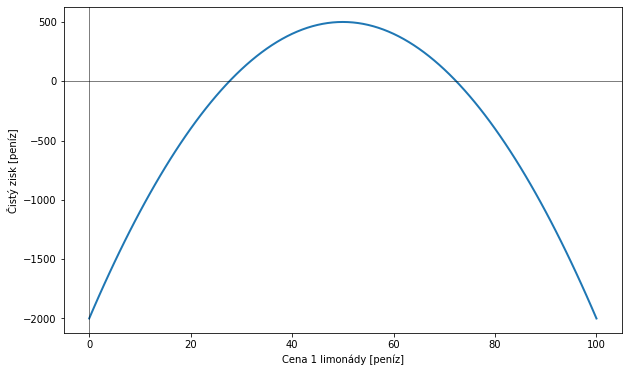

In [18]:
# čistý zisk vykreslime
fig = plt.figure(figsize=(10,6))
plt.plot(cena, zisk, lw=2, label='Zisk')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Cena 1 limonády [peníz]')
plt.ylabel('Čistý zisk [peníz]')
plt.show()

---
* Dává to smysl. Nulová cena znamená, že všechny limonády rozdáme zadarmo a zahučíme investici 1000 a dalších 100 x 10 za výrobní náklady. Celkem tedy 2000.
* Maximální cena 100 znamená to samé, jen s výhodou, že nám všechny limonády zbydou a můžeme je aspoň vypít.
---

### Z osové symetrie paraboly je již vidět, že maximum musí nastat při ceně přesně v půli mezi 0 a 100, tedy 50.

In [35]:
# Kolik ale prodame limonad pri cene 50?
# Zbylý zlomek limonád je 1-popt
1-(1-50/100)

0.5

## To je celkem překvapivé, protože vyděláme nejvíc, pokud nám polovina limonád zbyde.

---

#### Spočtěme si to ale přesně

* Můžeme postupovat stejně jako u příkladu s pizzou a vytvořit si funkci a využít fsolve()
* Funkce ale tentokrát musí pojmout mnoho vstupů, protože zisk je závislý na:
    (cena, investice, naklad_za_kus, pocet_kusu)
    
Zkuste si to sami, ukážem si alternativní postup, který prostě bude hledat maximum našeho pole hodnot zisku 

In [29]:
# Což je stejné jako hledat očima pokud si vypíšeme pole zisk
zisk

array([-2000., -1901., -1804., -1709., -1616., -1525., -1436., -1349.,
       -1264., -1181., -1100., -1021.,  -944.,  -869.,  -796.,  -725.,
        -656.,  -589.,  -524.,  -461.,  -400.,  -341.,  -284.,  -229.,
        -176.,  -125.,   -76.,   -29.,    16.,    59.,   100.,   139.,
         176.,   211.,   244.,   275.,   304.,   331.,   356.,   379.,
         400.,   419.,   436.,   451.,   464.,   475.,   484.,   491.,
         496.,   499.,   500.,   499.,   496.,   491.,   484.,   475.,
         464.,   451.,   436.,   419.,   400.,   379.,   356.,   331.,
         304.,   275.,   244.,   211.,   176.,   139.,   100.,    59.,
          16.,   -29.,   -76.,  -125.,  -176.,  -229.,  -284.,  -341.,
        -400.,  -461.,  -524.,  -589.,  -656.,  -725.,  -796.,  -869.,
        -944., -1021., -1100., -1181., -1264., -1349., -1436., -1525.,
       -1616., -1709., -1804., -1901., -2000.])

In [21]:
# K tomu použijte funkci max()
max(zisk)

500.0

In [23]:
# Abychom získali cenu, tj hodnotu x, která náleží zisku 500, použijte funkci np.argmax()
np.argmax(zisk)

50

!!! POZOR!!!
---
Toto je ošemetný výsledek, protože se zdá být dobře. ALE
* argmax nám vrací pozici (index), na kterém se nachází hodnota max zisku 500

In [30]:
# Takže musíme teď najít hodnotu pole *cena*, na indexu 50
cena[50]

50.0

In [31]:
# Najednou se obě operace dají spojit
cena[np.argmax(zisk)]

50.0

## Stejné, ale jen proto, že jsme si v prvním řádku vytvořili pole o 101 bodech rovnoměrně rozdělených mezi 0 a 100
* tedy na pozici 50, je cena 50, a to je náhoda.
* Při jakémkoli jiné definici *cena* by np.argmax() dal špatnou hodnotu

In [26]:
# pro zajimavost
type(np.argmax(cena))  # toto je 'int', tedy přirozené číslo

numpy.int64

In [27]:
type(cena[50])  # toto je 'float00, tedy reálné číslo

numpy.float64

!!! POZOR 2!!!
---
* fsolve je lepší metodou, protože je řešení přesnějsí
* použitím max() jsme hledali maximum našeho pole, které jsme spočítali jen pro naše na začátku vybrané ceny
* tedy max() závisí na četnosti našich hodnot v *cena*, tzv. samplingu.

---
---
* Zdálo by se, že každý podnikatel musí prahnout po znalosti této křivky, protože mu to vydělá spoustu peněz
* V praxi je to ale záležitost spíše vědců, protože poptávka se těžko měří

### Vezměme si ale příklad, kdy pan [Lusk and Schroeder ji dokázali změřit pro americke steaky v roce 2004](https://onlinelibrary.wiley.com/doi/full/10.1111/j.0092-5853.2004.00592.x)

Moje digitalizace jejich grafu vypadá přibližně takto

In [53]:
# publikace má jen pár bodů
data_x = np.array([1/7*100, 2/7*100, 3/7*100, 4/7*100, 5/7*100, 6/7*100, 100])
data_y = np.array([0.9, 0.68, 0.4, 0.17, 0.08, 0.04, 0])

# proto pro vás provedu jejich interpolaci, https://numpy.org/doc/stable/reference/generated/numpy.interp.html
# to je pokročilým tématem na jindy
from scipy import interpolate

cena_new = np.linspace(1/7*100, 100, 201)
# Ve zkratce, snažíme se získat body naší nové poptávky i v bodech které přímo nemáme zadány
f = interpolate.interp1d(data_x, data_y, kind='cubic')
popt_new = f(cena_new)

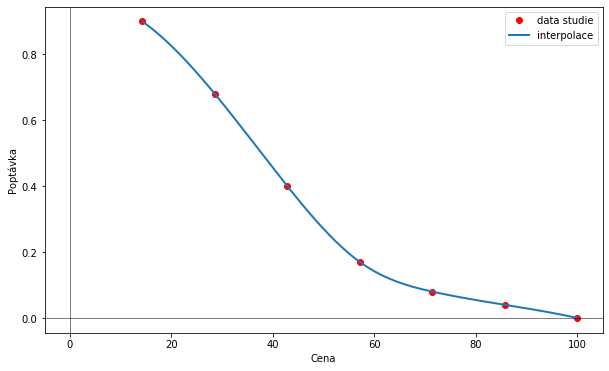

In [54]:
# vykreslete graf bodů ze studie (data_x, data_y) a
# a data interpolovaná, (cena_new, popt_new)
fig = plt.figure(figsize=(10,6))
plt.plot(data_x, data_y, 'ro', label='data studie')
plt.plot(cena_new, popt_new, '-', lw=2, label='interpolace')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Cena')
plt.ylabel('Poptávka')
plt.legend()
plt.show()

### To zjevě funguje, a také dává smysl:
* Při nízké ceně se poptávka zplošťuje, každý, kdo má chuť na steak si ho při tak malé ceně dá
* A jistě jsou všude lidé, kteří na cenu steaku ani nemusí hledět a koupí si ho skoro bez ohledu na cenu, to je ten pozvolný pokles k nule poptávky.

---

## Vyděláme při této poptávce teď více či méně než původně?
* Postup zůstane stejný, jen musíme vše počítat se stejnou osou x, tou novou *cena_new*
* Technicky v poptávce nevystupuje cena jako taková, takže se již nejedná o kvadratickou rovnici.
* Tím, že naše nová poptávka není žádnou známou funkcí, na papíře bychom ji těžko řešili
* S Pythonem to uděláme úplně stejně jako předtím

In [59]:
# popt_new po 100 limonádách
popt_new_100 = popt_new*100

In [60]:
# zisk stejně jako původně
prijem_new = cena_new*popt_new_100

In [61]:
# výdaje se nemění

In [62]:
# zisk
zisk_new = prijem_new - vydaje

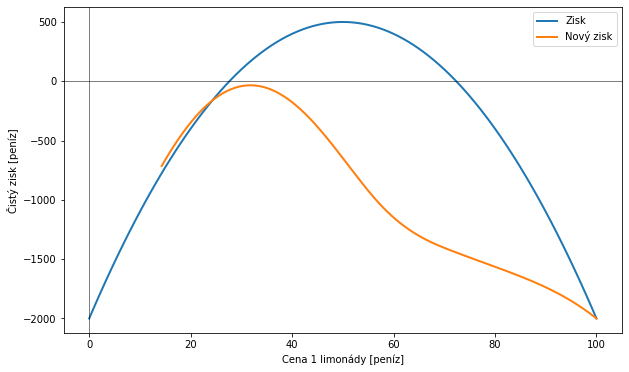

In [63]:
# Teď si můžeš původní a nový zisk vykreslit pro porovnání
fig = plt.figure(figsize=(10,6))
plt.plot(cena, zisk, lw=2, label='Zisk')
plt.plot(cena_new, zisk_new, lw=2, label='Nový zisk')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Cena 1 limonády [peníz]')
plt.ylabel('Čistý zisk [peníz]')
plt.legend()
plt.show()

## Skutečný svět není peříčko, jako se zdá při hodině matematiky

---

# Dobrá práce!!!